In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import gdown
import zipfile
import os

In [ ]:
# Скачивание и загрузка файла
def download_and_load_data():
    # URL для прямого скачивания
    url = 'https://drive.google.com/file/d/12BSLr9aDMW9IRi2YNHiOTff1a_IJ6NtF/view?usp=drive_link'

    # Скачиваем файл
    output = 'hackathon_data_main.csv'
    gdown.download(url, output, quiet=False)

    # Загружаем данные в DataFrame
    df = pd.read_csv(output, delimiter=';', decimal=',')

    return df

In [ ]:
# Функция для диагностики проблемы
def analyze_file_structure(filename):
    print("Анализ структуры файла...")

    # Читаем первые строки для анализа
    with open(filename, 'r', encoding='utf-8') as f:
        lines = []
        for i, line in enumerate(f):
            if i < 5:  # Первые 5 строк
                lines.append(line)
                print(f"Строка {i+1}: {len(line.split(';'))} полей")
                print(f"Содержание: {line[:200]}...")  # Первые 200 символов
            else:
                break

    return lines

In [ ]:
# Загрузка с обработкой ошибок
def load_data_with_error_handling(filename):
    # Сначала попробуем прочитать с разными параметрами
    try:
        # Способ 1: Пропускать плохие строки
        print("Способ 1: Загрузка с пропуском ошибок...")
        df = pd.read_csv(filename, delimiter=';', decimal=',',
                        error_bad_lines=False, warn_bad_lines=True,
                        encoding='utf-8')
        return df
    except Exception as e:
        print(f"Способ 1 не сработал: {e}")

    try:
        # Способ 2: Указать точное количество столбцов
        print("Способ 2: Загрузка с указанием количества столбцов...")
        # Сначала определим правильное количество столбцов
        with open(filename, 'r', encoding='utf-8') as f:
            first_line = f.readline()
            n_columns = len(first_line.split(';'))
            print(f"Количество столбцов в заголовке: {n_columns}")

        # Создаем список имен столбцов
        col_names = [f'col_{i}' for i in range(n_columns)]

        df = pd.read_csv(filename, delimiter=';', decimal=',',
                        names=col_names, header=0,
                        encoding='utf-8')
        return df
    except Exception as e:
        print(f"Способ 2 не сработал: {e}")

    try:
        # Способ 3: Ручной парсинг проблемных строк
        print("Способ 3: Ручная обработка проблемных строк...")
        good_lines = []
        with open(filename, 'r', encoding='utf-8') as f:
            header = f.readline()
            expected_columns = len(header.split(';'))
            print(f"Ожидаемое количество столбцов: {expected_columns}")

            good_lines.append(header)

            for i, line in enumerate(f, 2):
                columns = line.split(';')
                if len(columns) == expected_columns:
                    good_lines.append(line)
                else:
                    print(f"Пропущена строка {i}: найдено {len(columns)} столбцов вместо {expected_columns}")
                    # Можно попробовать исправить строку
                    if len(columns) > expected_columns:
                        # Объединяем лишние столбцы
                        corrected_line = ';'.join(columns[:expected_columns-1] + [';'.join(columns[expected_columns-1:])])
                        good_lines.append(corrected_line)
                        print(f"Строка {i} исправлена")

        # Сохраняем исправленный файл
        corrected_filename = 'corrected_data.csv'
        with open(corrected_filename, 'w', encoding='utf-8') as f:
            f.writelines(good_lines)

        df = pd.read_csv(corrected_filename, delimiter=';', decimal=',', encoding='utf-8')
        return df
    except Exception as e:
        print(f"Способ 3 не сработал: {e}")
        return None

In [ ]:
def time_to_minutes(time_str):
    """Преобразует время в минуты с начала дня"""
    try:
        if pd.isna(time_str) or time_str == '':
            return np.nan
        parts = str(time_str).split(':')
        if len(parts) == 2:
            hours = int(parts[0])
            minutes = int(parts[1])
            return hours * 60 + minutes
        return np.nan
    except:
        return np.nan

In [ ]:
df = df = pd.read_csv("hackathon_data_main.csv", delimiter=';', decimal=',')
# Дополнительная информация о данных
if 'df' in locals():
    print("\n" + "="*50)
    print("ОБЗОР ДАННЫХ")
    print("="*50)
    print(f"Размер dataset: {df.shape}")
    print(f"Количество строк: {df.shape[0]}")
    print(f"Количество столбцов: {df.shape[1]}")
    print("\nНазвания столбцов:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")

    print("\nПропущенные значения:")
    print(df.isnull().sum())


ОБЗОР ДАННЫХ
Размер dataset: (19269, 13)
Количество строк: 19269
Количество столбцов: 13

Названия столбцов:
1. Дата вылета
2. Номер рейса
3. Аэропорт вылета
4. Аэропорт прилета
5. Время вылета
6. Время прилета
7. Емкость кабины
8. LF Кабина
9. Бронирования по кабинам
10. Тип ВС
11. Код кабины
12. Доход пасс
13. Пассажиры

Пропущенные значения:
Дата вылета                0
Номер рейса                0
Аэропорт вылета            0
Аэропорт прилета           0
Время вылета               0
Время прилета              0
Емкость кабины             0
LF Кабина                  0
Бронирования по кабинам    0
Тип ВС                     0
Код кабины                 0
Доход пасс                 0
Пассажиры                  0
dtype: int64


In [ ]:
try:

    # Проверяем первые строки данных
    print("Первые 5 строк данных:")
    print(df.head())
    print("\nИнформация о данных:")
    print(df.info())

   #Преобразуем время в числовой формат
    print("\nПреобразование времени в числовой формат...")

    # Применяем функцию к столбцам времени
    df['Время вылета (минуты)'] = df['Время вылета'].apply(time_to_minutes)
    df['Время прилета (минуты)'] = df['Время прилета'].apply(time_to_minutes)

    # Также можно создать столбцы с часами и минутами отдельно
    df['Время вылета (часы)'] = df['Время вылета'].str.split(':').str[0].astype(float)
    df['Время вылета (минуты)'] = df['Время вылета'].str.split(':').str[1].astype(float)
    df['Время прилета (часы)'] = df['Время прилета'].str.split(':').str[0].astype(float)
    df['Время прилета (минуты)'] = df['Время прилета'].str.split(':').str[1].astype(float)

    # Проверяем результат
    print("\nПервые 5 строк после преобразования:")
    print(df[['Время вылета', 'Время вылета (минуты)',
              'Время прилета', 'Время прилета (минуты)']].head())

    # Проверяем статистику по преобразованным данным
    print("\nСтатистика по времени вылета (в минутах):")
    print(df['Время вылета (минуты)'].describe())

    print("\nСтатистика по времени прилета (в минутах):")
    print(df['Время прилета (минуты)'].describe())

    # Сохраняем обработанные данные (опционально)
    df.to_csv('processed_hackathon_data.csv', index=False, sep=';')
    print("\nОбработанные данные сохранены в 'processed_hackathon_data.csv'")

except Exception as e:
    print(f"Произошла ошибка: {e}")

    # Альтернативный способ загрузки, если первый не сработает
    print("\nПопытка альтернативного способа загрузки...")

    # Монтируем Google Drive (если файл уже загружен туда)
    drive.mount('/content/drive')

    # Пытаемся найти файл в Google Drive
    try:
        df = pd.read_csv('/content/sample_data/hackathon_data_main.csv',
                        delimiter=';', decimal=',')
        print("Файл успешно загружен из Google Drive")

        # Применяем преобразование времени
        df['Время вылета (минуты)'] = df['Время вылета'].apply(time_to_minutes)
        df['Время прилета (минуты)'] = df['Время прилета'].apply(time_to_minutes)

    except Exception as e2:
        print(f"Альтернативный способ также не сработал: {e2}")
        print("Пожалуйста, убедитесь, что файл доступен по указанной ссылке")



Первые 5 строк данных:
  Дата вылета  Номер рейса Аэропорт вылета Аэропорт прилета Время вылета  \
0  2025-04-18          224             SVO              SYX        10:35   
1  2025-04-18          224             SVO              SYX        10:35   
2  2025-04-18          224             SVO              SYX        10:35   
3  2025-04-18          225             SYX              SVO        04:50   
4  2025-04-18          225             SYX              SVO        04:50   

  Время прилета  Емкость кабины  LF Кабина  Бронирования по кабинам Тип ВС  \
0         01:15              28     0.6786                       19    359   
1         01:15              24     0.2500                        6    359   
2         01:15             264     0.4129                      109    359   
3         10:10              28     0.5357                       15    359   
4         10:10              24     0.2917                        7    359   

  Код кабины  Доход пасс  Пассажиры  
0          C 

In [ ]:
df.head()

,Дата вылета,Номер рейса,Аэропорт вылета,Аэропорт прилета,Время вылета,Время прилета,Емкость кабины,LF Кабина,Бронирования по кабинам,Тип ВС,Код кабины,Доход пасс,Пассажиры,Время вылета (минуты),Время прилета (минуты),Время вылета (часы),Время прилета (часы)
0,2025-04-18,224,SVO,SYX,10:35,01:15,28,0.6786,19,359,C,10048.02,19,35.0,15.0,10.0,1.0
1,2025-04-18,224,SVO,SYX,10:35,01:15,24,0.2500,6,359,W,2013.02,6,35.0,15.0,10.0,1.0
2,2025-04-18,224,SVO,SYX,10:35,01:15,264,0.4129,109,359,Y,29917.88,109,35.0,15.0,10.0,1.0
3,2025-04-18,225,SYX,SVO,04:50,10:10,28,0.5357,15,359,C,6306.29,15,50.0,10.0,4.0,10.0
4,2025-04-18,225,SYX,SVO,04:50,10:10,24,0.2917,7,359,W,3834.73,7,50.0,10.0,4.0,10.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")
# Проверим названия столбцов
print("\nНазвания столбцов:")
print(df.columns.tolist())

income_col = 'Доход пасс'
cabin_col = 'Код кабины'
date_col = 'Дата вылета'

# Преобразуем дату в datetime
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Создаем отдельные колонки для месяца и года
df['Год'] = df[date_col].dt.year
df['Месяц'] = df[date_col].dt.month
df['Месяц_год'] = df[date_col].dt.strftime('%Y-%m')
df['Год_месяц'] = df[date_col].dt.to_period('M')

# Проверим уникальные коды кабин
print(f"\nУникальные коды кабин: {df[cabin_col].unique()}")
print(f"Количество уникальных кодов кабин: {df[cabin_col].nunique()}")


Названия столбцов:
['Дата вылета', 'Номер рейса', 'Аэропорт вылета', 'Аэропорт прилета', 'Время вылета', 'Время прилета', 'Емкость кабины', 'LF Кабина', 'Бронирования по кабинам', 'Тип ВС', 'Код кабины', 'Доход пасс', 'Пассажиры', 'Время вылета (минуты)', 'Время прилета (минуты)', 'Время вылета (часы)', 'Время прилета (часы)']

Уникальные коды кабин: ['C' 'W' 'Y']
Количество уникальных кодов кабин: 3


In [ ]:
# Анализ по всему времени
print("\n" + "="*50)
print("АНАЛИЗ ДОХОДА ПО КОДУ КАБИНЫ ЗА ВСЕ ВРЕМЯ")
print("="*50)

monthly_stats = df.groupby(['Месяц', cabin_col])[income_col].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('min', 'min'),
    ('max', 'max'),
    ('std', 'std')
]).round(2).reset_index()

print("\nСтатистика дохода по месяцам (все годы объединены):")
print(monthly_stats.head(10))


АНАЛИЗ ДОХОДА ПО КОДУ КАБИНЫ ЗА ВСЕ ВРЕМЯ

Статистика дохода по месяцам (все годы объединены):
   Месяц Код кабины  count      mean   median     mode      min        max  \
0      1          C    819   9360.03  2591.54     0.00     0.00  141703.69   
1      1          W    266  11397.18  6416.54     0.00     0.00   62093.65   
2      1          Y    881  20906.33  9891.52  1400.39  1400.39  158368.14   
3      2          C    758   7100.42  2334.93     0.00     0.00   71740.30   
4      2          W    198   8217.23  5472.78    98.85    98.85   42422.52   
5      2          Y    793  17482.53  8826.87  1575.87  1575.87  124334.86   
6      3          C    849   7391.61  3039.83    54.05     0.00   75317.72   
7      3          W    259   8687.54  7323.76     0.00     0.00   31675.32   
8      3          Y    900  19189.32  9727.17  1782.43  1782.43  148648.92   
9      4          C    742   6686.36  2367.71    54.05    27.03   72578.53   

        std  
0  17202.84  
1  13351.14  
2  

In [ ]:
# АНАЛИЗ ПО ГОДАМ
print("\n" + "="*50)
print("АНАЛИЗ ДОХОДА ПО КОДУ КАБИНЫ ПО ГОДАМ")
print("="*50)

yearly_stats = df.groupby(['Год', cabin_col])[income_col].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('min', 'min'),
    ('max', 'max'),
    ('std', 'std')
]).round(2).reset_index()

print("\nСтатистика дохода по годам:")
print(yearly_stats)


АНАЛИЗ ДОХОДА ПО КОДУ КАБИНЫ ПО ГОДАМ

Статистика дохода по годам:
    Год Код кабины  count      mean    median     mode      min        max  \
0  2024          C   4114   5830.12   2434.31    27.03     0.00   90458.82   
1  2024          W   1347   6207.51   3460.87    40.54     0.00   51693.45   
2  2024          Y   4324  18332.61  12327.96  4837.95     0.00  186354.87   
3  2025          C   3981   7473.42   2578.01     0.00     0.00  187619.80   
4  2025          W   1217   8932.08   4852.23     0.00     0.00   62093.65   
5  2025          Y   4286  18976.30  10357.44  5286.04  1400.39  179778.42   

        std  
0   8774.69  
1   7351.81  
2  18051.94  
3  12704.80  
4  10098.54  
5  21949.61  


In [ ]:
# АНАЛИЗ ПО МЕСЯЦАМ И ГОДАМ (ДЕТАЛЬНЫЙ)
print("\n" + "="*50)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ДОХОДА ПО МЕСЯЦАМ И ГОДАМ")
print("="*50)

detailed_monthly_stats = df.groupby(['Год', 'Месяц', cabin_col])[income_col].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
]).round(2).reset_index()

print("\nДетальная статистика по месяцам и годам:")
print(detailed_monthly_stats)


ДЕТАЛЬНЫЙ АНАЛИЗ ДОХОДА ПО МЕСЯЦАМ И ГОДАМ

Детальная статистика по месяцам и годам:
     Год  Месяц Код кабины  count      mean    median     mode
0   2024      8          C    833   5199.31   2288.99    27.03
1   2024      8          W    270   5119.25   2840.20    40.54
2   2024      8          Y    876  18803.77  12253.30  1728.08
3   2024      9          C    809   3984.97   2069.32    27.03
4   2024      9          W    296   3235.41   1697.02    40.54
5   2024      9          Y    865  16122.01  11828.67  1076.37
6   2024     10          C    783   6065.09   3213.18     0.00
7   2024     10          W    259   6238.99   5199.78     0.00
8   2024     10          Y    813  19984.29  15295.17  1947.59
9   2024     11          C    847   7572.82   2657.75    27.03
10  2024     11          W    273   9574.15   6619.55     0.00
11  2024     11          Y    880  20894.46  12056.31  5579.39
12  2024     12          C    842   6255.47   2170.10    54.05
13  2024     12          W    24


ВИЗУАЛИЗАЦИЯ: АНАЛИЗ ПО ВСЕМУ ВРЕМЕНИ


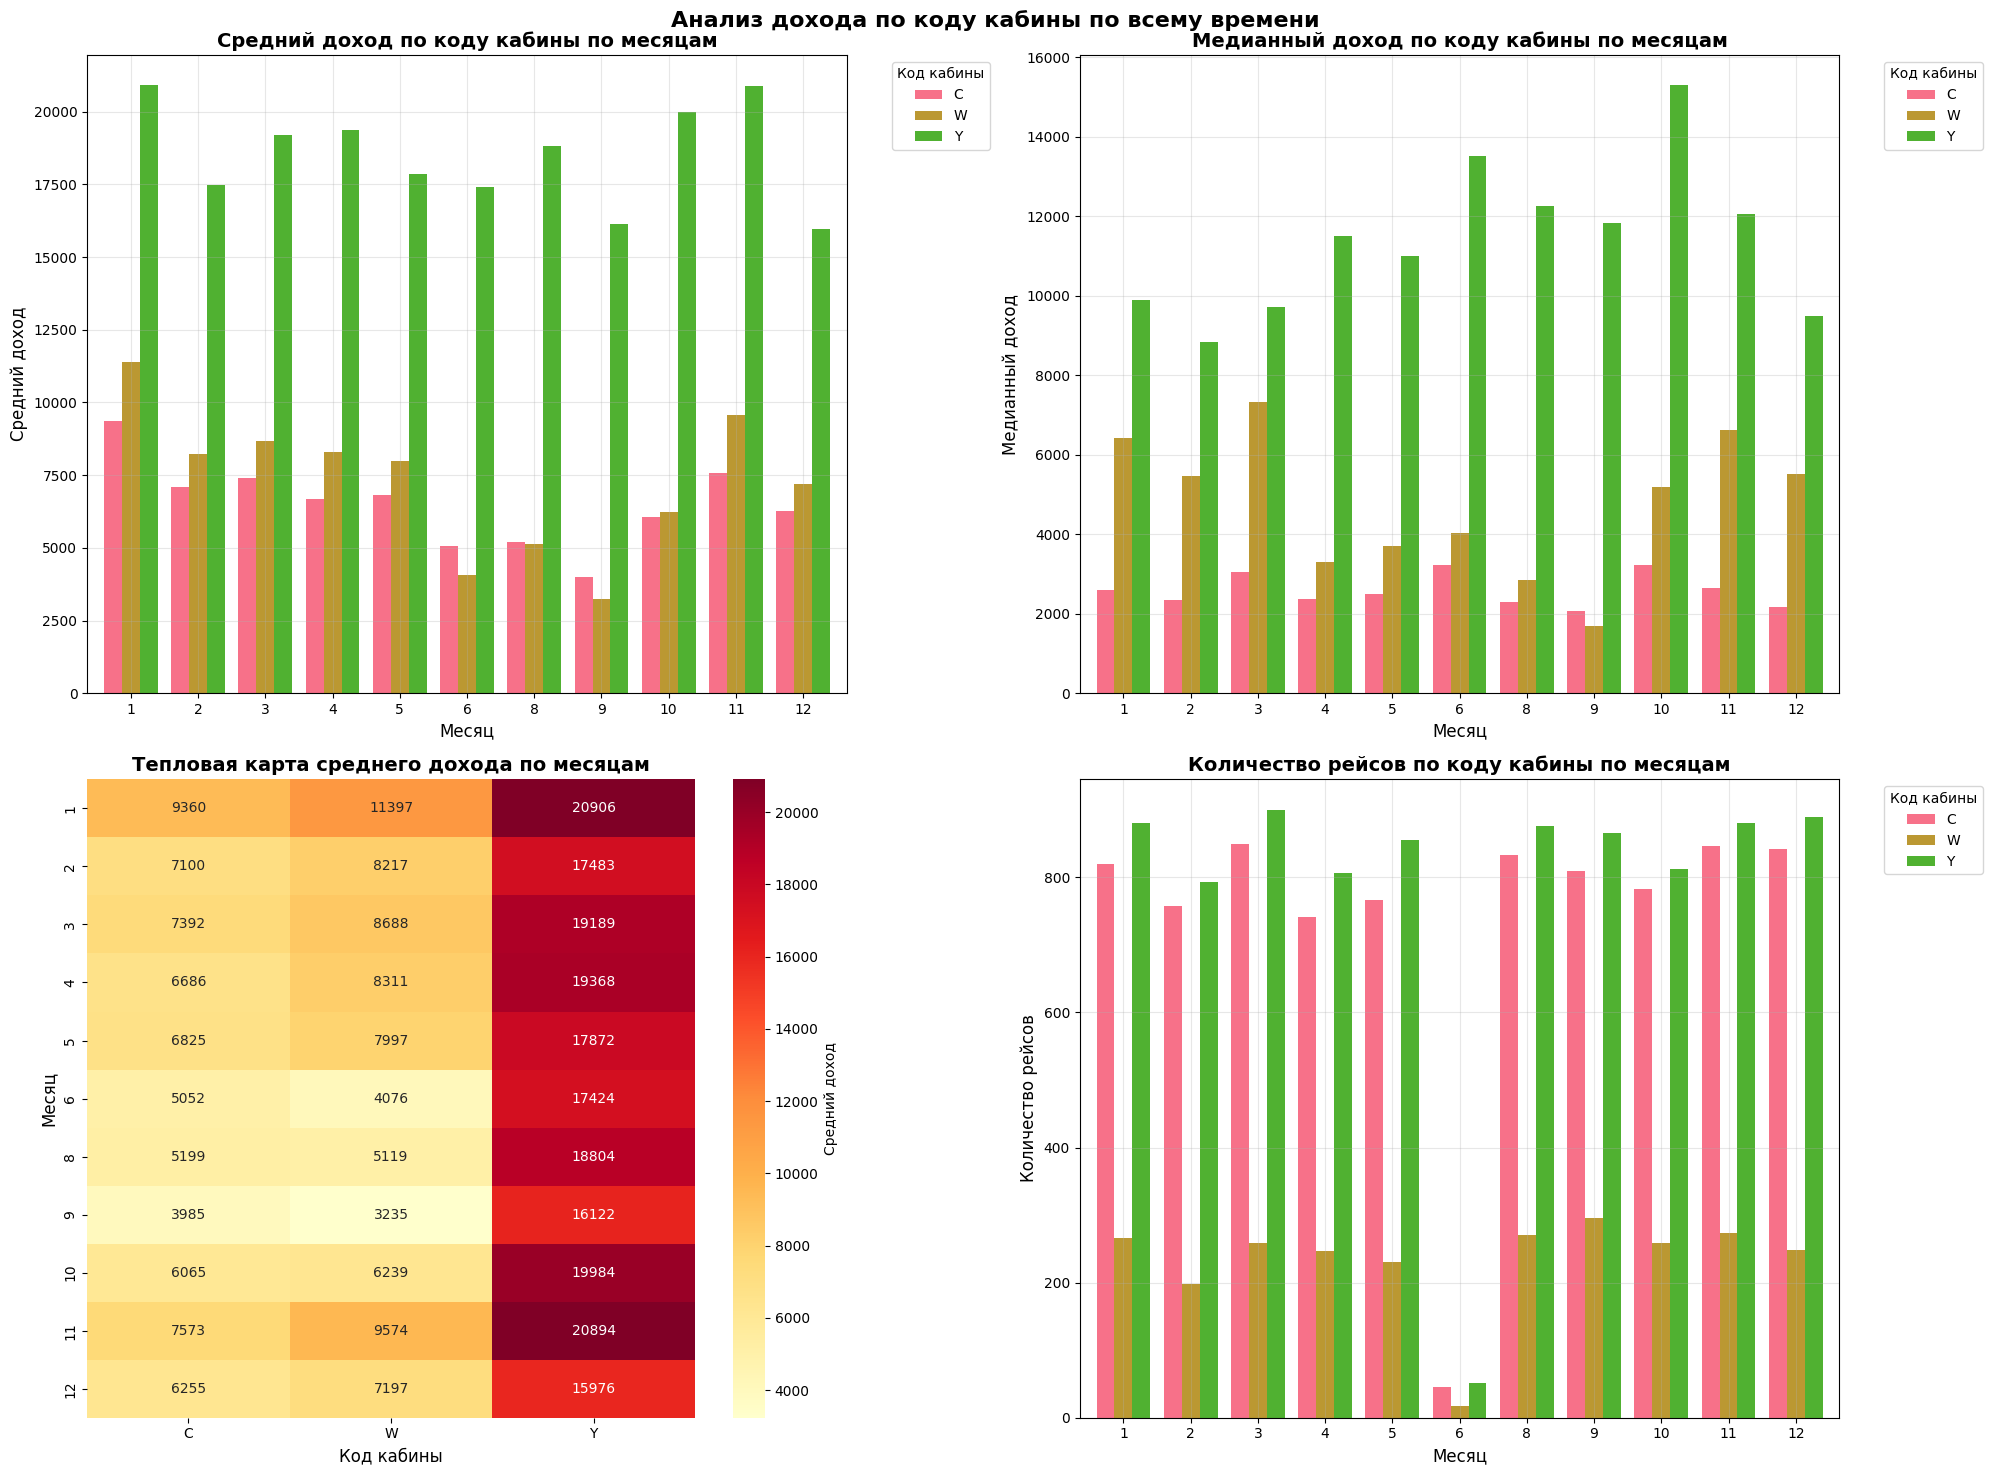

In [ ]:
# ВИЗУАЛИЗАЦИЯ ПО ВСЕМУ ВРЕМЕНИ
print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ: АНАЛИЗ ПО ВСЕМУ ВРЕМЕНИ")
print("="*50)

# Создаем фигуры для графиков по месяцам
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ дохода по коду кабины по всему времени',
             fontsize=16, fontweight='bold')

#1 Средний доход по месяцам для каждого кода кабины
plt.subplot(2, 2, 1)
monthly_pivot = df.pivot_table(
    values=income_col,
    index='Месяц',
    columns=cabin_col,
    aggfunc='mean'
).sort_index()

monthly_pivot.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Средний доход по коду кабины по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средний доход', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# 2 Медианный доход по месяцам
plt.subplot(2, 2, 2)
monthly_median_pivot = df.pivot_table(
    values=income_col,
    index='Месяц',
    columns=cabin_col,
    aggfunc='median'
).sort_index()

monthly_median_pivot.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Медианный доход по коду кабины по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Медианный доход', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# 3 Heatmap среднего дохода по месяцам
plt.subplot(2, 2, 3)
heatmap_monthly = df.pivot_table(
    values=income_col,
    index='Месяц',
    columns=cabin_col,
    aggfunc='mean'
).sort_index()

sns.heatmap(heatmap_monthly, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Средний доход'}, ax=plt.gca())
plt.title('Тепловая карта среднего дохода по месяцам',
          fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Месяц', fontsize=12)

# 4 Количество рейсов по месяцам
plt.subplot(2, 2, 4)
monthly_counts = df.groupby(['Месяц', cabin_col]).size().unstack(fill_value=0)
monthly_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Количество рейсов по коду кабины по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



ВИЗУАЛИЗАЦИЯ: АНАЛИЗ ПО ГОДАМ


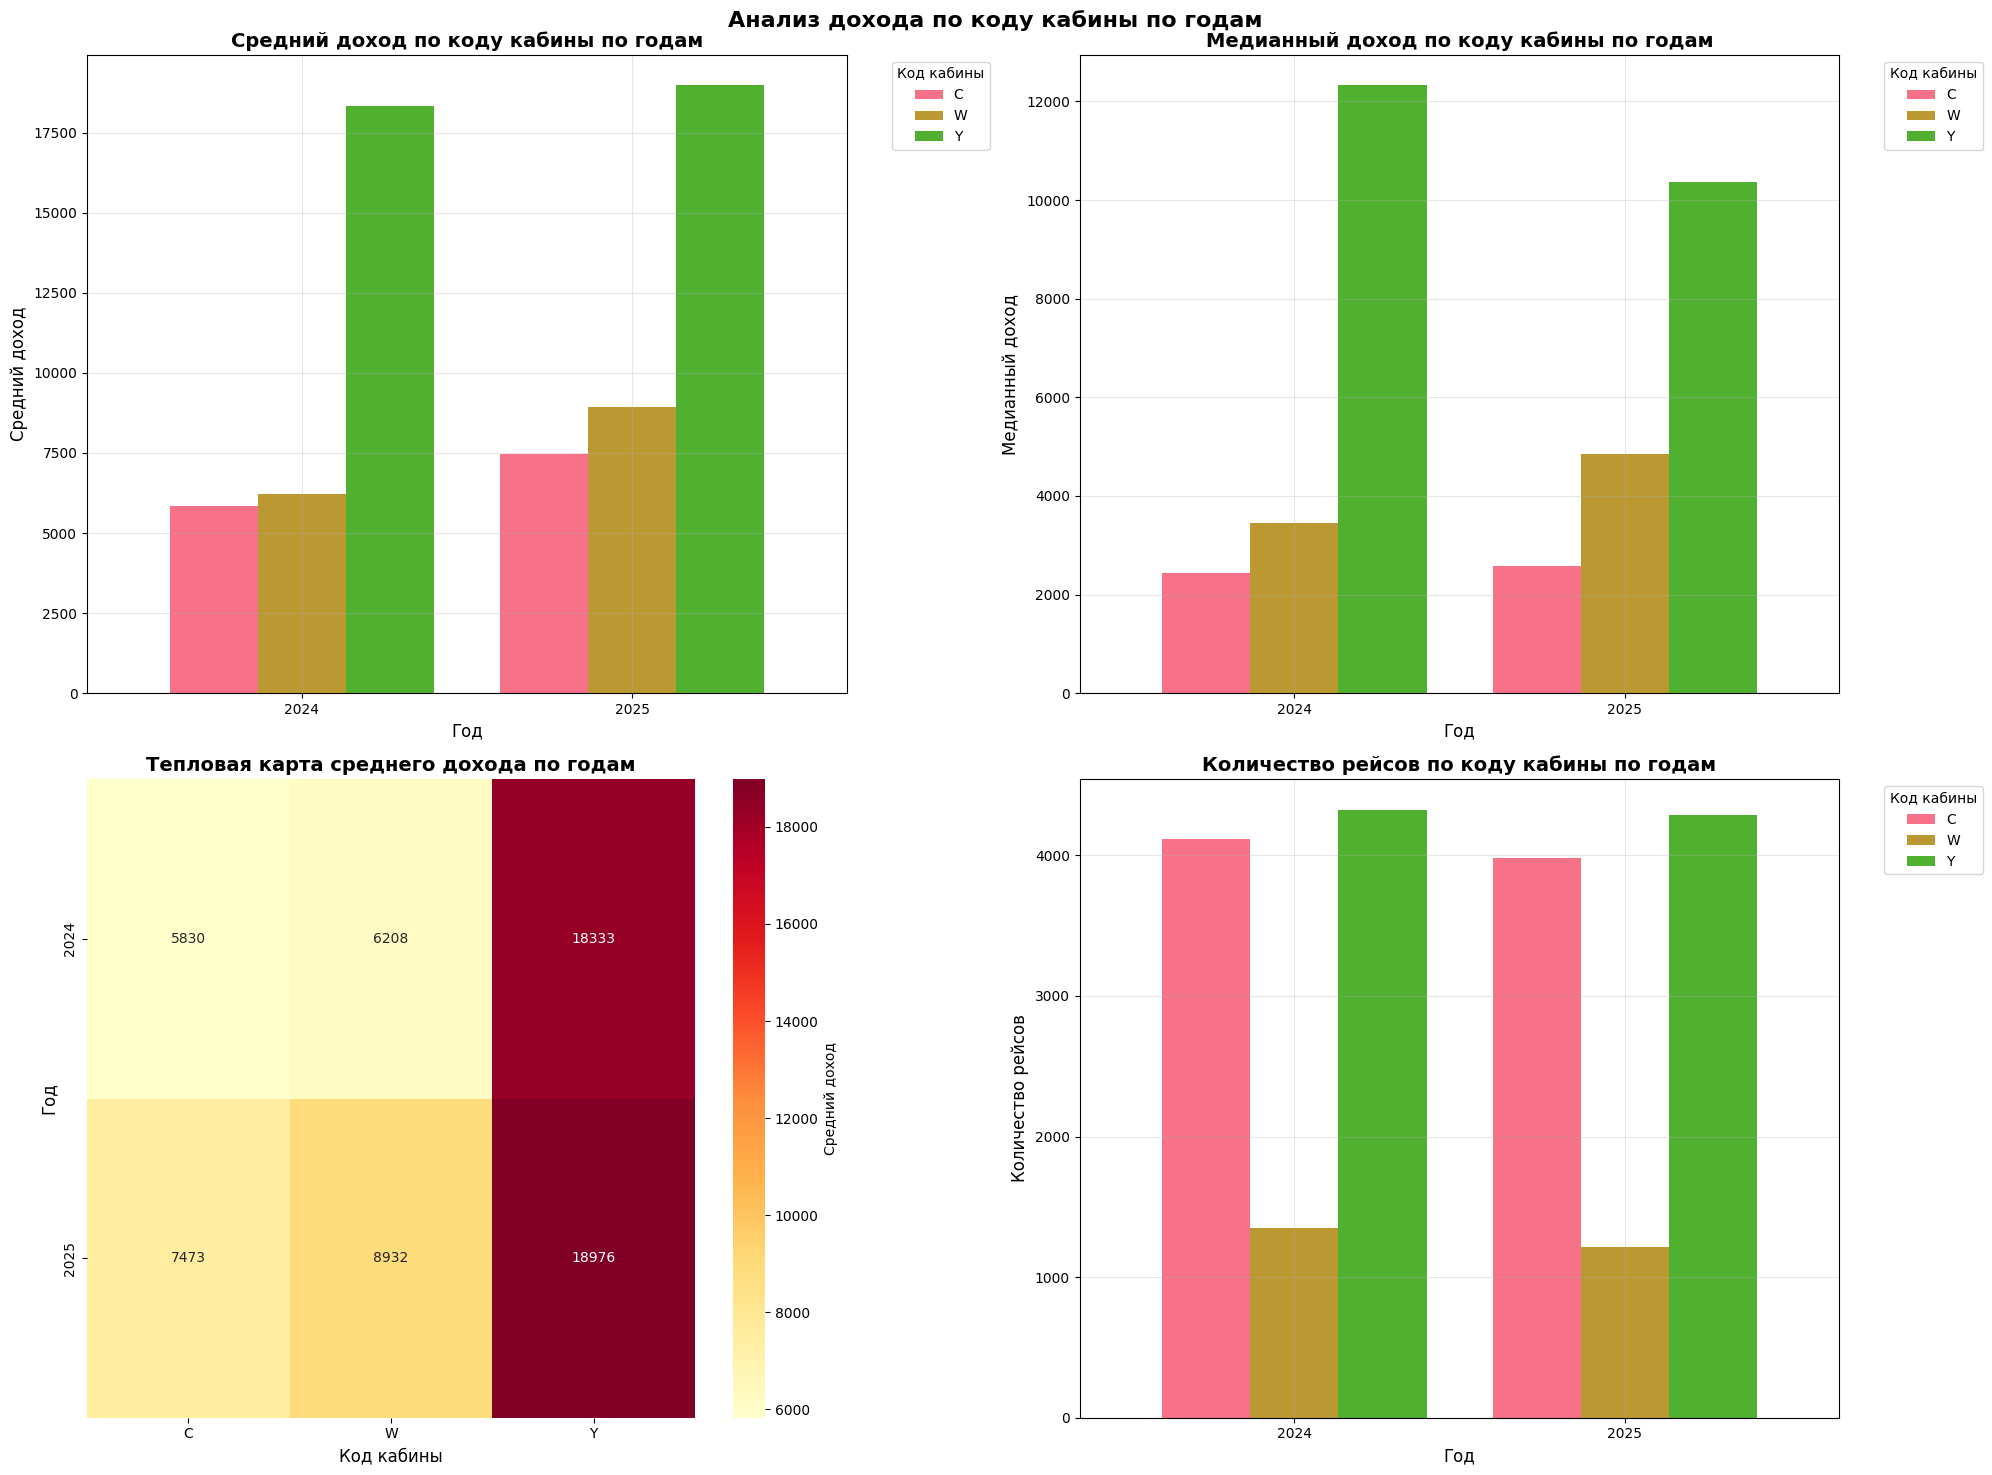

In [ ]:
# ВИЗУАЛИЗАЦИЯ ПО ГОДАМ
print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ: АНАЛИЗ ПО ГОДАМ")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ дохода по коду кабины по годам', fontsize=16, fontweight='bold')

# 1 Средний доход по годам
plt.subplot(2, 2, 1)
yearly_pivot = df.pivot_table(
    values=income_col,
    index='Год',
    columns=cabin_col,
    aggfunc='mean'
).sort_index()

yearly_pivot.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Средний доход по коду кабины по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средний доход', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# 2 Медианный доход по годам
plt.subplot(2, 2, 2)
yearly_median_pivot = df.pivot_table(
    values=income_col,
    index='Год',
    columns=cabin_col,
    aggfunc='median'
).sort_index()

yearly_median_pivot.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Медианный доход по коду кабины по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Медианный доход', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# 3 Heatmap по годам
plt.subplot(2, 2, 3)
heatmap_yearly = df.pivot_table(
    values=income_col,
    index='Год',
    columns=cabin_col,
    aggfunc='mean'
).sort_index()

sns.heatmap(heatmap_yearly, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Средний доход'}, ax=plt.gca())
plt.title('Тепловая карта среднего дохода по годам',
          fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Год', fontsize=12)

# 4 Количество рейсов по годам
plt.subplot(2, 2, 4)
yearly_counts = df.groupby(['Год', cabin_col]).size().unstack(fill_value=0)
yearly_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Количество рейсов по коду кабины по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ПО МЕСЯЦАМ И ГОДАМ


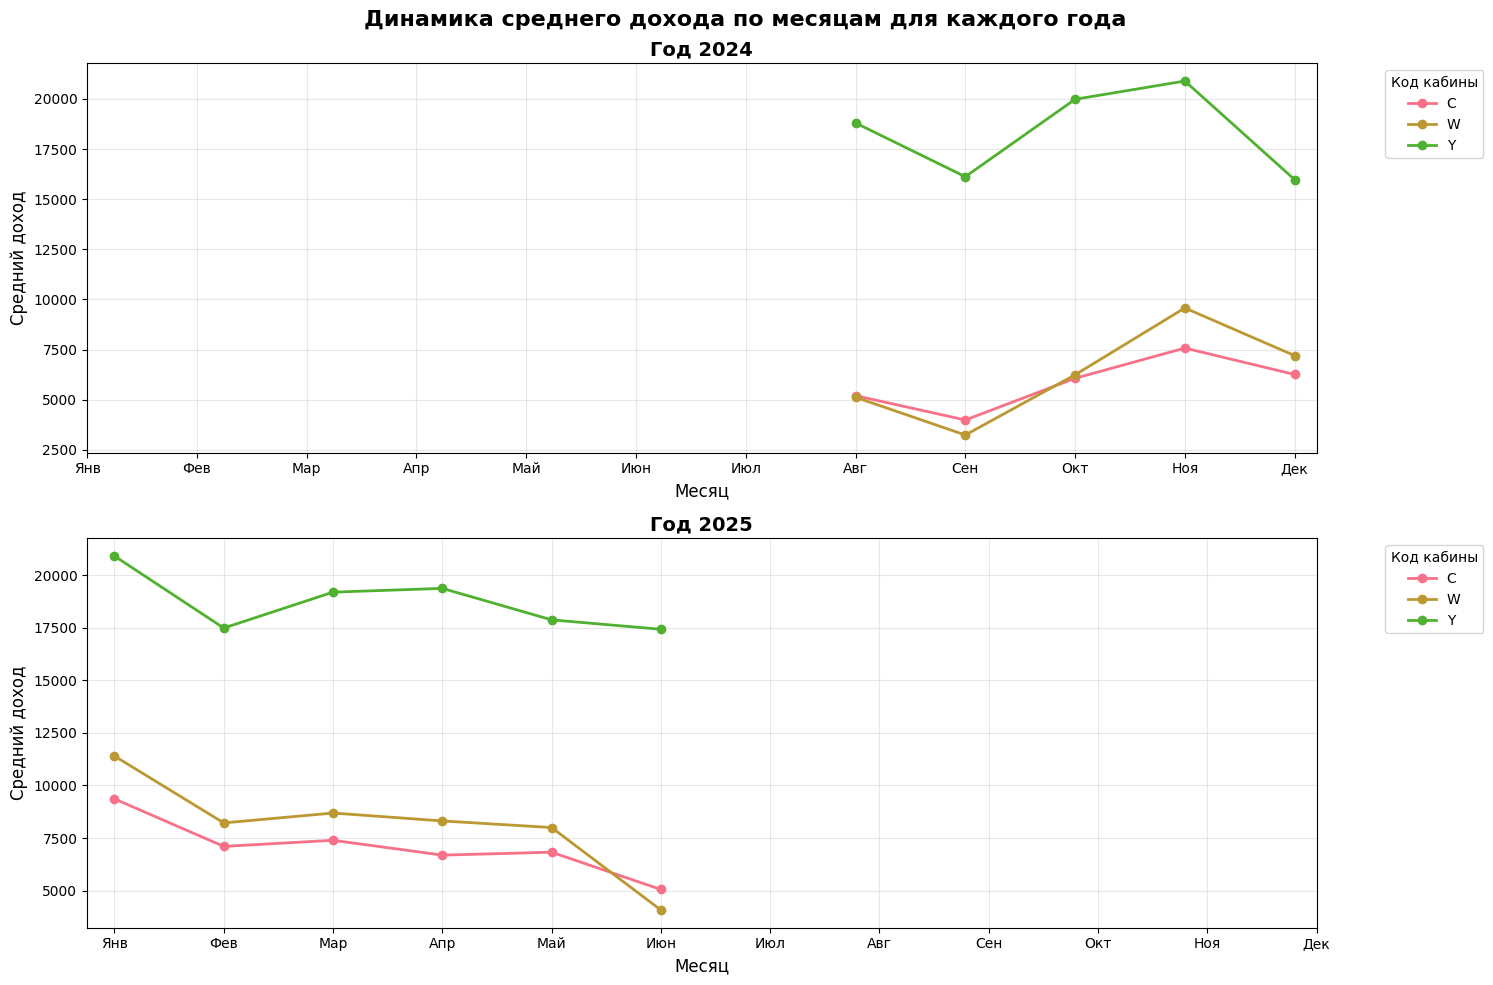

In [ ]:
# ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ПО МЕСЯЦАМ И ГОДАМ
print("\n" + "="*50)
print("ДЕТАЛЬНАЯ ВИЗУАЛИЗАЦИЯ ПО МЕСЯЦАМ И ГОДАМ")
print("="*50)

# Создаем отдельные графики для каждого года
years = sorted(df['Год'].unique())
cabin_codes = sorted(df[cabin_col].unique())

fig, axes = plt.subplots(len(years), 1, figsize=(15, 5*len(years)))
if len(years) == 1:
    axes = [axes]

fig.suptitle('Динамика среднего дохода по месяцам для каждого года',
             fontsize=16, fontweight='bold')

for i, year in enumerate(years):
    year_data = df[df['Год'] == year]

    # Создаем сводную таблицу для года
    year_pivot = year_data.pivot_table(
        values=income_col,
        index='Месяц',
        columns=cabin_col,
        aggfunc='mean'
    ).sort_index()

    # Заполняем недостающие месяцы
    all_months = range(1, 13)
    year_pivot = year_pivot.reindex(all_months)

    # Строим график
    year_pivot.plot(kind='line', marker='o', ax=axes[i], linewidth=2, markersize=6)
    axes[i].set_title(f'Год {year}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Месяц', fontsize=12)
    axes[i].set_ylabel('Средний доход', fontsize=12)
    axes[i].legend(title='Код кабины', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                           'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])

plt.tight_layout()
plt.show()


Создание гистограмм по месяцам и годам...
Найдено уникальных периодов: 11
Периоды: ['2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06']


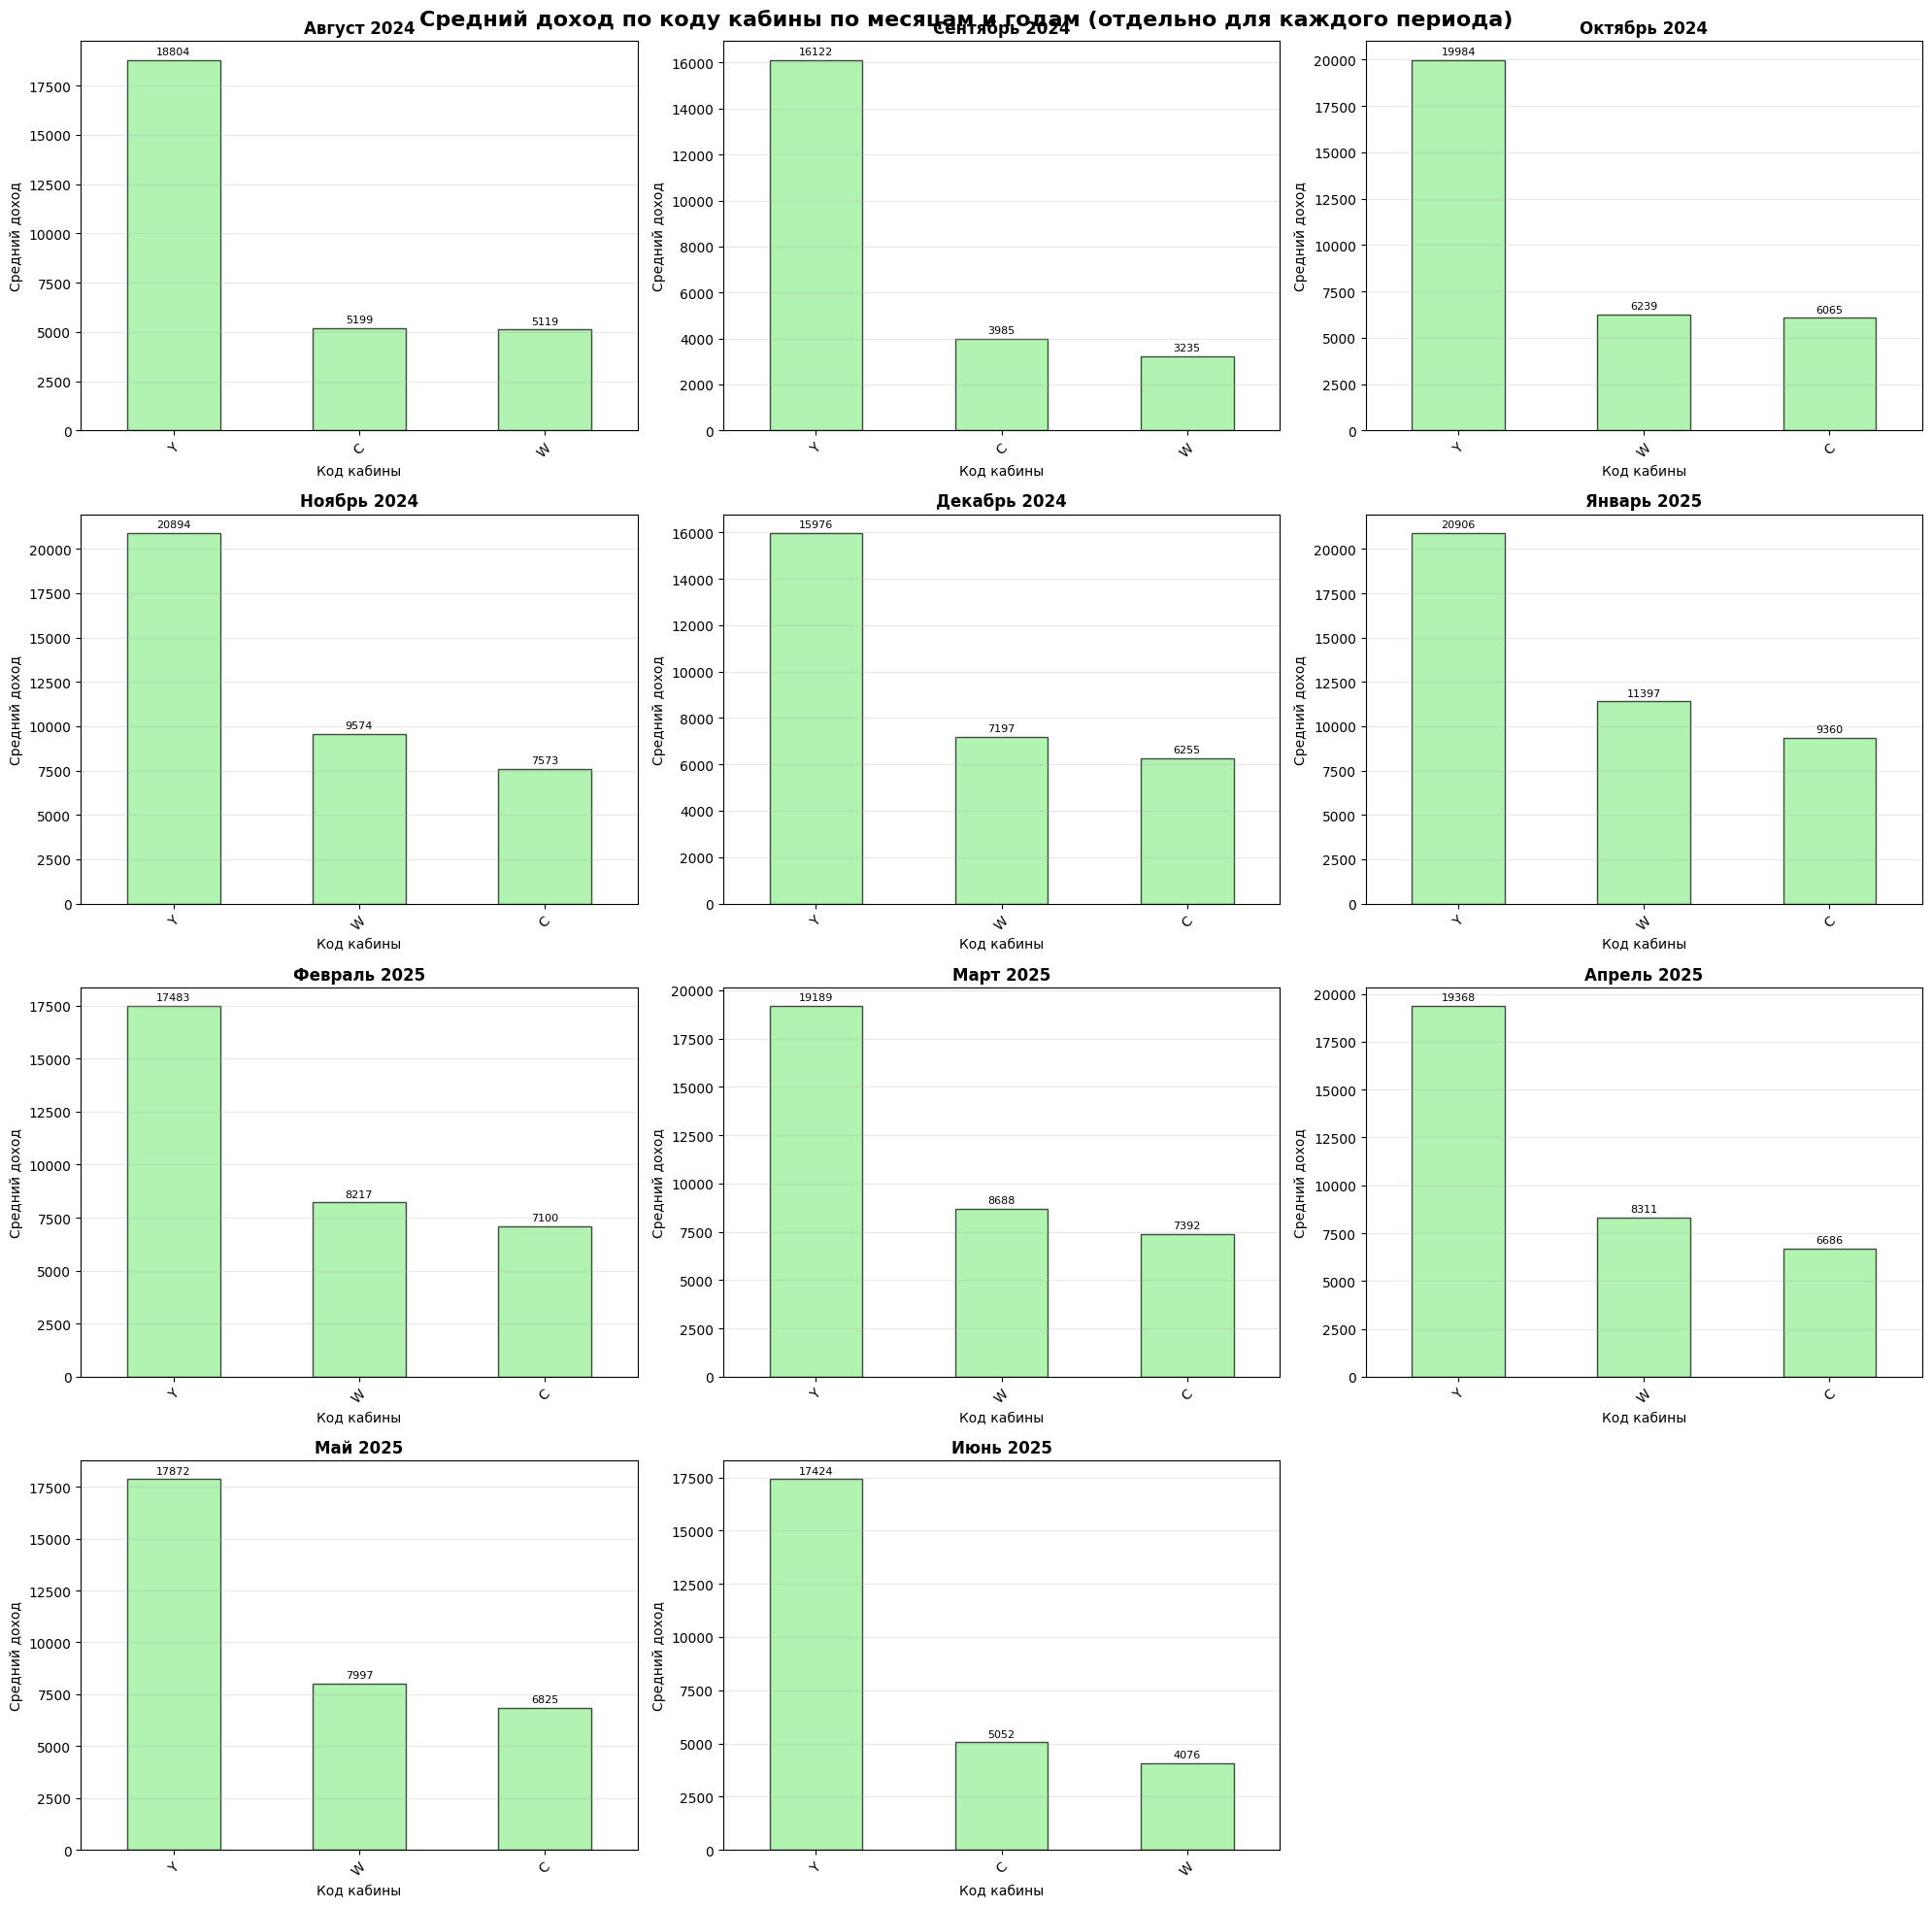


АЛЬТЕРНАТИВНАЯ ВИЗУАЛИЗАЦИЯ: ГРАФИКИ ПО ГОДАМ С РАЗБИВКОЙ ПО МЕСЯЦАМ


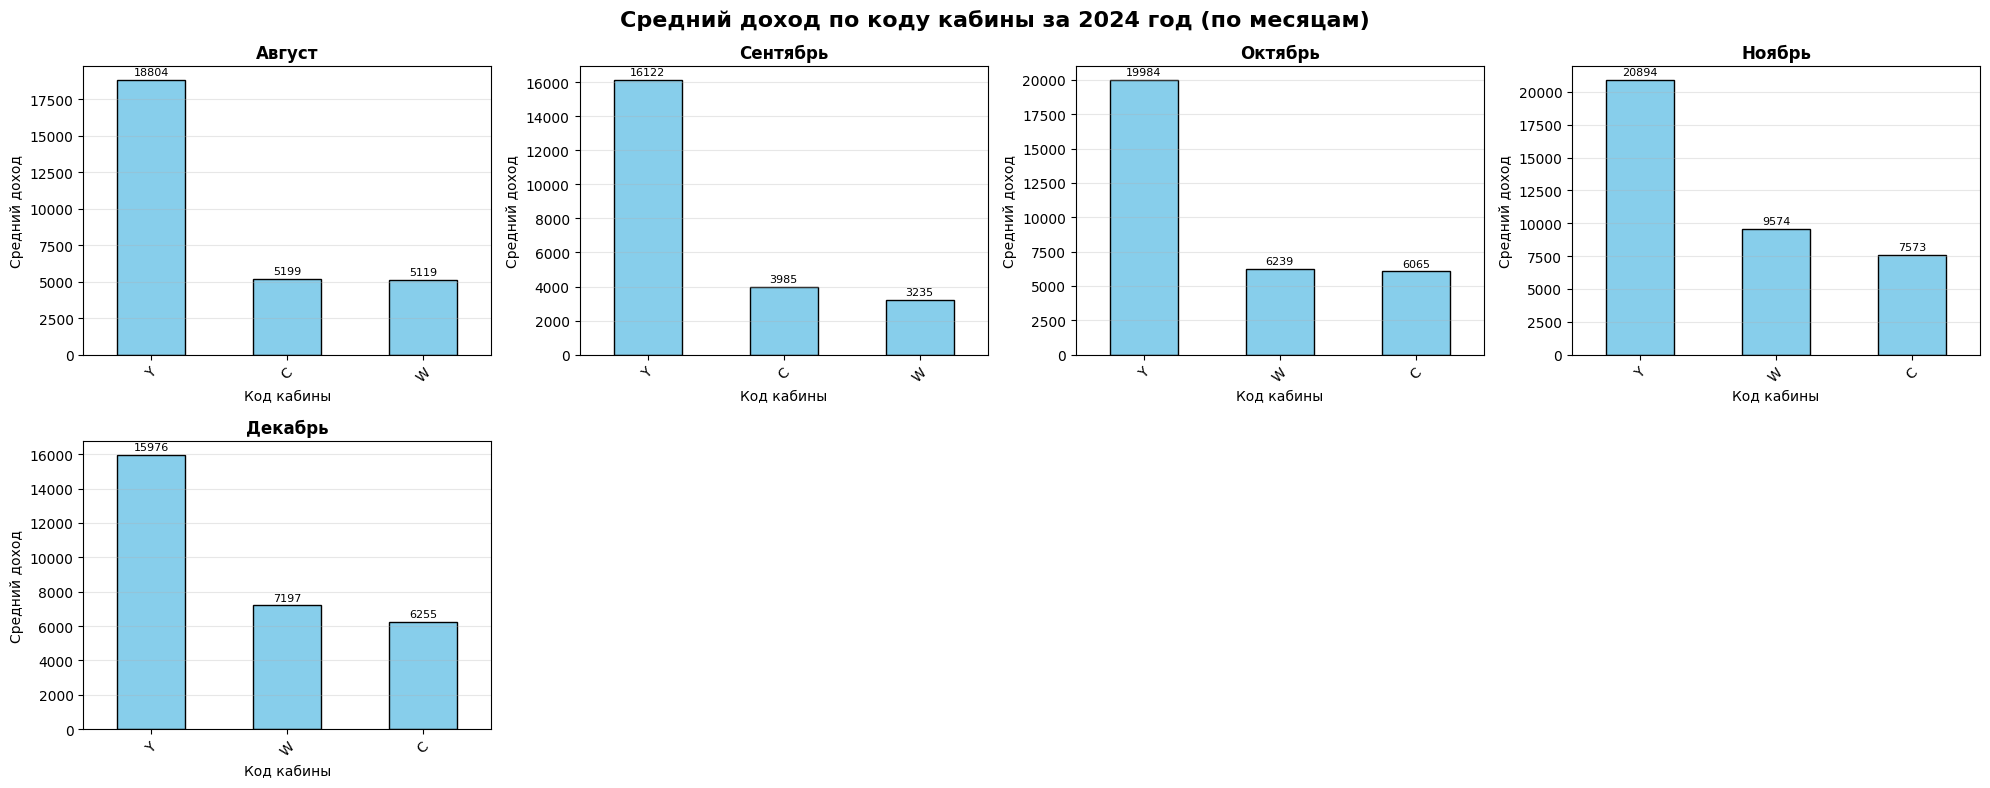

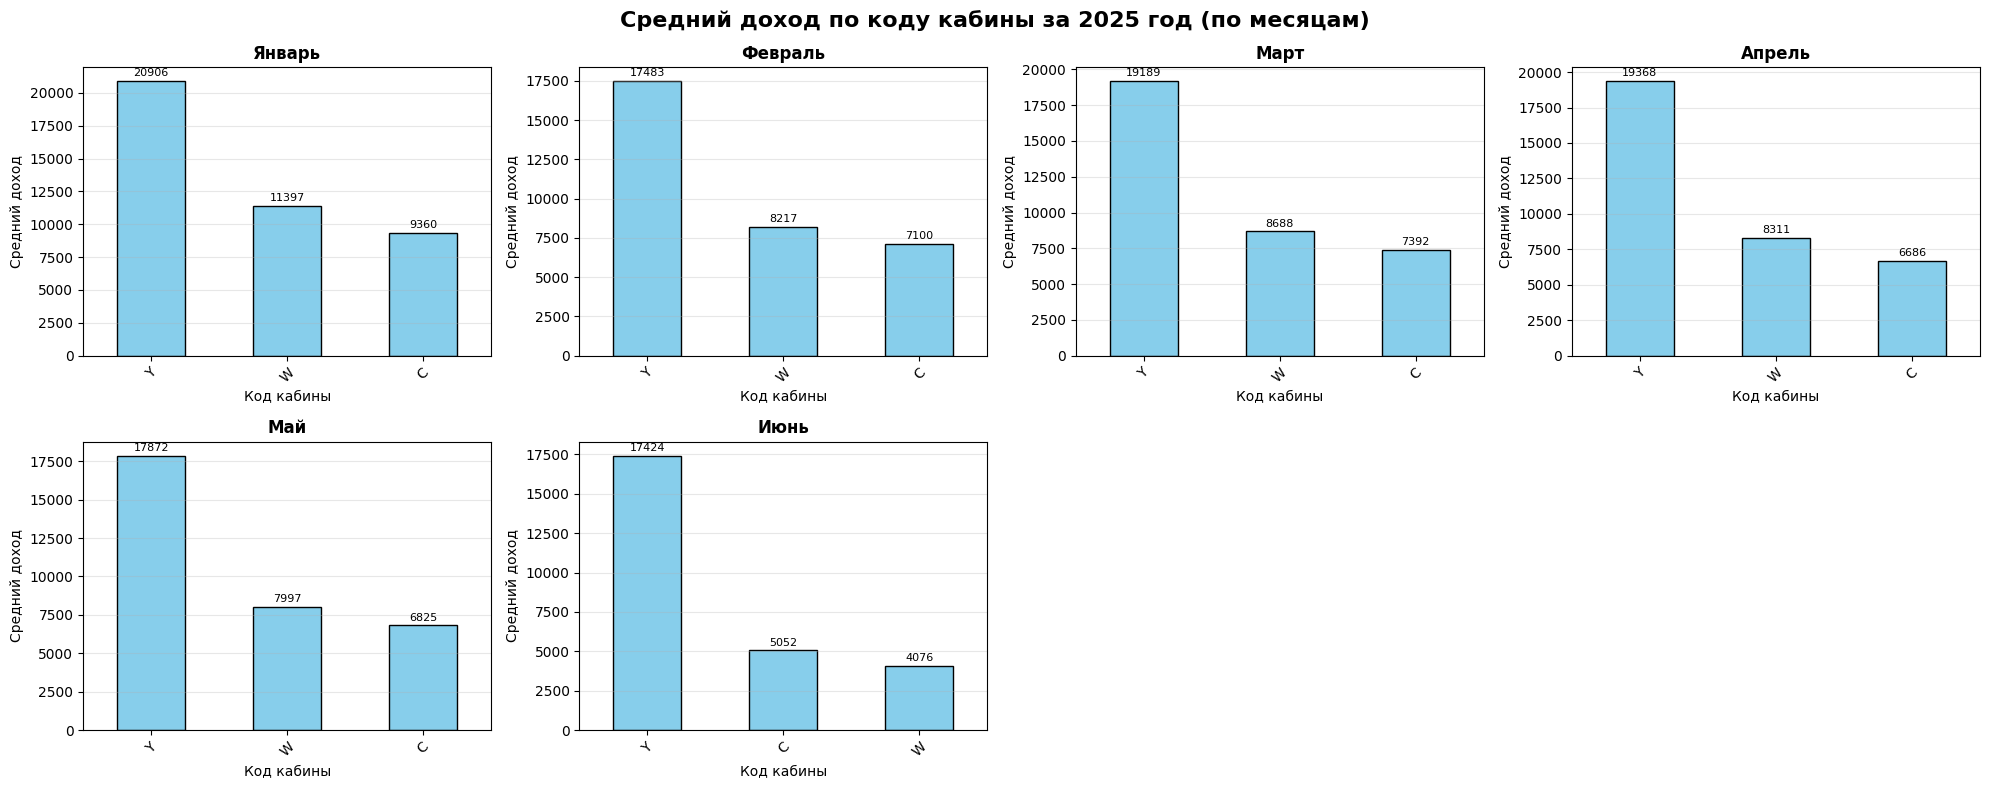

In [ ]:
# ГИСТОГРАММЫ ПО МЕСЯЦАМ И ГОДАМ (ОТДЕЛЬНО ДЛЯ КАЖДОЙ КОМБИНАЦИИ МЕСЯЦ-ГОД)
print("\nСоздание гистограмм по месяцам и годам...")

# Получаем уникальные комбинации год-месяц
df['Год_месяц_строка'] = df['Год'].astype(str) + '-' + df['Месяц'].astype(str).str.zfill(2)
unique_periods = sorted(df['Год_месяц_строка'].unique())

print(f"Найдено уникальных периодов: {len(unique_periods)}")
print("Периоды:", unique_periods)

# Если периодов слишком много, покажем только первые 12 для наглядности
if len(unique_periods) > 12:
    print("Периодов слишком много, показываем первые 12...")
    show_periods = unique_periods[:12]
else:
    show_periods = unique_periods

# Создаем сетку графиков
n_periods = len(show_periods)
cols = 3
rows = (n_periods + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
if rows == 1 and cols == 1:
    axes = np.array([axes])
elif rows == 1:
    axes = axes.reshape(1, -1)
elif cols == 1:
    axes = axes.reshape(-1, 1)

fig.suptitle('Средний доход по коду кабины по месяцам и годам (отдельно для каждого периода)',
             fontsize=16, fontweight='bold')

month_names = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель',
    5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август',
    9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}

for i, period in enumerate(show_periods):
    year, month = map(int, period.split('-'))
    period_data = df[(df['Год'] == year) & (df['Месяц'] == month)]

    row = i // cols
    col = i % cols

    if not period_data.empty:
        period_means = period_data.groupby(cabin_col)[income_col].mean().sort_values(ascending=False)

        if rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]

        period_means.plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black', alpha=0.7)
        ax.set_title(f'{month_names[month]} {year}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Код кабины', fontsize=10)
        ax.set_ylabel('Средний доход', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

        # Добавляем значения на столбцы
        if len(period_means) > 0:
            for j, v in enumerate(period_means):
                ax.text(j, v + max(period_means)*0.01, f'{v:.0f}',
                      ha='center', va='bottom', fontsize=8)

# Скрываем пустые subplots
for i in range(len(show_periods), rows * cols):
    row = i // cols
    col = i % cols
    if rows > 1:
        axes[row, col].set_visible(False)
    else:
        axes[col].set_visible(False)

plt.tight_layout()
plt.show()

# ДОПОЛНИТЕЛЬНО: ГРАФИКИ ДЛЯ ОСТАЛЬНЫХ ПЕРИОДОВ (ЕСЛИ ИХ БОЛЬШЕ 12)
if len(unique_periods) > 12:
    print(f"\nСоздание дополнительных графиков для оставшихся {len(unique_periods) - 12} периодов...")

    remaining_periods = unique_periods[12:]
    n_batches = (len(remaining_periods) + 11) // 12  # По 12 периодов на график

    for batch_num in range(n_batches):
        start_idx = batch_num * 12
        end_idx = min((batch_num + 1) * 12, len(remaining_periods))
        batch_periods = remaining_periods[start_idx:end_idx]

        rows_batch = (len(batch_periods) + 2) // 3  # Всегда 3 колонки
        fig, axes = plt.subplots(rows_batch, 3, figsize=(20, 5*rows_batch))

        if rows_batch == 1:
            axes = axes.reshape(1, -1)

        fig.suptitle(f'Средний доход по коду кабины по месяцам и годам (пакет {batch_num + 2})',
                     fontsize=16, fontweight='bold')

        for i, period in enumerate(batch_periods):
            year, month = map(int, period.split('-'))
            period_data = df[(df['Год'] == year) & (df['Месяц'] == month)]

            row = i // 3
            col = i % 3

            if not period_data.empty:
                period_means = period_data.groupby(cabin_col)[income_col].mean().sort_values(ascending=False)

                period_means.plot(kind='bar', ax=axes[row, col], color='lightcoral', edgecolor='black', alpha=0.7)
                axes[row, col].set_title(f'{month_names[month]} {year}', fontsize=10, fontweight='bold')
                axes[row, col].set_xlabel('')
                axes[row, col].set_ylabel('Средний доход', fontsize=8)
                axes[row, col].tick_params(axis='x', rotation=45)
                axes[row, col].grid(axis='y', alpha=0.3)

                # Добавляем значения на столбцы
                if len(period_means) > 0:
                    for j, v in enumerate(period_means):
                        axes[row, col].text(j, v + max(period_means)*0.01, f'{v:.0f}',
                                          ha='center', va='bottom', fontsize=6)

        # Скрываем пустые subplots
        for i in range(len(batch_periods), rows_batch * 3):
            row = i // 3
            col = i % 3
            axes[row, col].set_visible(False)

        plt.tight_layout()
        plt.show()

# АЛЬТЕРНАТИВНЫЙ ВАРИАНТ: ГРАФИКИ С ГРУППИРОВКОЙ ПО ГОДАМ
print("\n" + "="*50)
print("АЛЬТЕРНАТИВНАЯ ВИЗУАЛИЗАЦИЯ: ГРАФИКИ ПО ГОДАМ С РАЗБИВКОЙ ПО МЕСЯЦАМ")
print("="*50)

# Создаем отдельные графики для каждого года
years = sorted(df['Год'].unique())

for year in years:
    year_data = df[df['Год'] == year]
    months_in_year = sorted(year_data['Месяц'].unique())

    if len(months_in_year) > 0:
        n_months = len(months_in_year)
        cols = 4
        rows = (n_months + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
        if rows == 1 and cols == 1:
            axes = np.array([axes])
        elif rows == 1:
            axes = axes.reshape(1, -1)
        elif cols == 1:
            axes = axes.reshape(-1, 1)

        fig.suptitle(f'Средний доход по коду кабины за {year} год (по месяцам)',
                     fontsize=16, fontweight='bold')

        for i, month in enumerate(months_in_year):
            month_data = year_data[year_data['Месяц'] == month]

            row = i // cols
            col = i % cols

            if not month_data.empty:
                month_means = month_data.groupby(cabin_col)[income_col].mean().sort_values(ascending=False)

                if rows > 1:
                    ax = axes[row, col]
                else:
                    ax = axes[col]

                month_means.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
                ax.set_title(f'{month_names[month]}', fontsize=12, fontweight='bold')
                ax.set_xlabel('Код кабины', fontsize=10)
                ax.set_ylabel('Средний доход', fontsize=10)
                ax.tick_params(axis='x', rotation=45)
                ax.grid(axis='y', alpha=0.3)

                # Добавляем значения на столбцы
                if len(month_means) > 0:
                    for j, v in enumerate(month_means):
                        ax.text(j, v + max(month_means)*0.01, f'{v:.0f}',
                              ha='center', va='bottom', fontsize=8)

        # Скрываем пустые subplots
        for i in range(len(months_in_year), rows * cols):
            row = i // cols
            col = i % cols
            if rows > 1:
                axes[row, col].set_visible(False)
            else:
                axes[col].set_visible(False)

        plt.tight_layout()
        plt.show()

In [ ]:
# ДЕТАЛЬНАЯ СТАТИСТИКА В ТАБЛИЦАХ (ИСПРАВЛЕННЫЙ КОД)
print("\n" + "="*50)
print("ДЕТАЛЬНАЯ СТАТИСТИКА В ТАБЛИЦАХ")
print("="*50)

# Статистика по месяцам (все годы) - ИСПРАВЛЕННЫЙ ВАРИАНТ
monthly_detailed = df.groupby(['Месяц', cabin_col])[income_col].agg([
    ('Количество_рейсов', 'count'),
    ('Средний_доход', 'mean'),
    ('Медианный_доход', 'median'),
    ('Мода_дохода', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('Стандартное_отклонение', 'std'),
    ('Минимальный_доход', 'min'),
    ('Максимальный_доход', 'max')
]).round(2)

print("\nДетальная статистика по месяцам (все годы объединены):")
print(monthly_detailed.head(15))

# Статистика по годам - ИСПРАВЛЕННЫЙ ВАРИАНТ
yearly_detailed = df.groupby(['Год', cabin_col])[income_col].agg([
    ('Количество_рейсов', 'count'),
    ('Средний_доход', 'mean'),
    ('Медианный_доход', 'median'),
    ('Мода_дохода', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('Стандартное_отклонение', 'std'),
    ('Минимальный_доход', 'min'),
    ('Максимальный_доход', 'max')
]).round(2)

print("\nДетальная статистика по годам:")
print(yearly_detailed)

# Детальная статистика по месяцам и годам - ИСПРАВЛЕННЫЙ ВАРИАНТ
detailed_monthly_stats = df.groupby(['Год', 'Месяц', cabin_col])[income_col].agg([
    ('Количество_рейсов', 'count'),
    ('Средний_доход', 'mean'),
    ('Медианный_доход', 'median'),
    ('Мода_дохода', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
]).round(2).reset_index()

print("\nДетальная статистика по месяцам и годам:")
print(detailed_monthly_stats)

# Сохраняем результаты в CSV
monthly_detailed.to_csv('статистика_дохода_по_месяцам.csv', encoding='utf-8-sig')
yearly_detailed.to_csv('статистика_дохода_по_годам.csv', encoding='utf-8-sig')
detailed_monthly_stats.to_csv('статистика_дохода_по_месяцам_и_годам.csv', encoding='utf-8-sig')

print("\nРезультаты сохранены в файлы:")
print("- статистика_дохода_по_месяцам.csv")
print("- статистика_дохода_по_годам.csv")
print("- статистика_дохода_по_месяцам_и_годам.csv")


ДЕТАЛЬНАЯ СТАТИСТИКА В ТАБЛИЦАХ

Детальная статистика по месяцам (все годы объединены):
                  Количество_рейсов  Средний_доход  Медианный_доход  \
Месяц Код кабины                                                      
1     C                         819        9360.03          2591.54   
      W                         266       11397.18          6416.54   
      Y                         881       20906.33          9891.52   
2     C                         758        7100.42          2334.93   
      W                         198        8217.23          5472.78   
      Y                         793       17482.53          8826.87   
3     C                         849        7391.61          3039.83   
      W                         259        8687.54          7323.76   
      Y                         900       19189.32          9727.17   
4     C                         742        6686.36          2367.71   
      W                         247        8311.40         

In [ ]:
# 9. КЛЮЧЕВЫЕ ВЫВОДЫ ПО МЕСЯЦАМ И ГОДАМ
print("\n" + "="*50)
print("КЛЮЧЕВЫЕ ВЫВОДЫ ПО МЕСЯЦАМ И ГОДАМ")
print("="*50)

# Анализ сезонности по месяцам
print("\nАнализ сезонности по месяцам:")
monthly_analysis = df.groupby('Месяц')[income_col].mean().sort_values(ascending=False)
for month, income in monthly_analysis.items():
    print(f"{month_names[month-1]}: {income:.2f}")

# Анализ трендов по годам
print("\nАнализ трендов по годам:")
yearly_analysis = df.groupby('Год')[income_col].mean()
for year, income in yearly_analysis.items():
    print(f"{year} год: {income:.2f}")

# Находим лучшие месяцы для каждой кабины
print("\nЛучшие месяцы для каждой кабины:")
for cabin in cabin_codes:
    cabin_data = df[df[cabin_col] == cabin]
    best_month = cabin_data.groupby('Месяц')[income_col].mean().idxmax()
    best_income = cabin_data.groupby('Месяц')[income_col].mean().max()
    print(f"Кабина {cabin}: лучший месяц - {month_names[best_month-1]} (доход: {best_income:.2f})")


КЛЮЧЕВЫЕ ВЫВОДЫ ПО МЕСЯЦАМ И ГОДАМ

Анализ сезонности по месяцам:


KeyError: 0

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19269 entries, 0 to 19268
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата вылета              19269 non-null  datetime64[ns]
 1   Номер рейса              19269 non-null  int64         
 2   Аэропорт вылета          19269 non-null  object        
 3   Аэропорт прилета         19269 non-null  object        
 4   Время вылета             19269 non-null  object        
 5   Время прилета            19269 non-null  object        
 6   Емкость кабины           19269 non-null  int64         
 7   LF Кабина                19269 non-null  float64       
 8   Бронирования по кабинам  19269 non-null  int64         
 9   Тип ВС                   19269 non-null  object        
 10  Код кабины               19269 non-null  object        
 11  Доход пасс               19269 non-null  float64       
 12  Пассажиры  

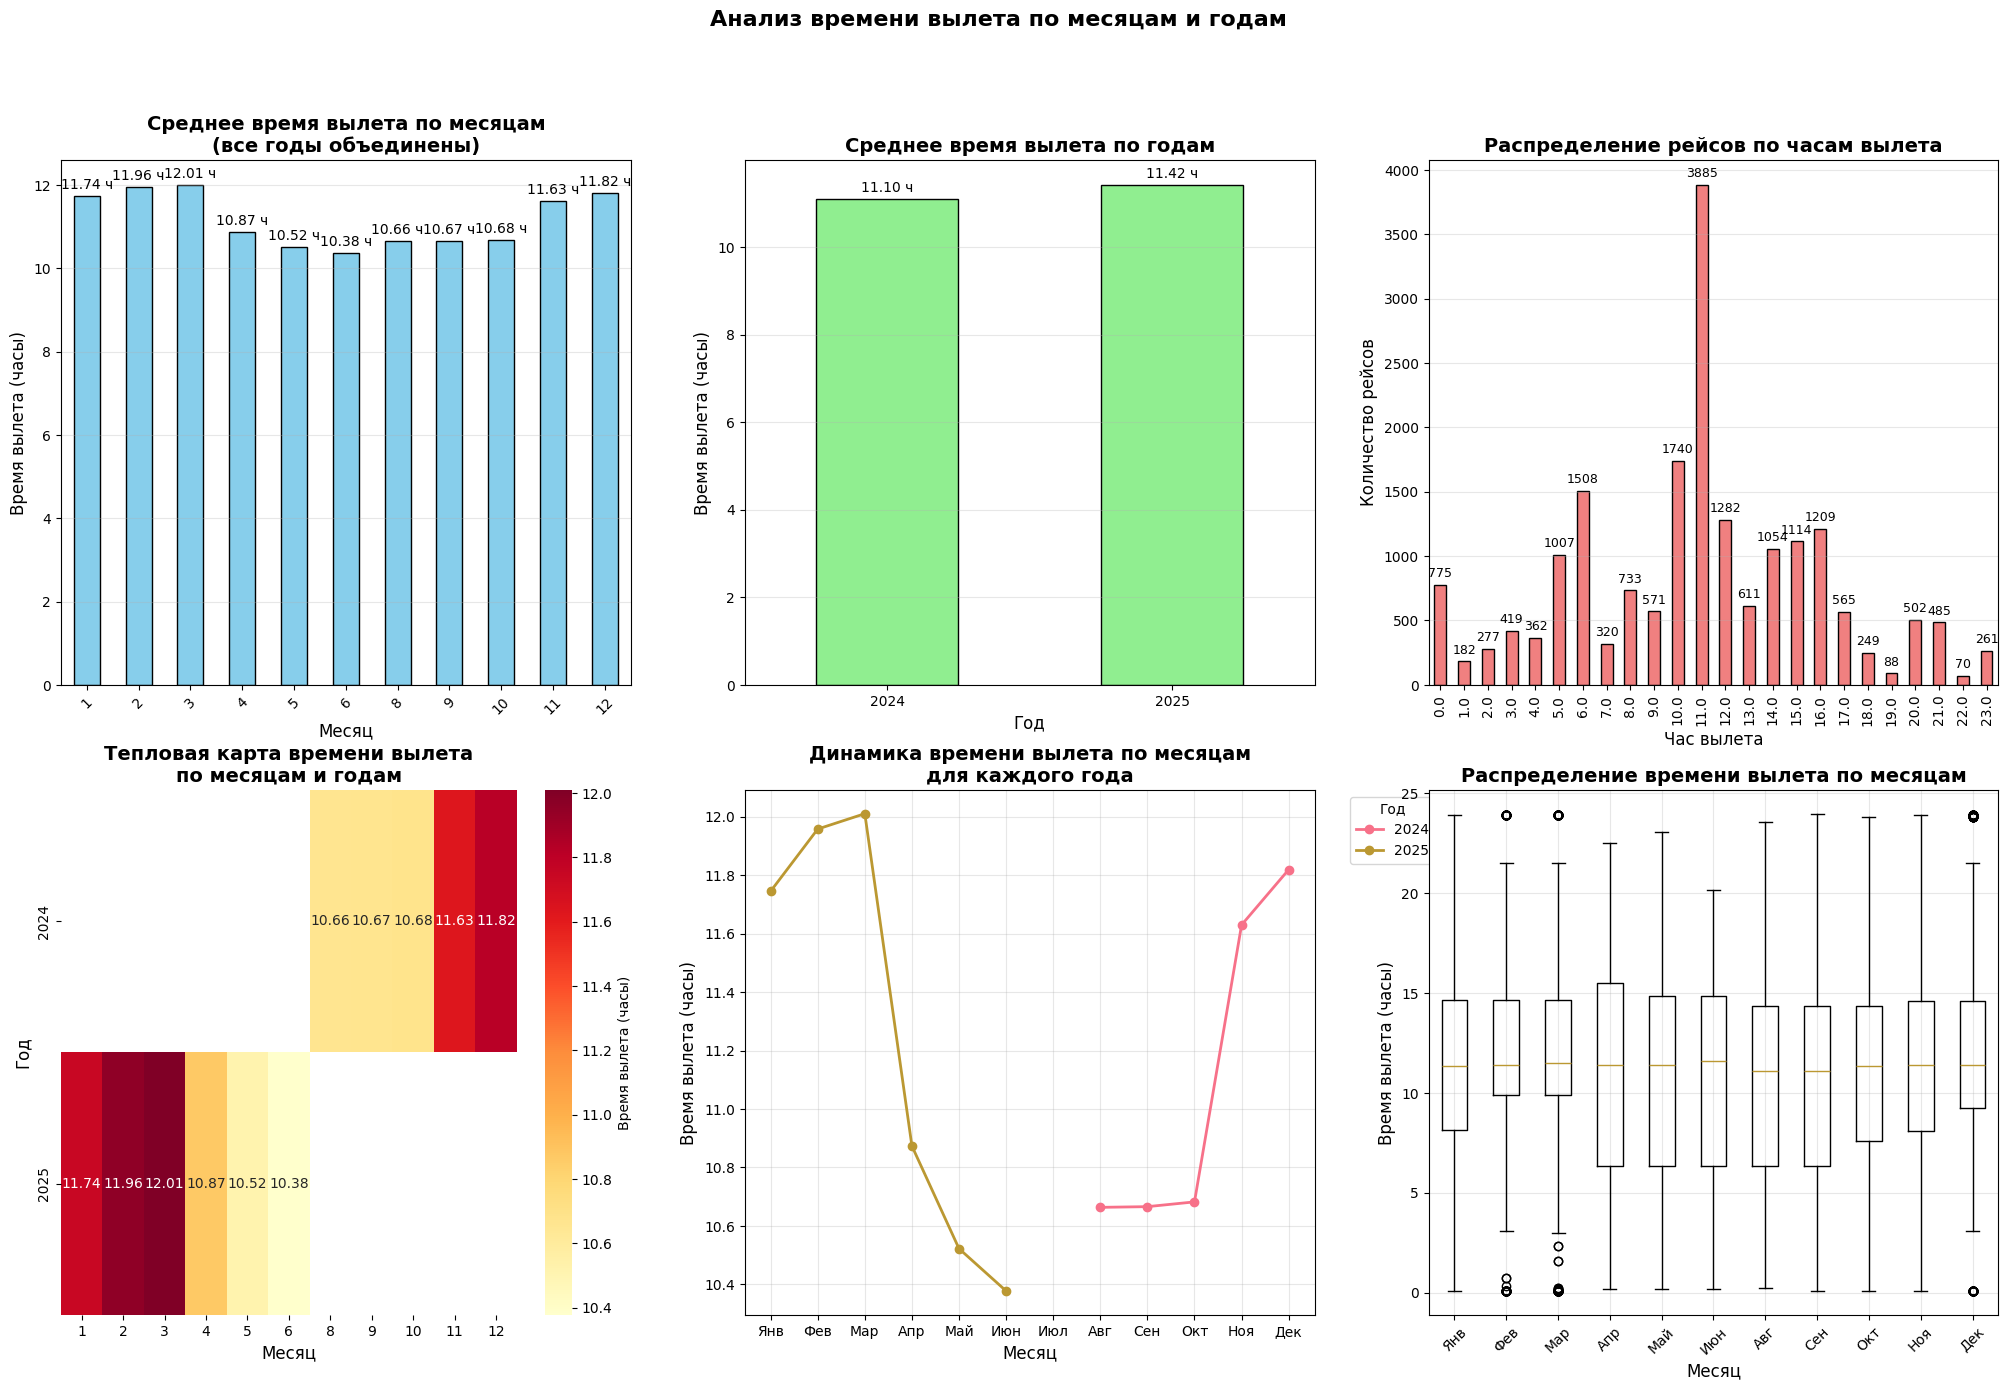

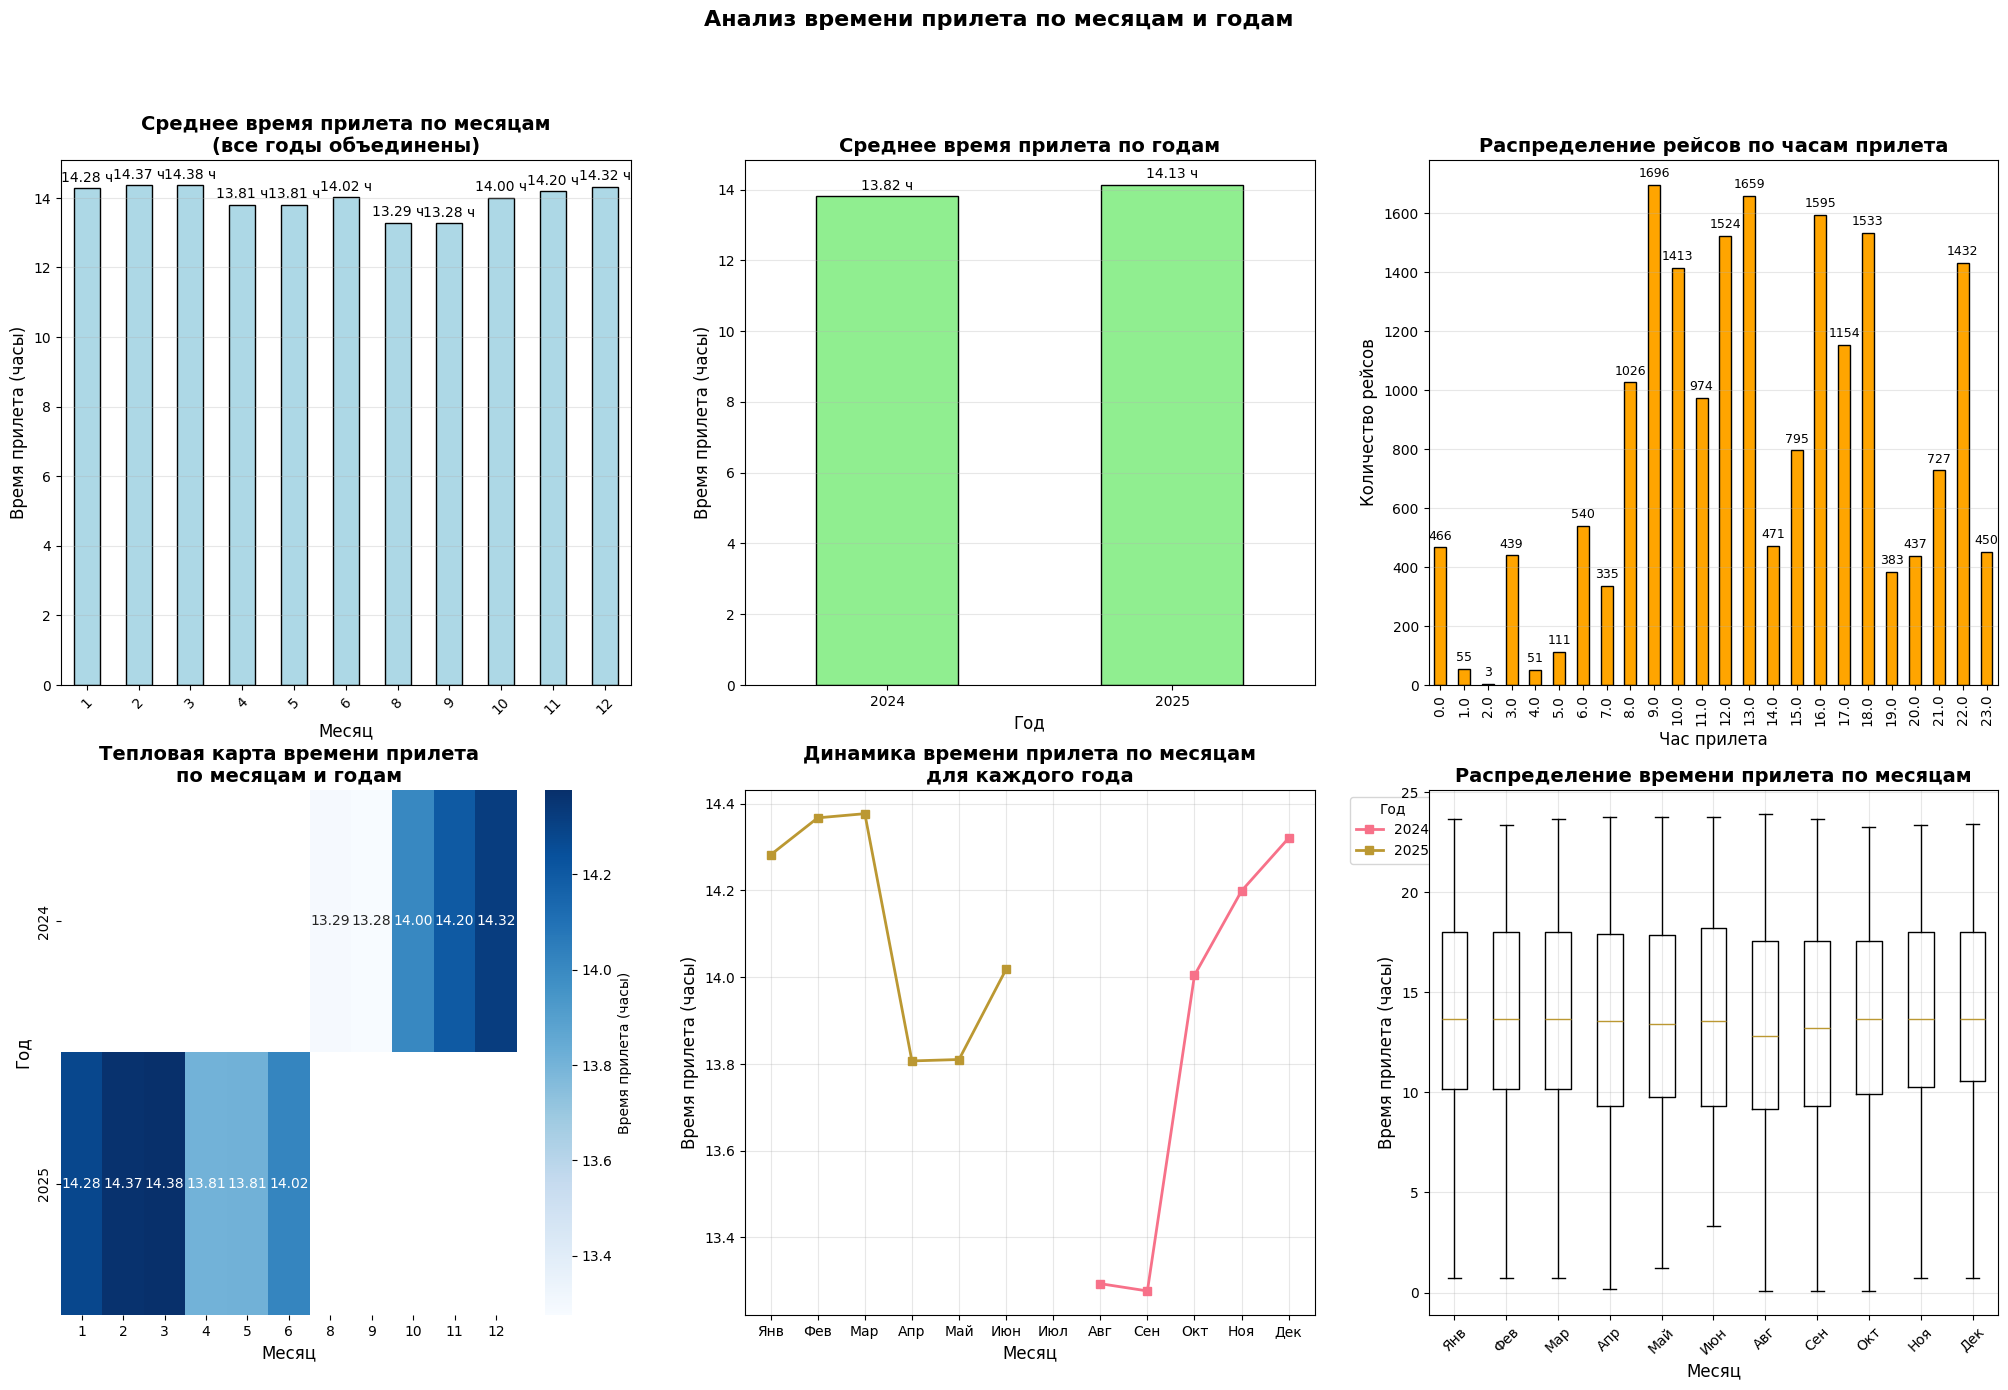

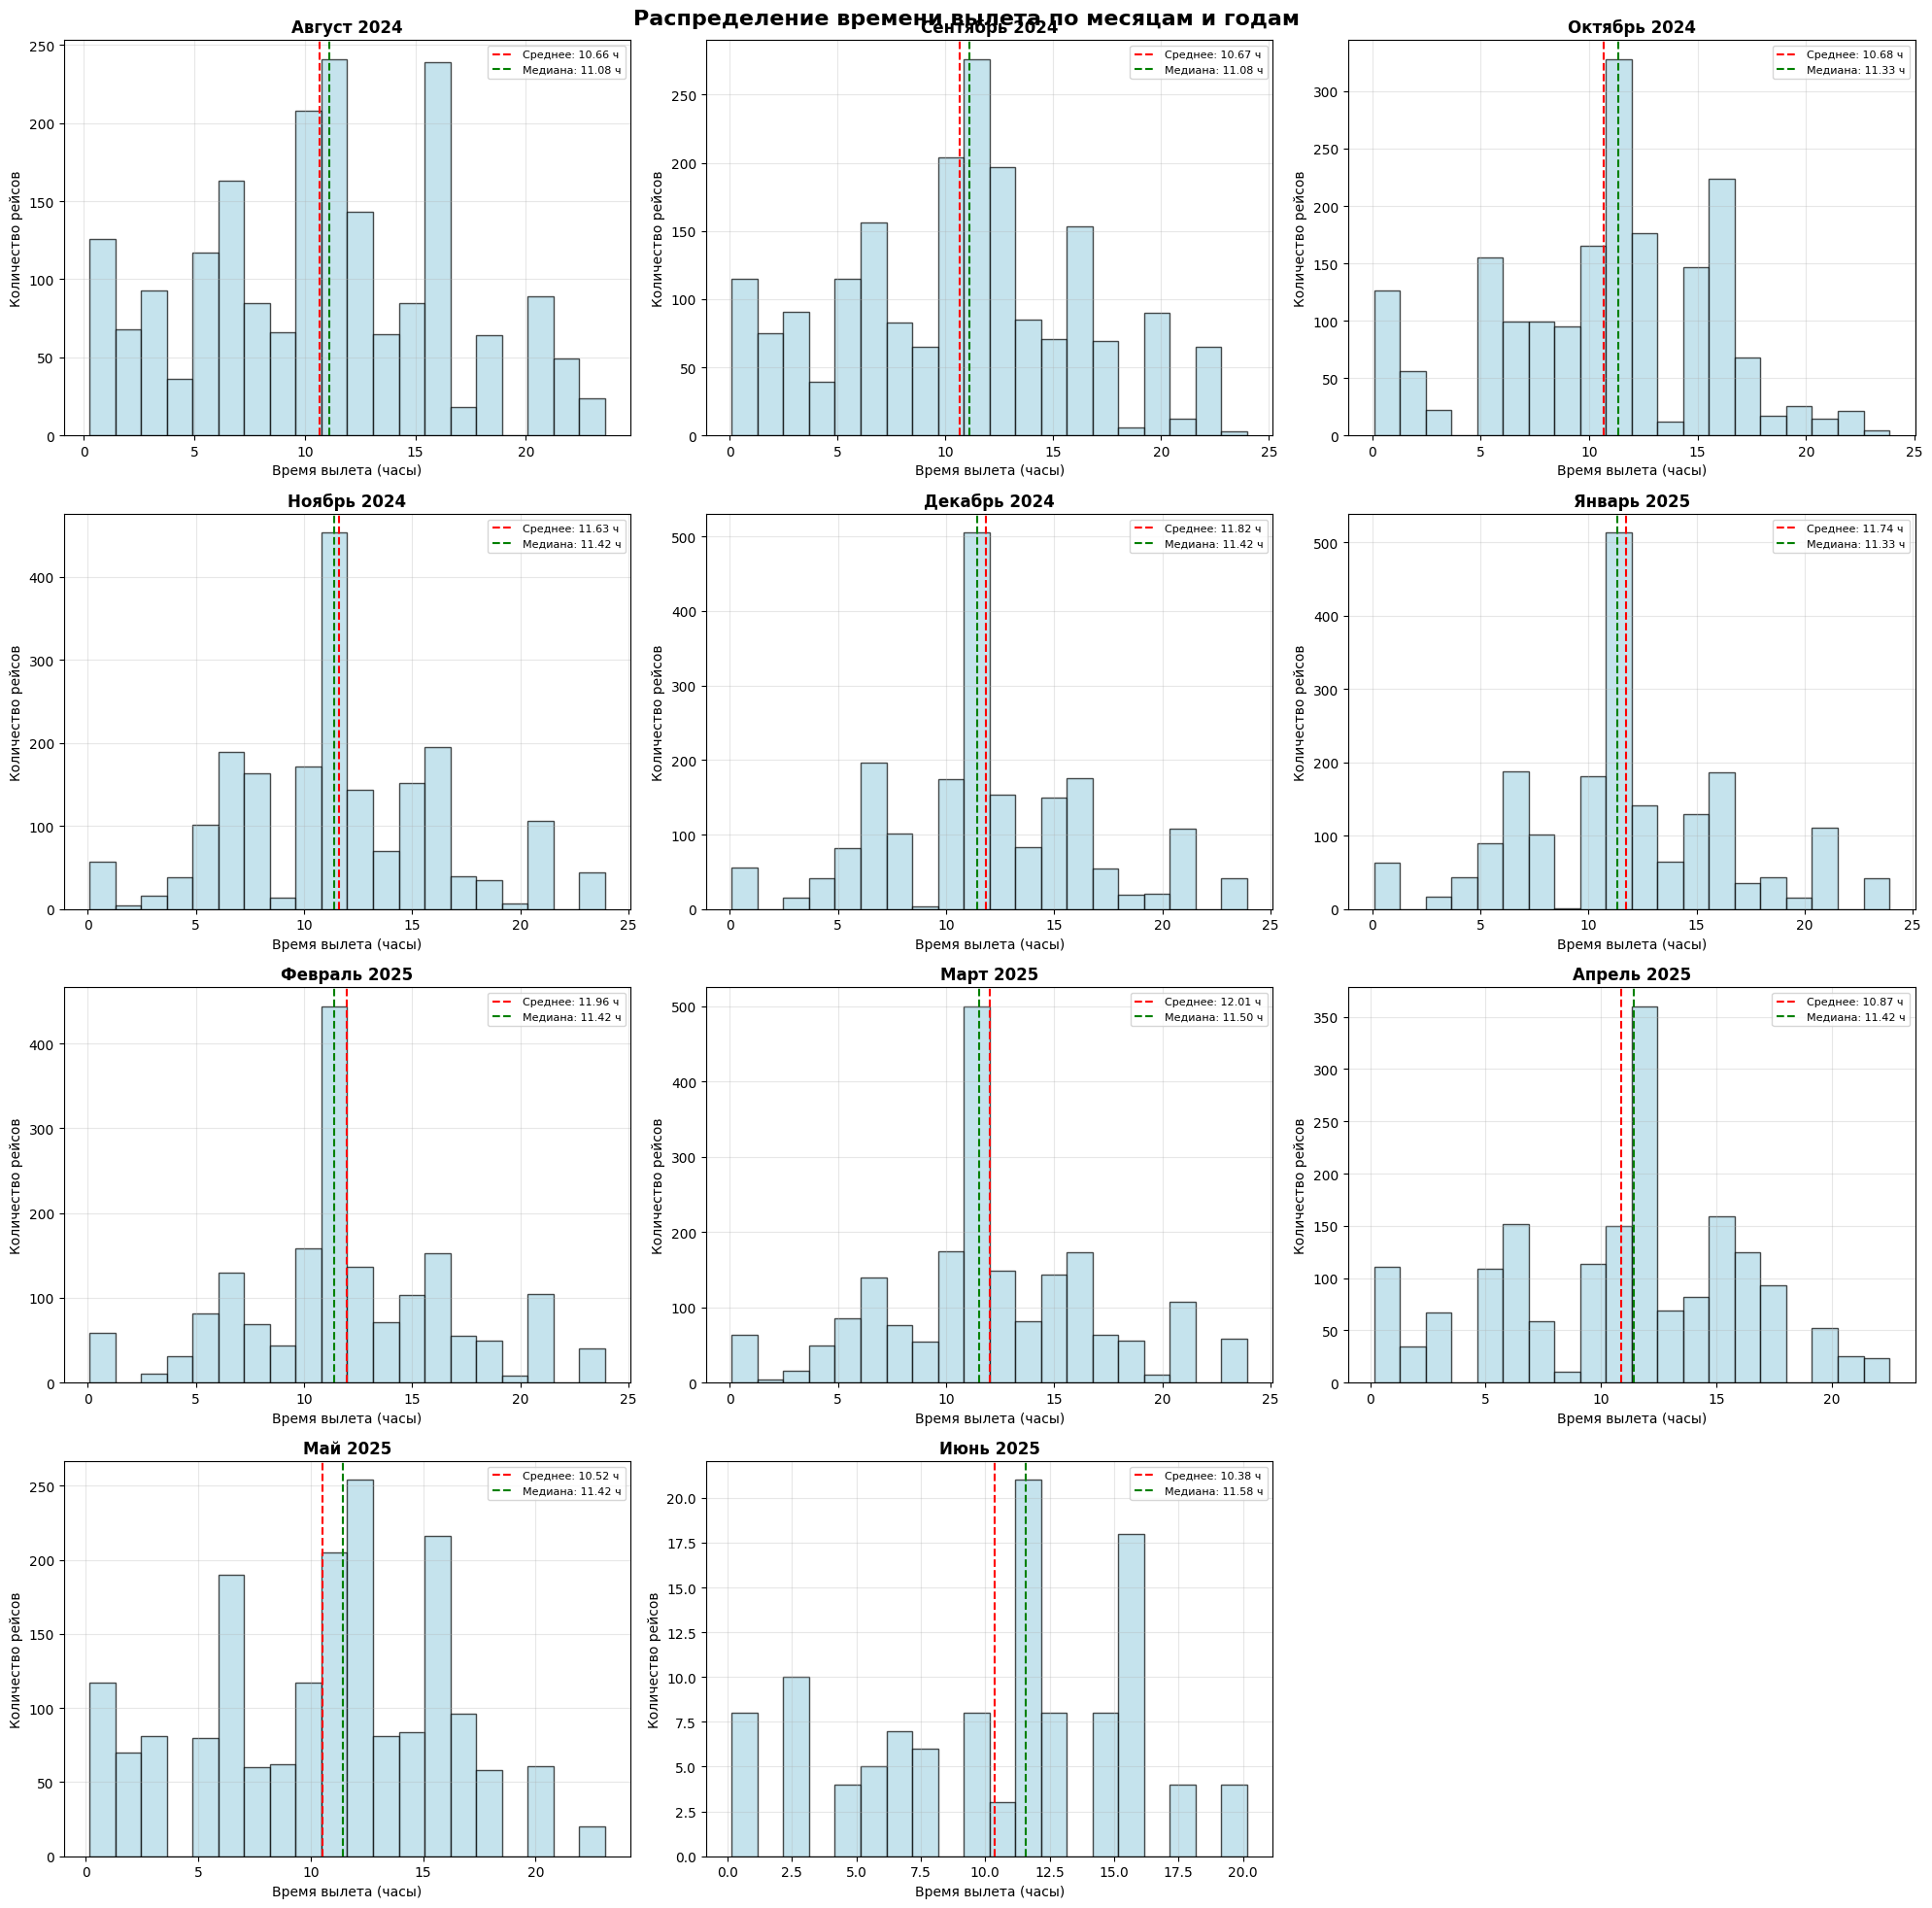


СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА ВРЕМЕНИ
Результаты анализа сохранены в файлы:
- статистика_времени_вылета_по_месяцам.csv
- статистика_времени_вылета_по_годам.csv
- статистика_времени_вылета_по_месяцам_и_годам.csv
- статистика_времени_прилета_по_месяцам.csv

КЛЮЧЕВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ВРЕМЕНИ

СЕЗОННОСТЬ ВРЕМЕНИ ВЫЛЕТА (разница между лучшим и худшим месяцем):
Лучший месяц: Июнь (10.38 ч)
Худший месяц: Март (12.01 ч)
Разница: 1.63 ч

ТРЕНДЫ ВРЕМЕНИ ВЫЛЕТА ПО ГОДАМ:
2024 год: среднее время вылета 11.10 ч
2025 год: среднее время вылета 11.42 ч

Анализ времени завершен!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

# Проверим структуру данных
print("Информация о данных:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

# Убедимся, что есть столбцы времени
time_departure_col = 'Время вылета'
time_arrival_col = 'Время прилета'

# Преобразуем время в числовой формат (минуты с начала дня)
def time_to_minutes(time_str):
    """Преобразует время в формате 'HH:MM' в количество минут с начала дня"""
    try:
        if pd.isna(time_str) or time_str == '':
            return np.nan
        parts = str(time_str).split(':')
        if len(parts) == 2:
            hours = int(parts[0])
            minutes = int(parts[1])
            return hours * 60 + minutes
        return np.nan
    except:
        return np.nan

# Применяем преобразование времени
df['Время вылета (минуты)'] = df[time_departure_col].apply(time_to_minutes)
df['Время прилета (минуты)'] = df[time_arrival_col].apply(time_to_minutes)

# Также создаем отдельные колонки для часов и минут
df['Час вылета'] = df[time_departure_col].str.split(':').str[0].astype(float)
df['Минута вылета'] = df[time_departure_col].str.split(':').str[1].astype(float)
df['Час прилета'] = df[time_arrival_col].str.split(':').str[0].astype(float)
df['Минута прилета'] = df[time_arrival_col].str.split(':').str[1].astype(float)

# Создаем колонки для даты и времени
df['Дата вылета'] = pd.to_datetime(df['Дата вылета'], errors='coerce')
df['Год'] = df['Дата вылета'].dt.year
df['Месяц'] = df['Дата вылета'].dt.month
df['Месяц_год'] = df['Дата вылета'].dt.strftime('%Y-%m')

# Проверим преобразование
print("\nПреобразование времени завершено:")
print(df[['Время вылета', 'Время вылета (минуты)', 'Час вылета',
          'Время прилета', 'Время прилета (минуты)', 'Час прилета']].head())

# 1. ЧИСЛОВОЙ АНАЛИЗ ВРЕМЕНИ ПО МЕСЯЦАМ И ГОДАМ
print("\n" + "="*60)
print("ЧИСЛОВОЙ АНАЛИЗ ВРЕМЕНИ ВЫЛЕТА И ПРИЛЕТА ПО МЕСЯЦАМ И ГОДАМ")
print("="*60)

# 1.1 Анализ времени вылета по месяцам (все годы)
print("\n1.1 СТАТИСТИКА ВРЕМЕНИ ВЫЛЕТА ПО МЕСЯЦАМ (ВСЕ ГОДЫ ОБЪЕДИНЕНЫ):")
time_departure_monthly = df.groupby('Месяц')['Время вылета (минуты)'].agg([
    ('Количество_рейсов', 'count'),
    ('Среднее_время', 'mean'),
    ('Медианное_время', 'median'),
    ('Мода_времени', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('Стандартное_отклонение', 'std'),
    ('Минимальное_время', 'min'),
    ('Максимальное_время', 'max')
]).round(2)

# Конвертируем минуты обратно в часы для удобства чтения
time_departure_monthly_readable = time_departure_monthly.copy()
for col in ['Среднее_время', 'Медианное_время', 'Мода_времени', 'Минимальное_время', 'Максимальное_время']:
    time_departure_monthly_readable[f'{col}_часы'] = (time_departure_monthly_readable[col] / 60).round(2)

print(time_departure_monthly_readable)

# 1.2 Анализ времени вылета по годам
print("\n1.2 СТАТИСТИКА ВРЕМЕНИ ВЫЛЕТА ПО ГОДАМ:")
time_departure_yearly = df.groupby('Год')['Время вылета (минуты)'].agg([
    ('Количество_рейсов', 'count'),
    ('Среднее_время', 'mean'),
    ('Медианное_время', 'median'),
    ('Мода_времени', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('Стандартное_отклонение', 'std'),
    ('Минимальное_время', 'min'),
    ('Максимальное_время', 'max')
]).round(2)

# Конвертируем в часы
time_departure_yearly_readable = time_departure_yearly.copy()
for col in ['Среднее_время', 'Медианное_время', 'Мода_времени', 'Минимальное_время', 'Максимальное_время']:
    time_departure_yearly_readable[f'{col}_часы'] = (time_departure_yearly_readable[col] / 60).round(2)

print(time_departure_yearly_readable)

# 1.3 Детальный анализ по месяцам и годам
print("\n1.3 ДЕТАЛЬНЫЙ АНАЛИЗ ВРЕМЕНИ ВЫЛЕТА ПО МЕСЯЦАМ И ГОДАМ:")
time_departure_detailed = df.groupby(['Год', 'Месяц'])['Время вылета (минуты)'].agg([
    ('Количество_рейсов', 'count'),
    ('Среднее_время', 'mean'),
    ('Медианное_время', 'median'),
    ('Мода_времени', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
]).round(2).reset_index()

print(time_departure_detailed.head(10))

# 1.4 Аналогичный анализ для времени прилета
print("\n1.4 СТАТИСТИКА ВРЕМЕНИ ПРИЛЕТА ПО МЕСЯЦАМ (ВСЕ ГОДЫ ОБЪЕДИНЕНЫ):")
time_arrival_monthly = df.groupby('Месяц')['Время прилета (минуты)'].agg([
    ('Количество_рейсов', 'count'),
    ('Среднее_время', 'mean'),
    ('Медианное_время', 'median'),
    ('Мода_времени', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('Стандартное_отклонение', 'std'),
    ('Минимальное_время', 'min'),
    ('Максимальное_время', 'max')
]).round(2)

# Конвертируем в часы
time_arrival_monthly_readable = time_arrival_monthly.copy()
for col in ['Среднее_время', 'Медианное_время', 'Мода_времени', 'Минимальное_время', 'Максимальное_время']:
    time_arrival_monthly_readable[f'{col}_часы'] = (time_arrival_monthly_readable[col] / 60).round(2)

print(time_arrival_monthly_readable)

# 2. ВИЗУАЛИЗАЦИЯ АНАЛИЗА ВРЕМЕНИ
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ АНАЛИЗА ВРЕМЕНИ ВЫЛЕТА И ПРИЛЕТА")
print("="*60)

# 2.1 Визуализация времени вылета по месяцам
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.suptitle('Анализ времени вылета по месяцам и годам', fontsize=16, fontweight='bold')

# 2.1.1 Среднее время вылета по месяцам (все годы)
plt.subplot(2, 3, 1)
monthly_avg_departure = df.groupby('Месяц')['Время вылета (минуты)'].mean()
monthly_avg_departure_hours = monthly_avg_departure / 60

monthly_avg_departure_hours.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Среднее время вылета по месяцам\n(все годы объединены)', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Время вылета (часы)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(monthly_avg_departure_hours):
    plt.text(i, v + 0.1, f'{v:.2f} ч', ha='center', va='bottom', fontsize=10)

# 2.1.2 Среднее время вылета по годам
plt.subplot(2, 3, 2)
yearly_avg_departure = df.groupby('Год')['Время вылета (минуты)'].mean()
yearly_avg_departure_hours = yearly_avg_departure / 60

yearly_avg_departure_hours.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Среднее время вылета по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Время вылета (часы)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(yearly_avg_departure_hours):
    plt.text(i, v + 0.1, f'{v:.2f} ч', ha='center', va='bottom', fontsize=10)

# 2.1.3 Распределение времени вылета по часам
plt.subplot(2, 3, 3)
departure_hours = df['Час вылета'].dropna()
departure_hours_distribution = departure_hours.value_counts().sort_index()

departure_hours_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Распределение рейсов по часам вылета', fontsize=14, fontweight='bold')
plt.xlabel('Час вылета', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(departure_hours_distribution):
    plt.text(i, v + max(departure_hours_distribution)*0.01, f'{v:.0f}',
             ha='center', va='bottom', fontsize=9)

# 2.1.4 Тепловая карта времени вылета по месяцам и годам
plt.subplot(2, 3, 4)
heatmap_departure = df.pivot_table(
    values='Время вылета (минуты)',
    index='Год',
    columns='Месяц',
    aggfunc='mean'
) / 60  # Конвертируем в часы

sns.heatmap(heatmap_departure, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Время вылета (часы)'})
plt.title('Тепловая карта времени вылета\nпо месяцам и годам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Год', fontsize=12)

# 2.1.5 Динамика времени вылета по месяцам для каждого года
plt.subplot(2, 3, 5)
years = sorted(df['Год'].unique())
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

for year in years:
    year_data = df[df['Год'] == year]
    monthly_avg = year_data.groupby('Месяц')['Время вылета (минуты)'].mean() / 60
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label=f'{year}', linewidth=2)

plt.title('Динамика времени вылета по месяцам\nдля каждого года', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Время вылета (часы)', fontsize=12)
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), month_names)

# 2.1.6 Boxplot времени вылета по месяцам - ИСПРАВЛЕННЫЙ ВАРИАНТ
plt.subplot(2, 3, 6)
departure_data = []
months = sorted(df['Месяц'].unique())
month_labels = []

for month in months:
    month_data = df[df['Месяц'] == month]['Время вылета (минуты)'].dropna() / 60
    if len(month_data) > 0:  # Добавляем только если есть данные
        departure_data.append(month_data)
        month_labels.append(month_names[month-1])  # Соответствующие метки

# Проверяем, что данные не пустые
if len(departure_data) > 0:
    plt.boxplot(departure_data, labels=month_labels)
    plt.title('Распределение времени вылета по месяцам', fontsize=14, fontweight='bold')
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Время вылета (часы)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Нет данных для boxplot', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('Распределение времени вылета по месяцам\n(данные отсутствуют)',
              fontsize=14, fontweight='bold')

# 2.2 Визуализация времени прилета
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.suptitle('Анализ времени прилета по месяцам и годам', fontsize=16, fontweight='bold')

# 2.2.1 Среднее время прилета по месяцам (все годы)
plt.subplot(2, 3, 1)
monthly_avg_arrival = df.groupby('Месяц')['Время прилета (минуты)'].mean()
monthly_avg_arrival_hours = monthly_avg_arrival / 60

monthly_avg_arrival_hours.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Среднее время прилета по месяцам\n(все годы объединены)', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Время прилета (часы)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(monthly_avg_arrival_hours):
    plt.text(i, v + 0.1, f'{v:.2f} ч', ha='center', va='bottom', fontsize=10)

# 2.2.2 Среднее время прилета по годам
plt.subplot(2, 3, 2)
yearly_avg_arrival = df.groupby('Год')['Время прилета (минуты)'].mean()
yearly_avg_arrival_hours = yearly_avg_arrival / 60

yearly_avg_arrival_hours.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Среднее время прилета по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Время прилета (часы)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(yearly_avg_arrival_hours):
    plt.text(i, v + 0.1, f'{v:.2f} ч', ha='center', va='bottom', fontsize=10)

# 2.2.3 Распределение времени прилета по часам
plt.subplot(2, 3, 3)
arrival_hours = df['Час прилета'].dropna()
arrival_hours_distribution = arrival_hours.value_counts().sort_index()

arrival_hours_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Распределение рейсов по часам прилета', fontsize=14, fontweight='bold')
plt.xlabel('Час прилета', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(arrival_hours_distribution):
    plt.text(i, v + max(arrival_hours_distribution)*0.01, f'{v:.0f}',
             ha='center', va='bottom', fontsize=9)

# 2.2.4 Тепловая карта времени прилета по месяцам и годам
plt.subplot(2, 3, 4)
heatmap_arrival = df.pivot_table(
    values='Время прилета (минуты)',
    index='Год',
    columns='Месяц',
    aggfunc='mean'
) / 60  # Конвертируем в часы

sns.heatmap(heatmap_arrival, annot=True, fmt='.2f', cmap='Blues',
            cbar_kws={'label': 'Время прилета (часы)'})
plt.title('Тепловая карта времени прилета\nпо месяцам и годам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Год', fontsize=12)

# 2.2.5 Динамика времени прилета по месяцам для каждого года
plt.subplot(2, 3, 5)
for year in years:
    year_data = df[df['Год'] == year]
    monthly_avg = year_data.groupby('Месяц')['Время прилета (минуты)'].mean() / 60
    plt.plot(monthly_avg.index, monthly_avg.values, marker='s', label=f'{year}', linewidth=2)

plt.title('Динамика времени прилета по месяцам\nдля каждого года', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Время прилета (часы)', fontsize=12)
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), month_names)

# 2.2.6 Boxplot времени прилета по месяцам - ИСПРАВЛЕННЫЙ ВАРИАНТ
plt.subplot(2, 3, 6)
arrival_data = []
arrival_labels = []

for month in months:
    month_data = df[df['Месяц'] == month]['Время прилета (минуты)'].dropna() / 60
    if len(month_data) > 0:  # Добавляем только если есть данные
        arrival_data.append(month_data)
        arrival_labels.append(month_names[month-1])

# Проверяем, что данные не пустые
if len(arrival_data) > 0:
    plt.boxplot(arrival_data, labels=arrival_labels)
    plt.title('Распределение времени прилета по месяцам', fontsize=14, fontweight='bold')
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Время прилета (часы)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Нет данных для boxplot', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('Распределение времени прилета по месяцам\n(данные отсутствуют)',
              fontsize=14, fontweight='bold')

# 3. ДЕТАЛЬНЫЕ ГИСТОГРАММЫ ПО МЕСЯЦАМ И ГОДАМ
print("\n" + "="*60)
print("ДЕТАЛЬНЫЕ ГИСТОГРАММЫ ВРЕМЕНИ ВЫЛЕТА ПО МЕСЯЦАМ И ГОДАМ")
print("="*60)

# Создаем гистограммы для каждого месяца каждого года
unique_periods = sorted(df['Месяц_год'].unique())

# Покажем первые 12 периодов для наглядности
show_periods = unique_periods[:12] if len(unique_periods) > 12 else unique_periods

n_periods = len(show_periods)
cols = 3
rows = (n_periods + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
if rows == 1 and cols == 1:
    axes = np.array([axes])
elif rows == 1:
    axes = axes.reshape(1, -1)

fig.suptitle('Распределение времени вылета по месяцам и годам', fontsize=16, fontweight='bold')

month_names_full = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь',
    7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}

for i, period in enumerate(show_periods):
    year, month = map(int, period.split('-'))
    period_data = df[df['Месяц_год'] == period]

    row = i // cols
    col = i % cols

    if rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]

    if not period_data.empty:
        departure_times = period_data['Время вылета (минуты)'].dropna() / 60  # в часах

        ax.hist(departure_times, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'{month_names_full[month]} {year}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Время вылета (часы)', fontsize=10)
        ax.set_ylabel('Количество рейсов', fontsize=10)
        ax.grid(True, alpha=0.3)

        # Добавляем статистику на график
        mean_time = departure_times.mean()
        median_time = departure_times.median()
        ax.axvline(mean_time, color='red', linestyle='--', label=f'Среднее: {mean_time:.2f} ч')
        ax.axvline(median_time, color='green', linestyle='--', label=f'Медиана: {median_time:.2f} ч')
        ax.legend(fontsize=8)

# Скрываем пустые subplots
for i in range(len(show_periods), rows * cols):
    row = i // cols
    col = i % cols
    if rows > 1:
        axes[row, col].set_visible(False)
    else:
        axes[col].set_visible(False)

plt.tight_layout()
plt.show()

# 4. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n" + "="*60)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА ВРЕМЕНИ")
print("="*60)

# Сохраняем все таблицы с статистикой
time_departure_monthly.to_csv('статистика_времени_вылета_по_месяцам.csv', encoding='utf-8-sig')
time_departure_yearly.to_csv('статистика_времени_вылета_по_годам.csv', encoding='utf-8-sig')
time_departure_detailed.to_csv('статистика_времени_вылета_по_месяцам_и_годам.csv', encoding='utf-8-sig')
time_arrival_monthly.to_csv('статистика_времени_прилета_по_месяцам.csv', encoding='utf-8-sig')

print("Результаты анализа сохранены в файлы:")
print("- статистика_времени_вылета_по_месяцам.csv")
print("- статистика_времени_вылета_по_годам.csv")
print("- статистика_времени_вылета_по_месяцам_и_годам.csv")
print("- статистика_времени_прилета_по_месяцам.csv")

# 5. КЛЮЧЕВЫЕ ВЫВОДЫ
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ВРЕМЕНИ")
print("="*60)

# Анализ сезонности времени вылета
print("\nСЕЗОННОСТЬ ВРЕМЕНИ ВЫЛЕТА (разница между лучшим и худшим месяцем):")
best_month_dep = time_departure_monthly_readable['Среднее_время_часы'].idxmin()
worst_month_dep = time_departure_monthly_readable['Среднее_время_часы'].idxmax()
best_time_dep = time_departure_monthly_readable.loc[best_month_dep, 'Среднее_время_часы']
worst_time_dep = time_departure_monthly_readable.loc[worst_month_dep, 'Среднее_время_часы']

print(f"Лучший месяц: {month_names_full[best_month_dep]} ({best_time_dep:.2f} ч)")
print(f"Худший месяц: {month_names_full[worst_month_dep]} ({worst_time_dep:.2f} ч)")
print(f"Разница: {worst_time_dep - best_time_dep:.2f} ч")

# Анализ трендов по годам
print("\nТРЕНДЫ ВРЕМЕНИ ВЫЛЕТА ПО ГОДАМ:")
for year in sorted(df['Год'].unique()):
    year_avg = time_departure_yearly_readable.loc[year, 'Среднее_время_часы']
    print(f"{year} год: среднее время вылета {year_avg:.2f} ч")

print("\nАнализ времени завершен!")

In [ ]:
df.head()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19269 entries, 0 to 19268
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата вылета              19269 non-null  datetime64[ns]
 1   Номер рейса              19269 non-null  int64         
 2   Аэропорт вылета          19269 non-null  object        
 3   Аэропорт прилета         19269 non-null  object        
 4   Время вылета             19269 non-null  object        
 5   Время прилета            19269 non-null  object        
 6   Емкость кабины           19269 non-null  int64         
 7   LF Кабина                19269 non-null  float64       
 8   Бронирования по кабинам  19269 non-null  int64         
 9   Тип ВС                   19269 non-null  object        
 10  Код кабины               19269 non-null  object        
 11  Доход пасс               19269 non-null  float64       
 12  Пассажиры  

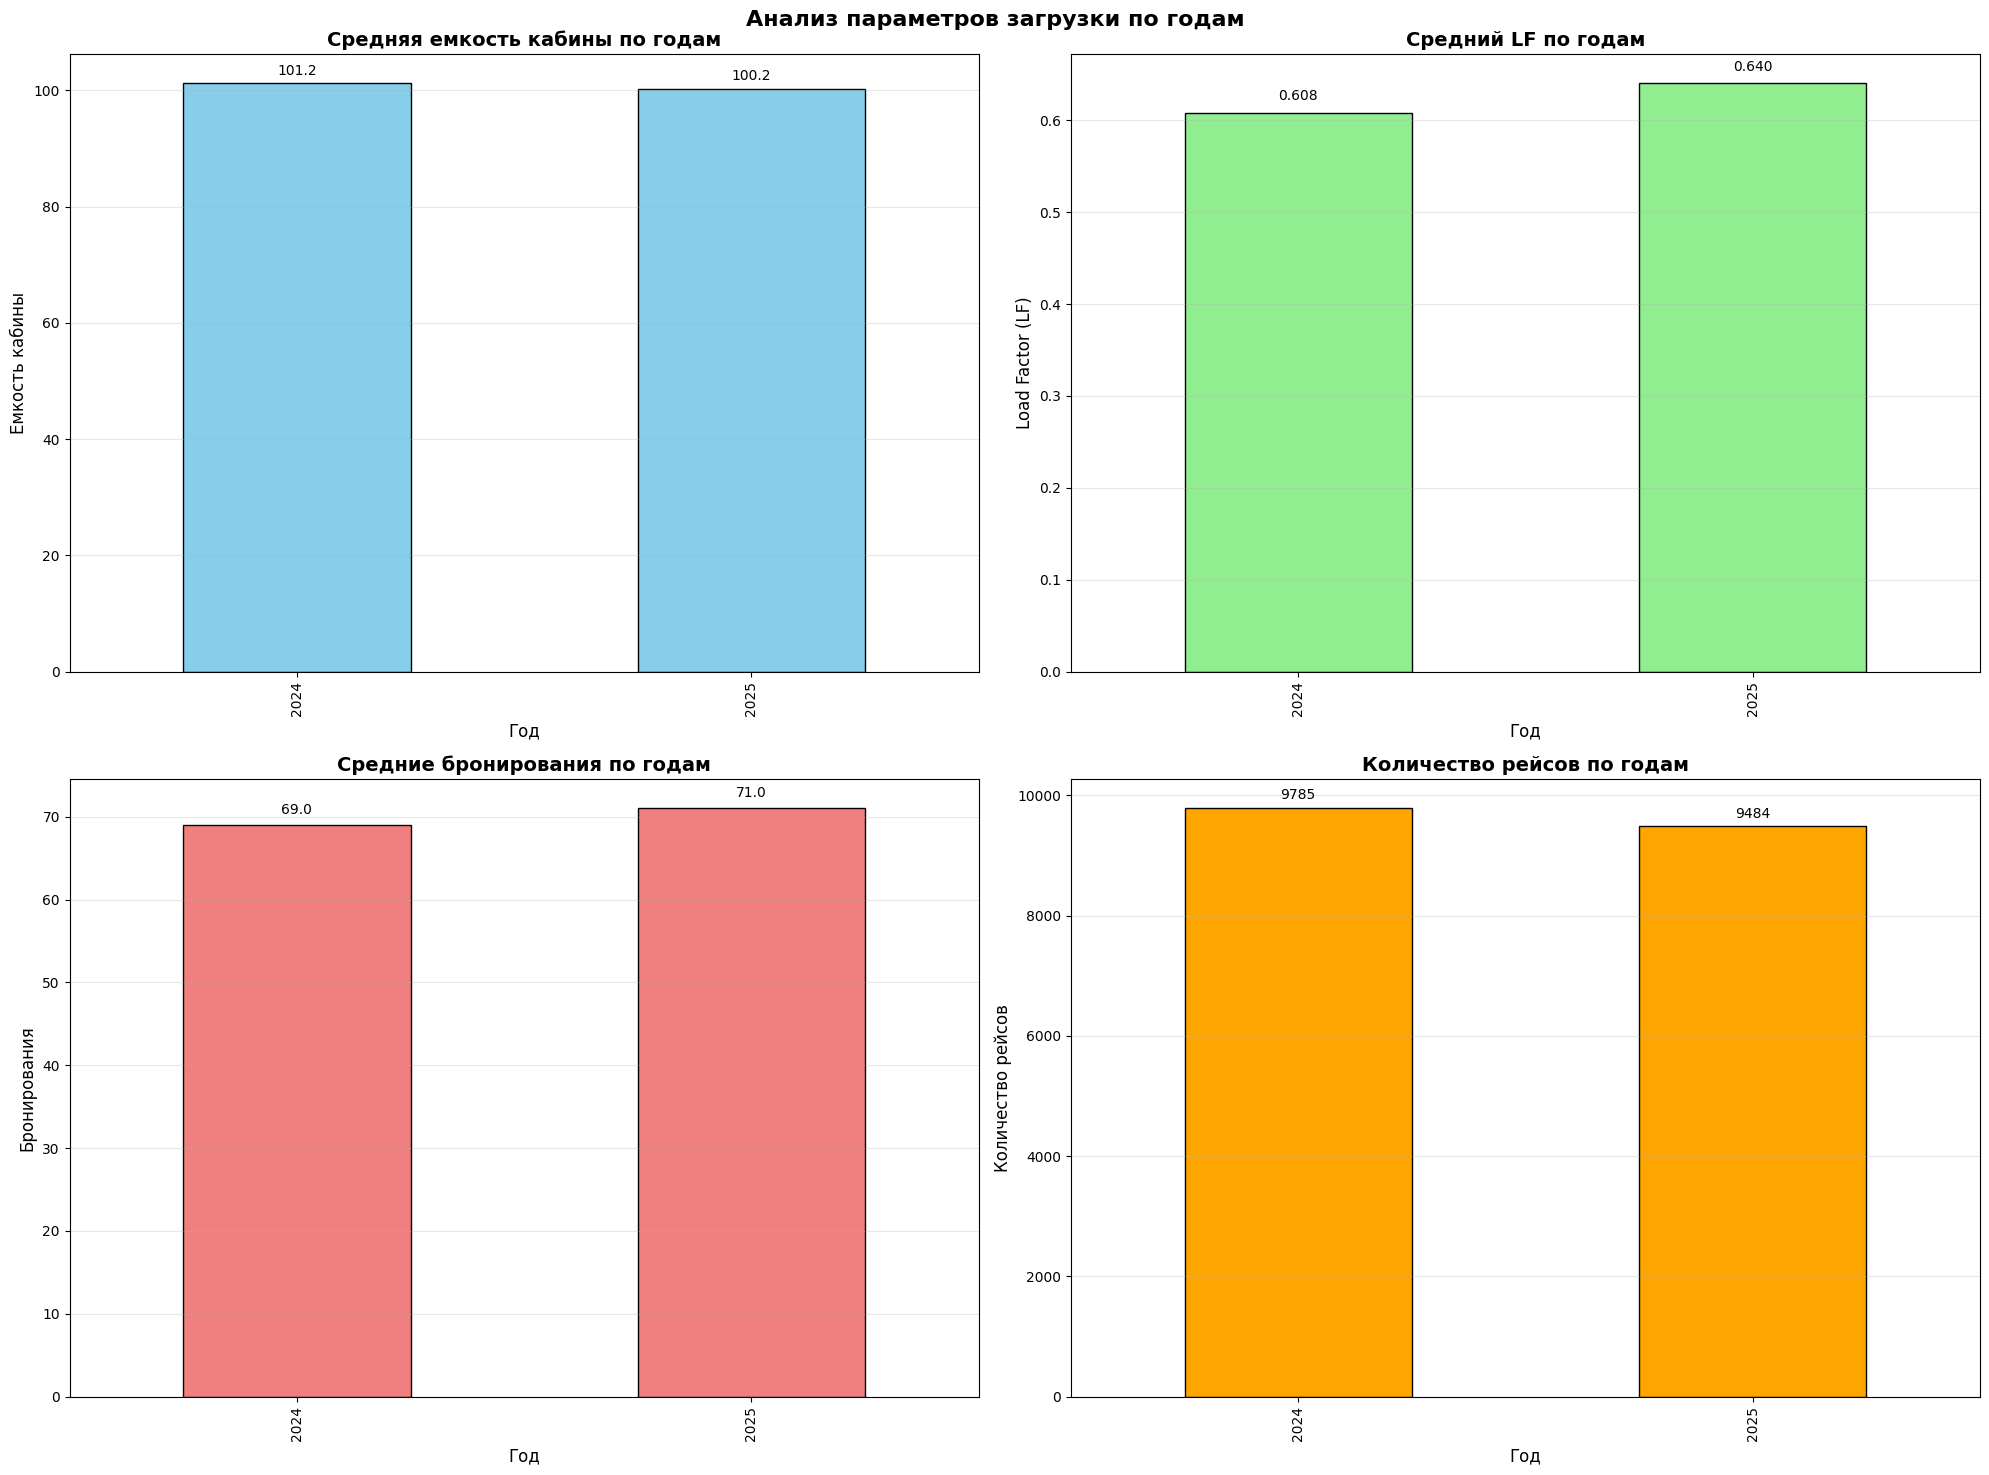

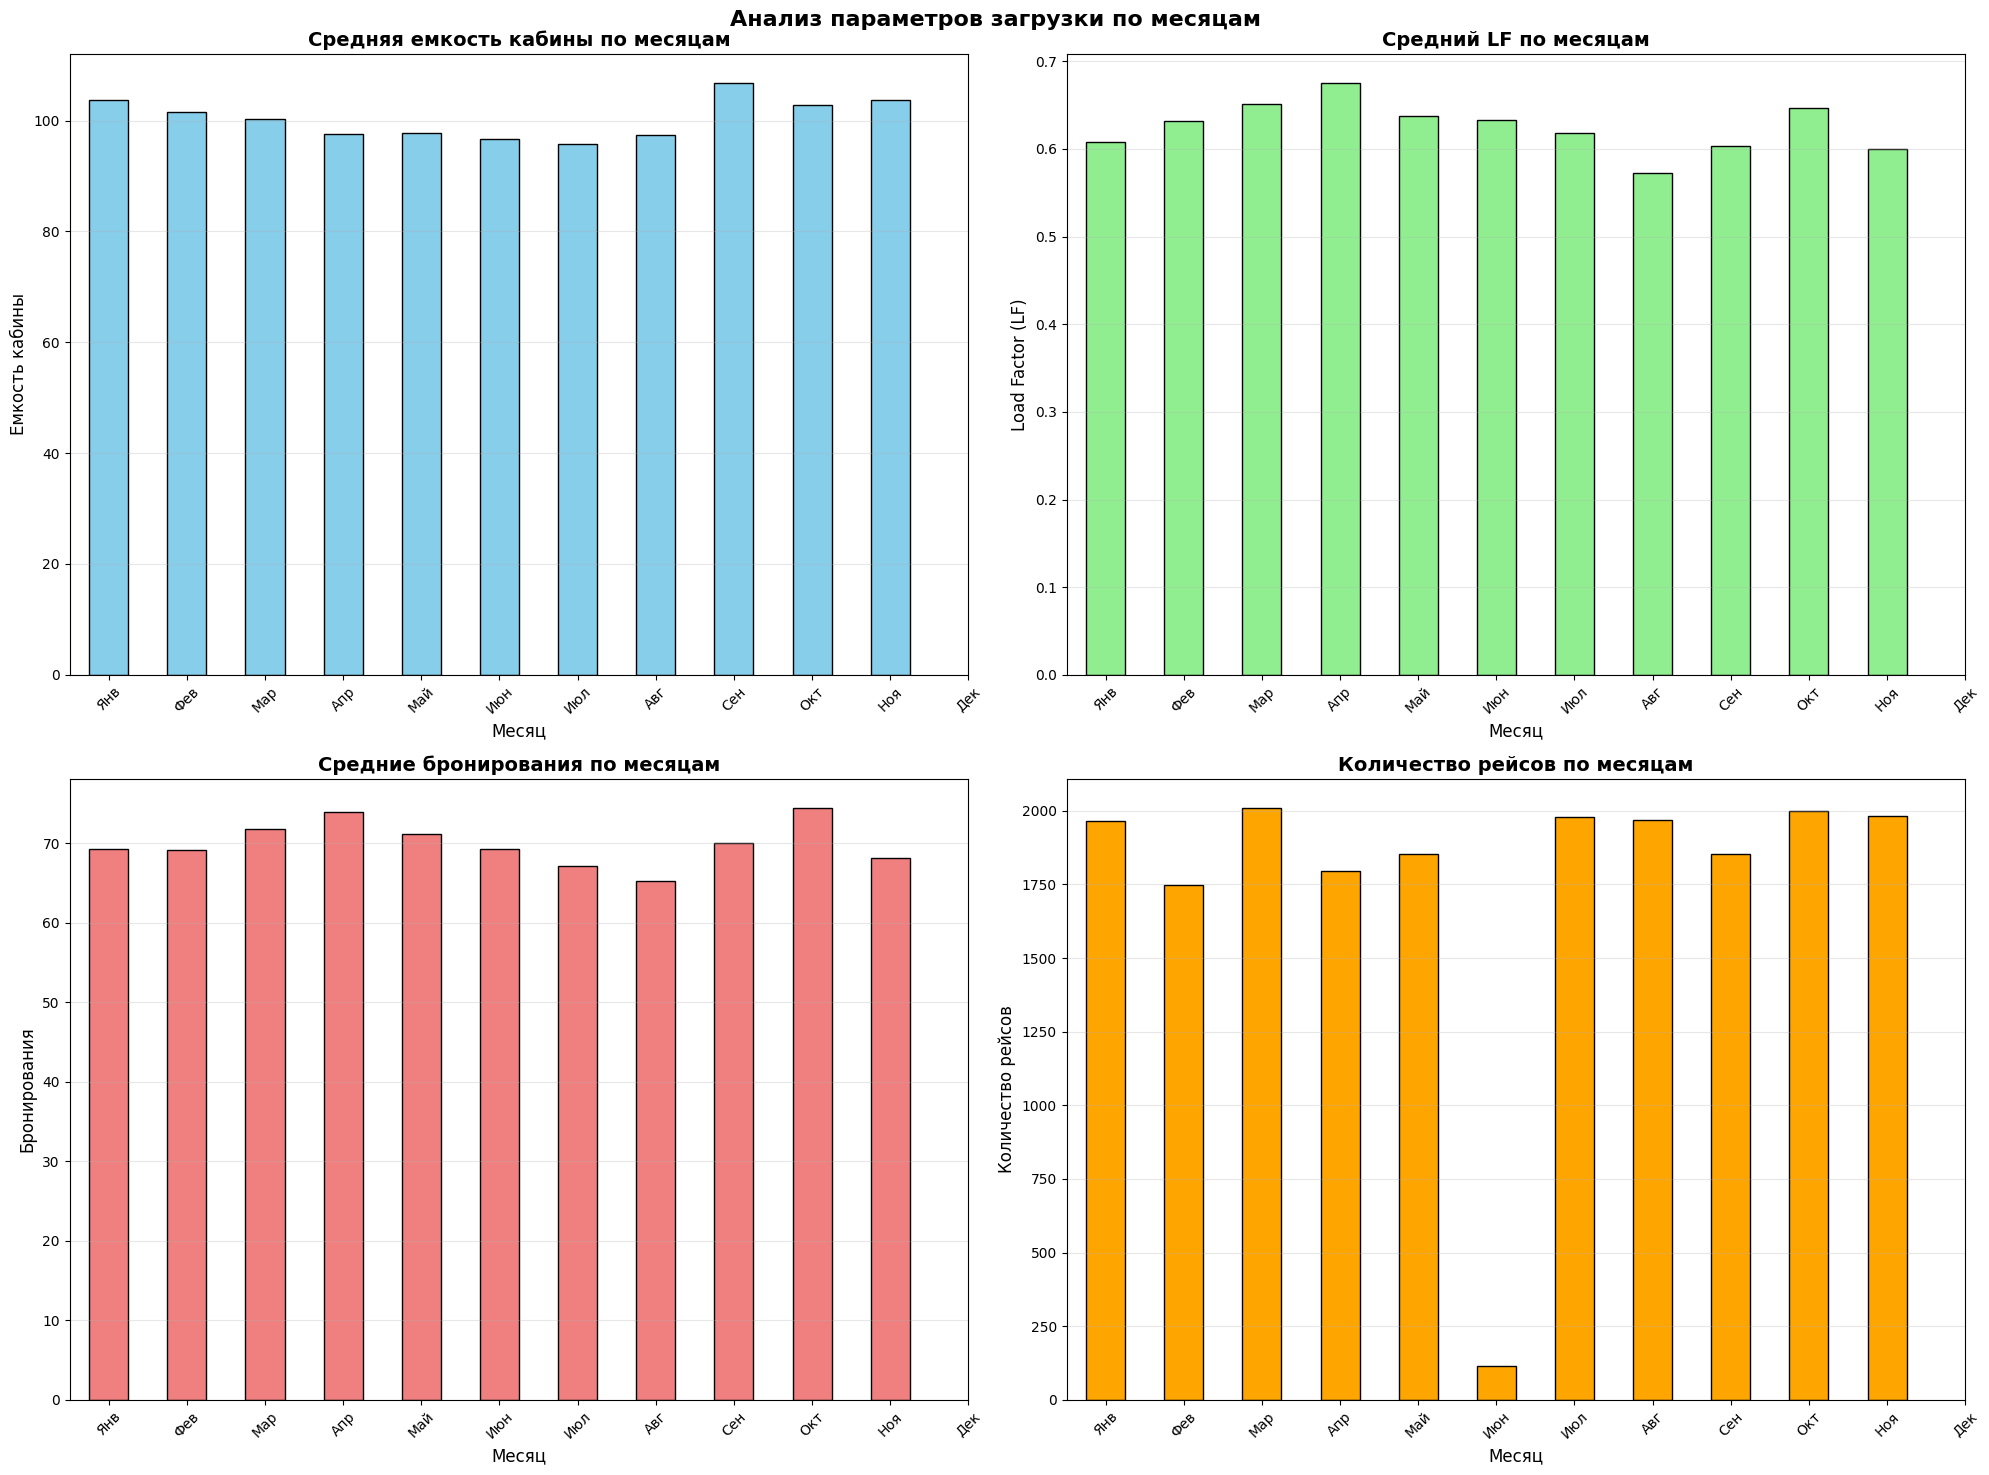

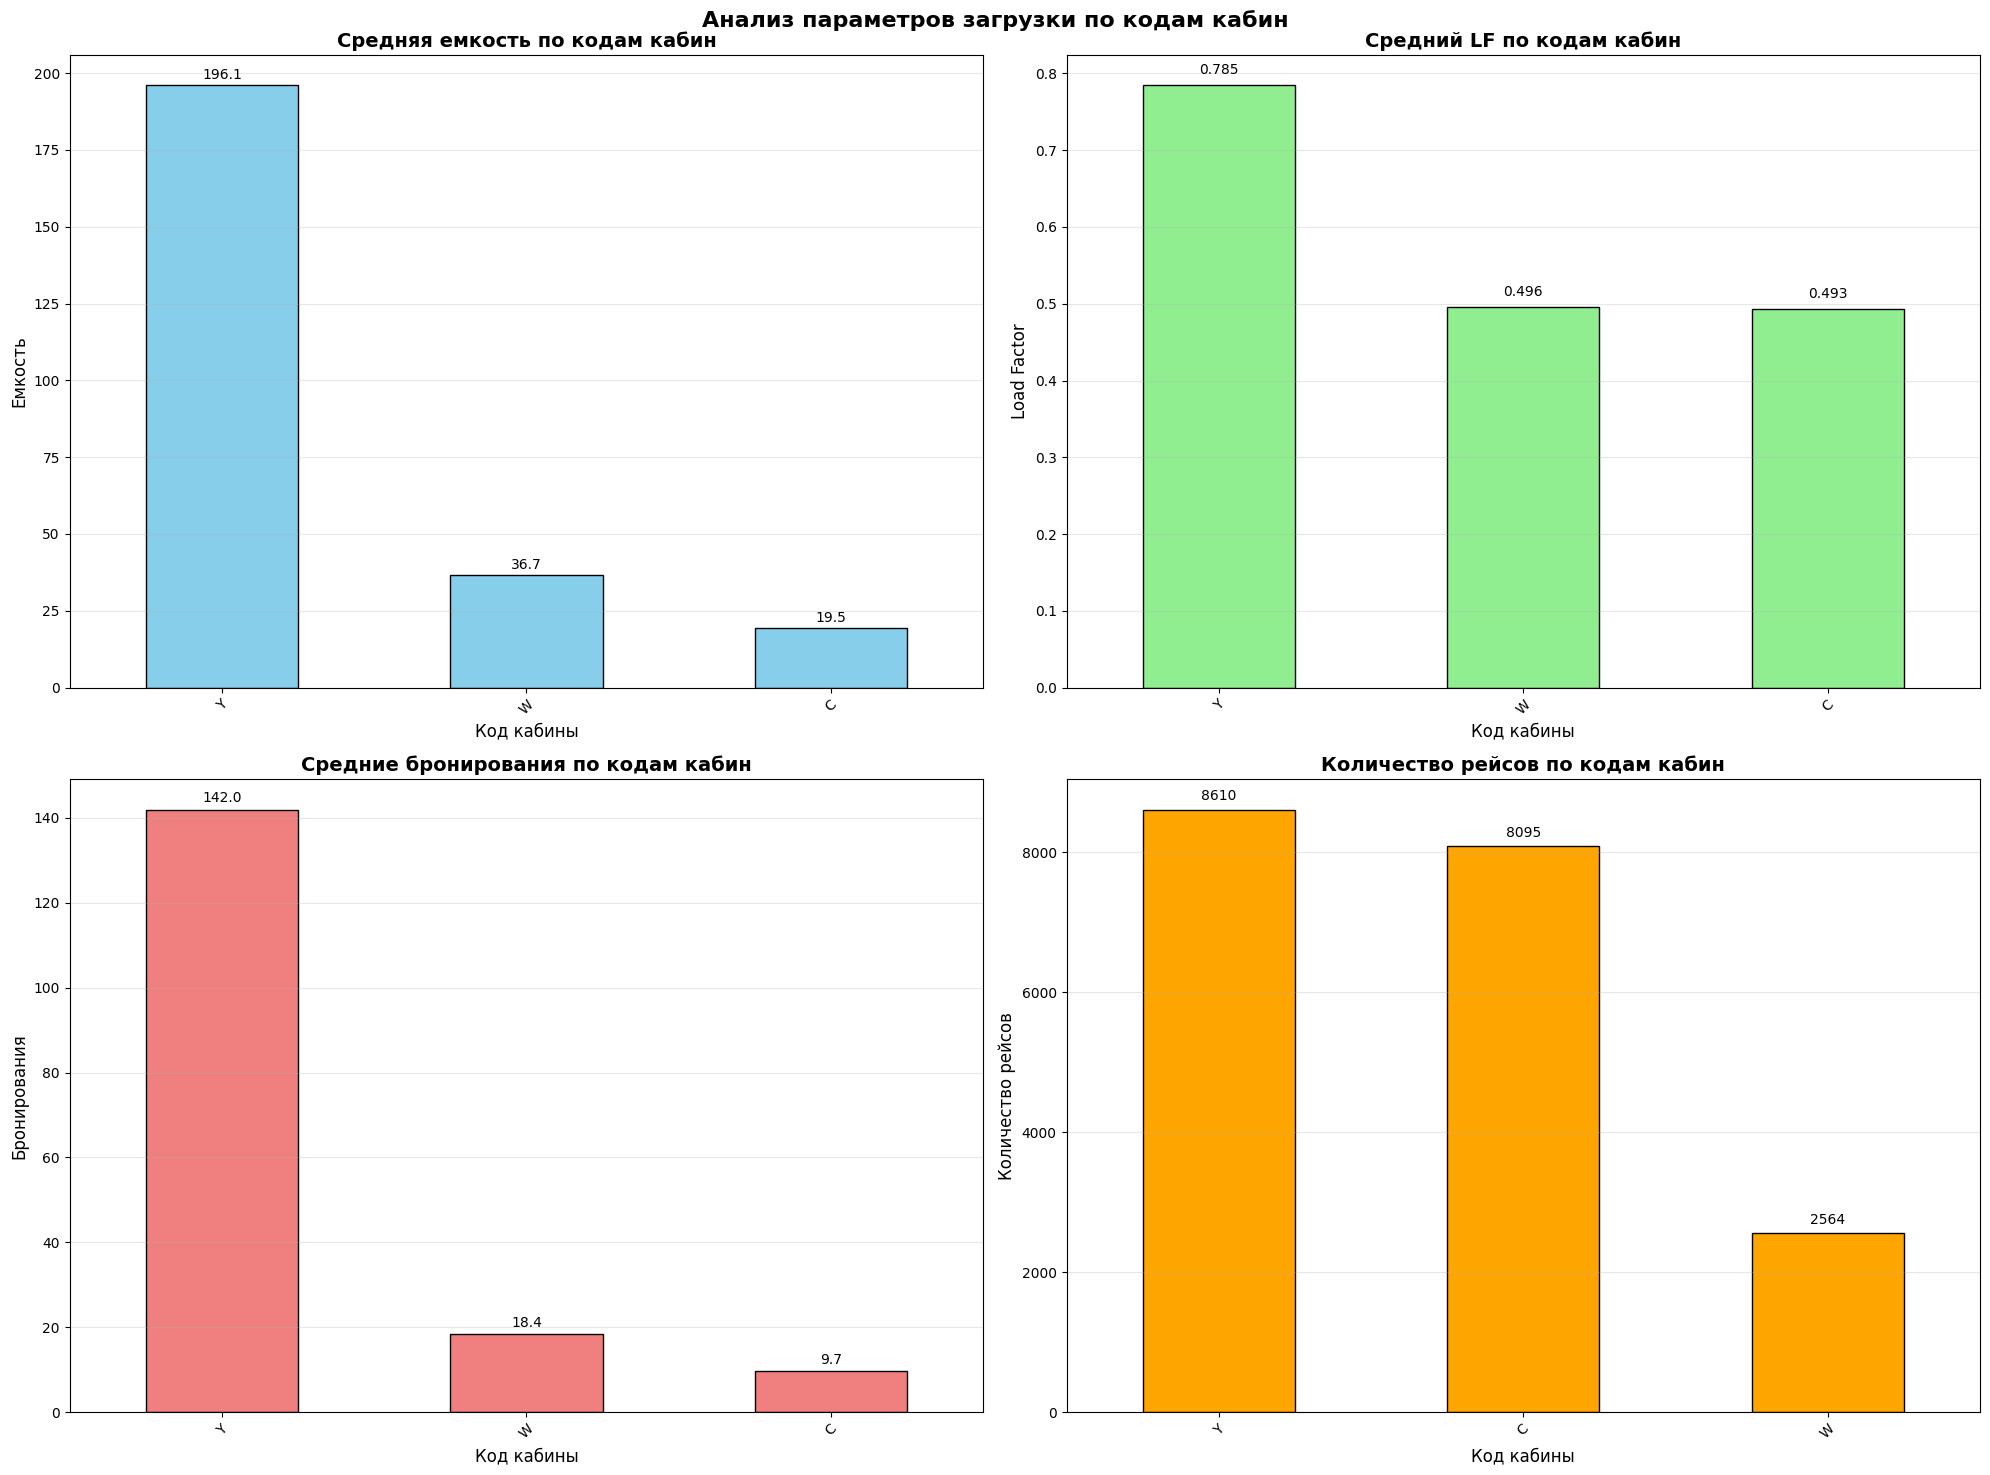

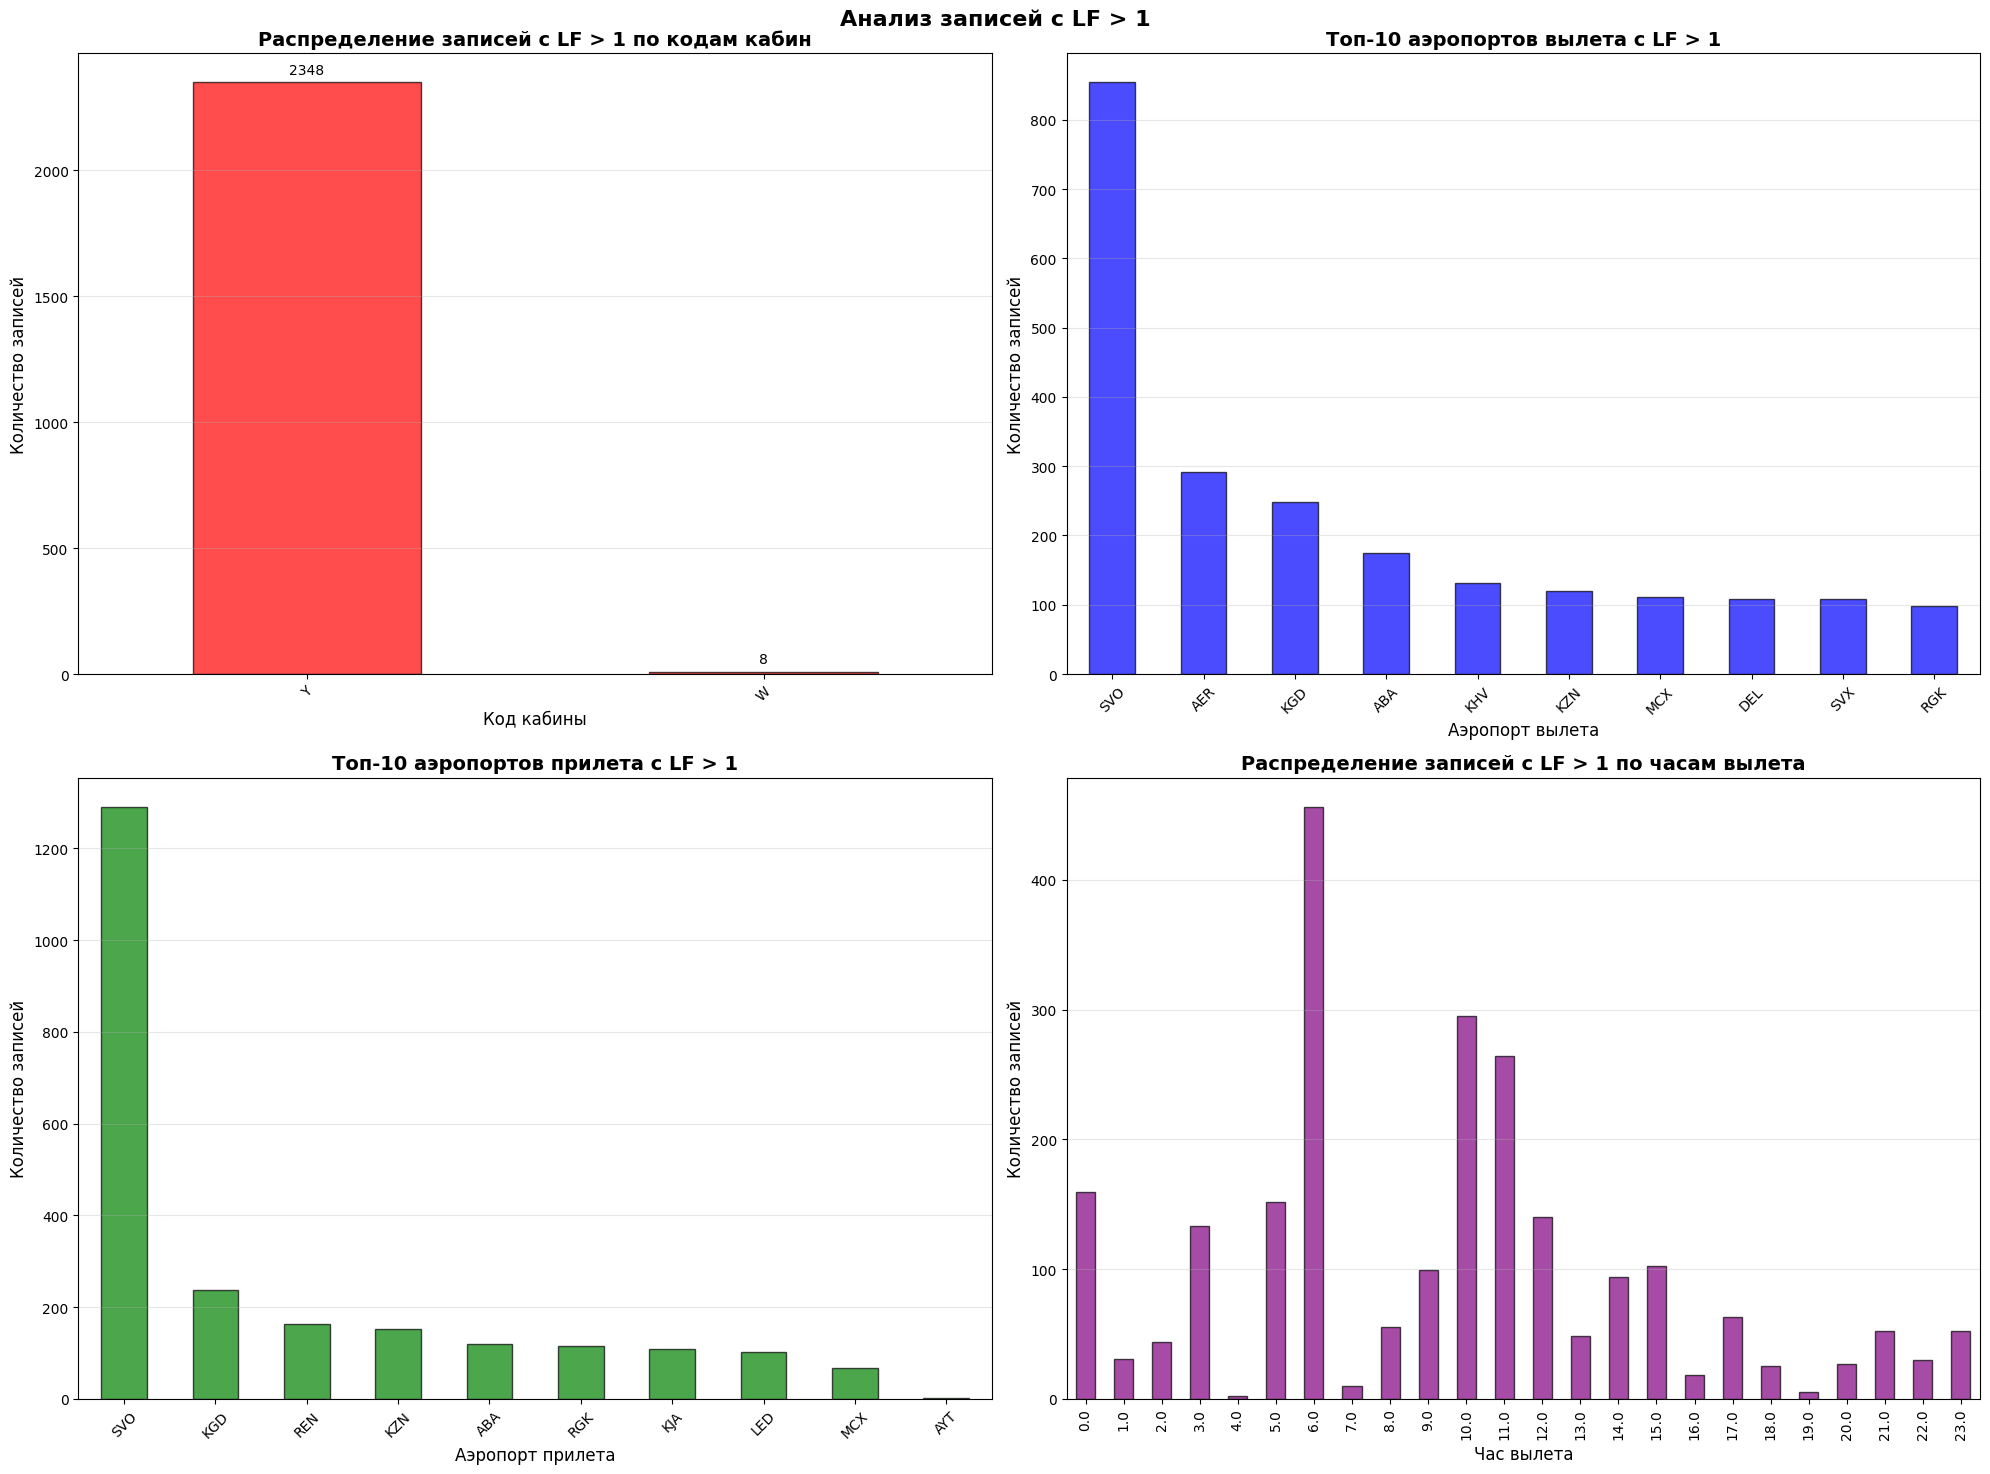


Корреляционный анализ параметров загрузки:
                         Емкость кабины  LF Кабина  Бронирования по кабинам  \
Емкость кабины                    1.000      0.225                    0.815   
LF Кабина                         0.225      1.000                    0.617   
Бронирования по кабинам           0.815      0.617                    1.000   
Час вылета                        0.016     -0.077                   -0.060   

                         Час вылета  
Емкость кабины                0.016  
LF Кабина                    -0.077  
Бронирования по кабинам      -0.060  
Час вылета                    1.000  


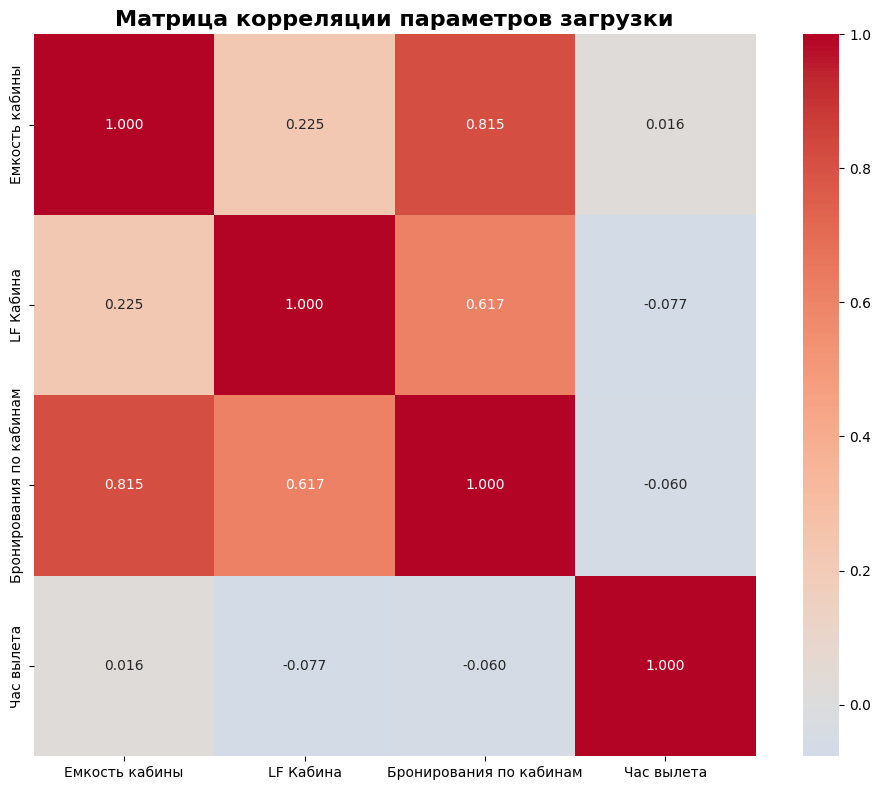


СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА ЗАГРУЗКИ
Результаты анализа сохранены в файлы:
- статистика_загрузки_по_годам.csv
- статистика_загрузки_по_месяцам.csv
- статистика_загрузки_по_времени.csv
- записи_с_LF_больше_1.csv

КЛЮЧЕВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ЗАГРУЗКИ
Средний Load Factor (LF): 0.624
Медианный Load Factor (LF): 0.625
Максимальный Load Factor (LF): 1.958
Количество рейсов с перегрузкой (LF > 1): 2356
Процент рейсов с перегрузкой: 12.23%
Максимальная перегрузка: LF = 1.958 (кабина W)
Лучший месяц по загрузке: Апр (LF = 0.670)
Лучшая кабина по загрузке: Y (LF = 0.785)

Анализ параметров загрузки завершен!


In [ ]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

# Проверим структуру данных
print("Информация о данных:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

# Проверим названия столбцов
print("\nНазвания столбцов:")
print(df.columns.tolist())

# Определим названия столбцов для анализа загрузки
capacity_col = 'Емкость кабины'
lf_col = 'LF Кабина'  # Load Factor
bookings_col = 'Бронирования по кабинам'
cabin_code_col = 'Код кабины'
dep_airport_col = 'Аэропорт вылета'
arr_airport_col = 'Аэропорт прилета'

# Преобразуем дату и время
df['Дата вылета'] = pd.to_datetime(df['Дата вылета'], errors='coerce')
df['Год'] = df['Дата вылета'].dt.year
df['Месяц'] = df['Дата вылета'].dt.month
df['Месяц_год'] = df['Дата вылета'].dt.strftime('%Y-%m')

# Преобразуем время вылета в числовой формат
def time_to_minutes(time_str):
    try:
        if pd.isna(time_str) or time_str == '':
            return np.nan
        parts = str(time_str).split(':')
        if len(parts) == 2:
            hours = int(parts[0])
            minutes = int(parts[1])
            return hours * 60 + minutes
        return np.nan
    except:
        return np.nan

df['Время вылета (минуты)'] = df['Время вылета'].apply(time_to_minutes)
df['Час вылета'] = df['Время вылета'].str.split(':').str[0].astype(float)

# Проверим уникальные значения ключевых параметров
print(f"\nУникальные коды кабин: {df[cabin_code_col].unique()}")
print(f"Уникальные аэропорты вылета: {df[dep_airport_col].nunique()}")
print(f"Уникальные аэропорты прилета: {df[arr_airport_col].nunique()}")

# 1. БАЗОВАЯ СТАТИСТИКА ПАРАМЕТРОВ ЗАГРУЗКИ
print("\n" + "="*60)
print("БАЗОВАЯ СТАТИСТИКА ПАРАМЕТРОВ ЗАГРУЗКИ")
print("="*60)

# Основная статистика
load_stats = df[[capacity_col, lf_col, bookings_col]].describe().round(2)
print("Основная статистика параметров загрузки:")
print(load_stats)

# Проверим наличие значений LF > 1
lf_above_1 = df[df[lf_col] > 1]
print(f"\nКоличество записей с LF > 1: {len(lf_above_1)}")
if len(lf_above_1) > 0:
    print("Статистика для записей с LF > 1:")
    print(lf_above_1[[capacity_col, lf_col, bookings_col]].describe().round(2))

# 2. АНАЛИЗ ПО ГОДАМ
print("\n" + "="*60)
print("АНАЛИЗ ПАРАМЕТРОВ ЗАГРУЗКИ ПО ГОДАМ")
print("="*60)

yearly_stats = df.groupby('Год')[[capacity_col, lf_col, bookings_col]].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

print("Статистика по годам:")
print(yearly_stats)

# 3. АНАЛИЗ ПО МЕСЯЦАМ (ВСЕ ГОДЫ ОБЪЕДИНЕНЫ)
print("\n" + "="*60)
print("АНАЛИЗ ПАРАМЕТРОВ ЗАГРУЗКИ ПО МЕСЯЦАМ")
print("="*60)

monthly_stats = df.groupby('Месяц')[[capacity_col, lf_col, bookings_col]].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

print("Статистика по месяцам (все годы объединены):")
print(monthly_stats)

# 4. АНАЛИЗ ПО ВРЕМЕНИ ВЫЛЕТА
print("\n" + "="*60)
print("АНАЛИЗ ПАРАМЕТРОВ ЗАГРУЗКИ ПО ВРЕМЕНИ ВЫЛЕТА")
print("="*60)

# Группируем по часам вылета
time_stats = df.groupby('Час вылета')[[capacity_col, lf_col, bookings_col]].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("Статистика по часам вылета:")
print(time_stats)

# 5. АНАЛИЗ ПО АЭРОПОРТАМ
print("\n" + "="*60)
print("АНАЛИЗ ПАРАМЕТРОВ ЗАГРУЗКИ ПО АЭРОПОРТАМ")
print("="*60)

# Топ-10 аэропортов вылета по количеству рейсов
top_dep_airports = df[dep_airport_col].value_counts().head(10).index

print("Статистика по топ-10 аэропортам вылета:")
dep_airport_stats = df[df[dep_airport_col].isin(top_dep_airports)].groupby(dep_airport_col)[
    [capacity_col, lf_col, bookings_col]].agg(['mean', 'median', 'count']).round(2)
print(dep_airport_stats)

# Аналогично для аэропортов прилета
top_arr_airports = df[arr_airport_col].value_counts().head(10).index
print("\nСтатистика по топ-10 аэропортам прилета:")
arr_airport_stats = df[df[arr_airport_col].isin(top_arr_airports)].groupby(arr_airport_col)[
    [capacity_col, lf_col, bookings_col]].agg(['mean', 'median', 'count']).round(2)
print(arr_airport_stats)

# 6. АНАЛИЗ ЗАПИСЕЙ С LF > 1
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ЗАПИСЕЙ С LF > 1")
print("="*60)

if len(lf_above_1) > 0:
    print(f"Обнаружено {len(lf_above_1)} записей с LF > 1")

    # Анализ по кодам кабин
    lf_high_by_cabin = lf_above_1.groupby(cabin_code_col).agg({
        lf_col: ['count', 'mean', 'max'],
        capacity_col: 'mean',
        bookings_col: 'mean'
    }).round(2)
    print("\nРаспределение записей с LF > 1 по кодам кабин:")
    print(lf_high_by_cabin)

    # Анализ по аэропортам
    lf_high_by_dep_airport = lf_above_1[dep_airport_col].value_counts().head(10)
    print("\nТоп-10 аэропортов вылета с LF > 1:")
    print(lf_high_by_dep_airport)

    lf_high_by_arr_airport = lf_above_1[arr_airport_col].value_counts().head(10)
    print("\nТоп-10 аэропортов прилета с LF > 1:")
    print(lf_high_by_arr_airport)

    # Анализ по времени
    lf_high_by_hour = lf_above_1.groupby('Час вылета').size()
    print("\nРаспределение записей с LF > 1 по часам вылета:")
    print(lf_high_by_hour)
else:
    print("Записей с LF > 1 не обнаружено")

# 7. ВИЗУАЛИЗАЦИЯ АНАЛИЗА ЗАГРУЗКИ
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ АНАЛИЗА ПАРАМЕТРОВ ЗАГРУЗКИ")
print("="*60)

# 7.1 Визуализация по годам
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ параметров загрузки по годам', fontsize=16, fontweight='bold')

# Емкость кабины по годам
plt.subplot(2, 2, 1)
capacity_by_year = df.groupby('Год')[capacity_col].mean()
capacity_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя емкость кабины по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Емкость кабины', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(capacity_by_year):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

# LF по годам
plt.subplot(2, 2, 2)
lf_by_year = df.groupby('Год')[lf_col].mean()
lf_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Средний LF по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Load Factor (LF)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(lf_by_year):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Бронирования по годам
plt.subplot(2, 2, 3)
bookings_by_year = df.groupby('Год')[bookings_col].mean()
bookings_by_year.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Средние бронирования по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Бронирования', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(bookings_by_year):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

# Количество рейсов по годам
plt.subplot(2, 2, 4)
flights_by_year = df.groupby('Год').size()
flights_by_year.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Количество рейсов по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(flights_by_year):
    plt.text(i, v + max(flights_by_year)*0.01, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 7.2 Визуализация по месяцам
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ параметров загрузки по месяцам', fontsize=16, fontweight='bold')

month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

# Емкость кабины по месяцам
plt.subplot(2, 2, 1)
capacity_by_month = df.groupby('Месяц')[capacity_col].mean()
capacity_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя емкость кабины по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Емкость кабины', fontsize=12)
plt.xticks(range(12), month_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

# LF по месяцам
plt.subplot(2, 2, 2)
lf_by_month = df.groupby('Месяц')[lf_col].mean()
lf_by_month.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Средний LF по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Load Factor (LF)', fontsize=12)
plt.xticks(range(12), month_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

# Бронирования по месяцам
plt.subplot(2, 2, 3)
bookings_by_month = df.groupby('Месяц')[bookings_col].mean()
bookings_by_month.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Средние бронирования по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Бронирования', fontsize=12)
plt.xticks(range(12), month_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

# Количество рейсов по месяцам
plt.subplot(2, 2, 4)
flights_by_month = df.groupby('Месяц').size()
flights_by_month.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Количество рейсов по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xticks(range(12), month_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 7.3 Визуализация по кодам кабин
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ параметров загрузки по кодам кабин', fontsize=16, fontweight='bold')

# Емкость по кодам кабин
plt.subplot(2, 2, 1)
capacity_by_cabin = df.groupby(cabin_code_col)[capacity_col].mean().sort_values(ascending=False)
capacity_by_cabin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя емкость по кодам кабин', fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Емкость', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(capacity_by_cabin):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

# LF по кодам кабин
plt.subplot(2, 2, 2)
lf_by_cabin = df.groupby(cabin_code_col)[lf_col].mean().sort_values(ascending=False)
lf_by_cabin.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Средний LF по кодам кабин', fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Load Factor', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(lf_by_cabin):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Бронирования по кодам кабин
plt.subplot(2, 2, 3)
bookings_by_cabin = df.groupby(cabin_code_col)[bookings_col].mean().sort_values(ascending=False)
bookings_by_cabin.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Средние бронирования по кодам кабин', fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Бронирования', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(bookings_by_cabin):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

# Количество рейсов по кодам кабин
plt.subplot(2, 2, 4)
flights_by_cabin = df.groupby(cabin_code_col).size().sort_values(ascending=False)
flights_by_cabin.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Количество рейсов по кодам кабин', fontsize=14, fontweight='bold')
plt.xlabel('Код кабины', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(flights_by_cabin):
    plt.text(i, v + max(flights_by_cabin)*0.01, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 7.4 Визуализация записей с LF > 1
if len(lf_above_1) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Анализ записей с LF > 1', fontsize=16, fontweight='bold')

    # Распределение по кодам кабин
    plt.subplot(2, 2, 1)
    lf_high_cabin_dist = lf_above_1[cabin_code_col].value_counts()
    lf_high_cabin_dist.plot(kind='bar', color='red', edgecolor='black', alpha=0.7)
    plt.title('Распределение записей с LF > 1 по кодам кабин', fontsize=14, fontweight='bold')
    plt.xlabel('Код кабины', fontsize=12)
    plt.ylabel('Количество записей', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(lf_high_cabin_dist):
        plt.text(i, v + max(lf_high_cabin_dist)*0.01, f'{v:.0f}',
                 ha='center', va='bottom', fontsize=10)

    # Топ аэропорты вылета с LF > 1
    plt.subplot(2, 2, 2)
    lf_high_dep_airports = lf_above_1[dep_airport_col].value_counts().head(10)
    lf_high_dep_airports.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)
    plt.title('Топ-10 аэропортов вылета с LF > 1', fontsize=14, fontweight='bold')
    plt.xlabel('Аэропорт вылета', fontsize=12)
    plt.ylabel('Количество записей', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Топ аэропорты прилета с LF > 1
    plt.subplot(2, 2, 3)
    lf_high_arr_airports = lf_above_1[arr_airport_col].value_counts().head(10)
    lf_high_arr_airports.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
    plt.title('Топ-10 аэропортов прилета с LF > 1', fontsize=14, fontweight='bold')
    plt.xlabel('Аэропорт прилета', fontsize=12)
    plt.ylabel('Количество записей', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Распределение по часам вылета
    plt.subplot(2, 2, 4)
    lf_high_by_hour = lf_above_1['Час вылета'].value_counts().sort_index()
    lf_high_by_hour.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
    plt.title('Распределение записей с LF > 1 по часам вылета', fontsize=14, fontweight='bold')
    plt.xlabel('Час вылета', fontsize=12)
    plt.ylabel('Количество записей', fontsize=12)
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# 7.5 Корреляционный анализ
print("\nКорреляционный анализ параметров загрузки:")
correlation_matrix = df[[capacity_col, lf_col, bookings_col, 'Час вылета']].corr().round(3)
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Матрица корреляции параметров загрузки', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n" + "="*60)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА ЗАГРУЗКИ")
print("="*60)

# Сохраняем все таблицы с статистикой
yearly_stats.to_csv('статистика_загрузки_по_годам.csv', encoding='utf-8-sig')
monthly_stats.to_csv('статистика_загрузки_по_месяцам.csv', encoding='utf-8-sig')
time_stats.to_csv('статистика_загрузки_по_времени.csv', encoding='utf-8-sig')

if len(lf_above_1) > 0:
    lf_above_1.to_csv('записи_с_LF_больше_1.csv', encoding='utf-8-sig', index=False)

print("Результаты анализа сохранены в файлы:")
print("- статистика_загрузки_по_годам.csv")
print("- статистика_загрузки_по_месяцам.csv")
print("- статистика_загрузки_по_времени.csv")
if len(lf_above_1) > 0:
    print("- записи_с_LF_больше_1.csv")

# 9. КЛЮЧЕВЫЕ ВЫВОДЫ
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ЗАГРУЗКИ")
print("="*60)

print(f"Средний Load Factor (LF): {df[lf_col].mean():.3f}")
print(f"Медианный Load Factor (LF): {df[lf_col].median():.3f}")
print(f"Максимальный Load Factor (LF): {df[lf_col].max():.3f}")

if len(lf_above_1) > 0:
    print(f"Количество рейсов с перегрузкой (LF > 1): {len(lf_above_1)}")
    print(f"Процент рейсов с перегрузкой: {len(lf_above_1)/len(df)*100:.2f}%")

    # Анализ перегруженных рейсов
    worst_lf = lf_above_1[lf_col].max()
    worst_cabin = lf_above_1.loc[lf_above_1[lf_col].idxmax(), cabin_code_col]
    print(f"Максимальная перегрузка: LF = {worst_lf:.3f} (кабина {worst_cabin})")

best_lf_month = monthly_stats[lf_col]['mean'].idxmax()
best_lf_value = monthly_stats[lf_col]['mean'].max()
print(f"Лучший месяц по загрузке: {month_names[best_lf_month-1]} (LF = {best_lf_value:.3f})")

best_lf_cabin = lf_by_cabin.idxmax()
best_lf_cabin_value = lf_by_cabin.max()
print(f"Лучшая кабина по загрузке: {best_lf_cabin} (LF = {best_lf_cabin_value:.3f})")

print("\nАнализ параметров загрузки завершен!")

In [ ]:
df.to_csv('еданейронке.csv', encoding='utf-8-sig')

In [ ]:
# Находим записи с кодом кабины W и LF > 1
w_high_lf = df[(df['Код кабины'] == 'W') & (df['LF Кабина'] > 1)]

# Получаем номера рейсов и даты вылета для этих записей
relevant_flights = w_high_lf[['Номер рейса', 'Дата вылета']].drop_duplicates()

# Находим все записи для этих рейсов (включая коды C и Y)
result_df = df.merge(relevant_flights, on=['Номер рейса', 'Дата вылета'], how='inner')

print(f"Найдено {len(w_high_lf)} записей с кодом W и LF > 1")
print(f"Соответствующих рейсов: {len(relevant_flights)}")
print(f"Всего смежных записей: {len(result_df)}")
print("\nПервые 10 записей результата:")
print(result_df[['Дата вылета', 'Номер рейса', 'Код кабины', 'LF Кабина', 'Пассажиры', 'Емкость кабины']].head(10))
result_df.to_csv('перегрузы_по_W.csv', encoding='utf-8-sig')

Найдено 8 записей с кодом W и LF > 1
Соответствующих рейсов: 8
Всего смежных записей: 24

Первые 10 записей результата:
  Дата вылета  Номер рейса Код кабины  LF Кабина  Пассажиры  Емкость кабины
0  2025-03-15         1713          C     0.8929         25              28
1  2025-03-15         1713          W     1.1667         28              24
2  2025-03-15         1713          Y     0.9973        378             375
3  2025-03-24          321          C     0.8929         26              28
4  2025-03-24          321          W     1.2500         30              24
5  2025-03-24          321          Y     0.6587        250             375
6  2025-04-24         2142          C     0.8571         24              28
7  2025-04-24         2142          W     1.1667         28              24
8  2025-04-24         2142          Y     0.4987        187             375
9  2025-01-26          321          C     0.4643         13              28


In [ ]:
# Расчет дохода с одного пассажира
df['Доход на пассажира'] = df['Доход пасс'] / df['Пассажиры']

# Анализ по коду кабины
cabin_revenue = df.groupby('Код кабины')['Доход на пассажира'].agg(['mean', 'median', 'std', 'count']).round(2)

# Анализ по времени вылета (часы)
time_revenue = df.groupby('Час вылета')['Доход на пассажира'].agg(['mean', 'median', 'count']).round(2)

# Анализ по номеру рейса (топ-10 по среднему доходу)
flight_revenue = df.groupby('Номер рейса')['Доход на пассажира'].agg(['mean', 'median', 'count']).round(2)
top_flights = flight_revenue.nlargest(10, 'mean')

print("=== АНАЛИЗ ДОХОДА С ОДНОГО ПАССАЖИРА ===\n")
print("1. По коду кабины:")
print(cabin_revenue)
print("\n2. По времени вылета (часы):")
print(time_revenue)
print("\n3. Топ-10 рейсов по среднему доходу на пассажира:")
print(top_flights)

=== АНАЛИЗ ДОХОДА С ОДНОГО ПАССАЖИРА ===

1. По коду кабины:
              mean  median     std  count
Код кабины                               
C           481.23  355.30  424.84   8095
W           336.24  320.63  202.09   2564
Y           126.04   98.54   89.35   8610

2. По времени вылета (часы):
              mean  median  count
Час вылета                       
0.0         260.70  151.34    775
1.0         284.22  186.11    182
2.0         181.13  137.90    277
3.0         165.80   92.20    419
4.0         443.36  357.59    362
5.0         348.00  259.19   1007
6.0         156.53  101.67   1508
7.0         363.11  258.14    320
8.0         207.97  165.73    733
9.0         222.63  149.00    571
10.0        242.94  186.74   1740
11.0        447.74  273.54   3885
12.0        419.36  273.17   1282
13.0        151.29  104.39    611
14.0        295.40  214.14   1054
15.0        265.08  232.96   1114
16.0        418.83  317.29   1209
17.0        239.37  170.76    565
18.0        231.72 

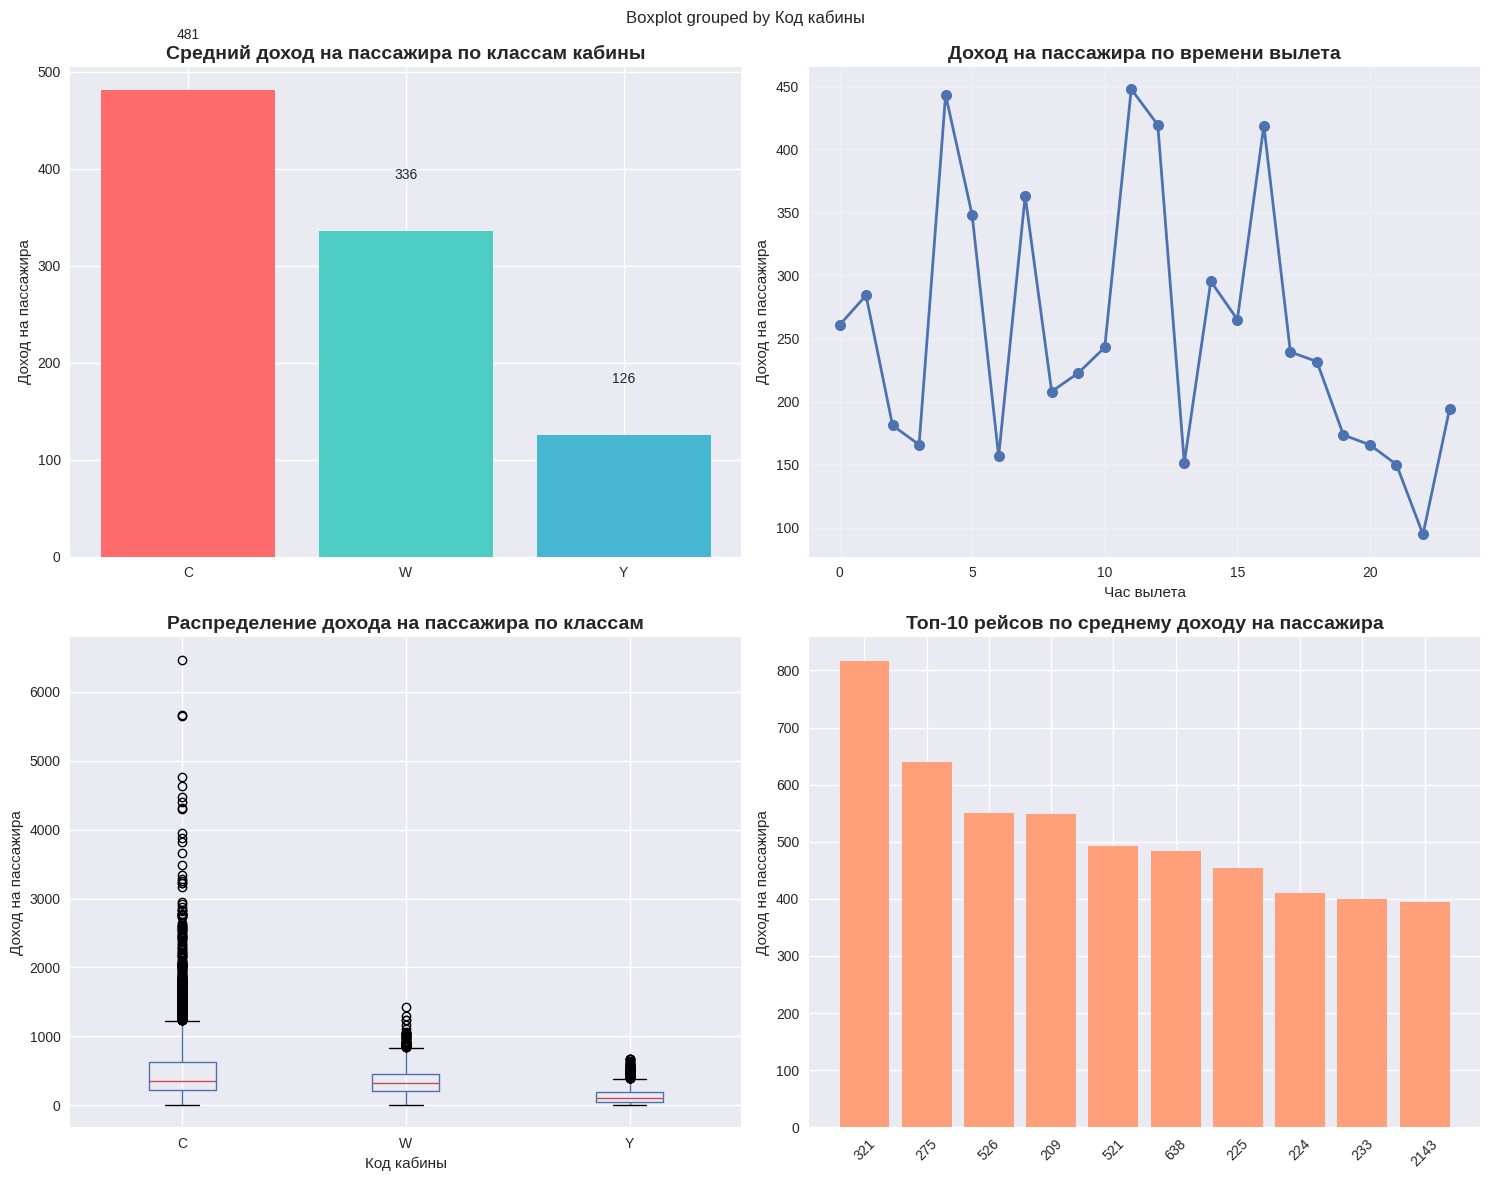

In [ ]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Доход по классам кабины
cabin_data = df.groupby('Код кабины')['Доход на пассажира'].mean().sort_values(ascending=False)
axes[0, 0].bar(cabin_data.index, cabin_data.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 0].set_title('Средний доход на пассажира по классам кабины', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Доход на пассажира')
for i, v in enumerate(cabin_data.values):
    axes[0, 0].text(i, v + 50, f'{v:.0f}', ha='center', va='bottom')

# 2. Доход по времени вылета
time_data = df.groupby('Час вылета')['Доход на пассажира'].mean()
axes[0, 1].plot(time_data.index, time_data.values, marker='o', linewidth=2, markersize=8)
axes[0, 1].set_title('Доход на пассажира по времени вылета', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Час вылета')
axes[0, 1].set_ylabel('Доход на пассажира')
axes[0, 1].grid(True, alpha=0.3)

# 3. Распределение дохода по классам
df.boxplot(column='Доход на пассажира', by='Код кабины', ax=axes[1, 0])
axes[1, 0].set_title('Распределение дохода на пассажира по классам', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Доход на пассажира')

# 4. Топ-10 рейсов по доходу
top_flights = df.groupby('Номер рейса')['Доход на пассажира'].mean().nlargest(10)
axes[1, 1].bar(range(len(top_flights)), top_flights.values, color='#FFA07A')
axes[1, 1].set_title('Топ-10 рейсов по среднему доходу на пассажира', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Доход на пассажира')
axes[1, 1].set_xticks(range(len(top_flights)))
axes[1, 1].set_xticklabels(top_flights.index, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#разделить на рейсовость
#посмотреть с какими признаками есть корреляция

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19269 entries, 0 to 19268
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Дата вылета              19269 non-null  object 
 1   Номер рейса              19269 non-null  int64  
 2   Аэропорт вылета          19269 non-null  object 
 3   Аэропорт прилета         19269 non-null  object 
 4   Время вылета             19269 non-null  object 
 5   Время прилета            19269 non-null  object 
 6   Емкость кабины           19269 non-null  int64  
 7   LF Кабина                19269 non-null  float64
 8   Бронирования по кабинам  19269 non-null  int64  
 9   Тип ВС                   19269 non-null  object 
 10  Код кабины               19269 non-null  object 
 11  Доход пасс               19269 non-null  float64
 12  Пассажиры                19269 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.9+

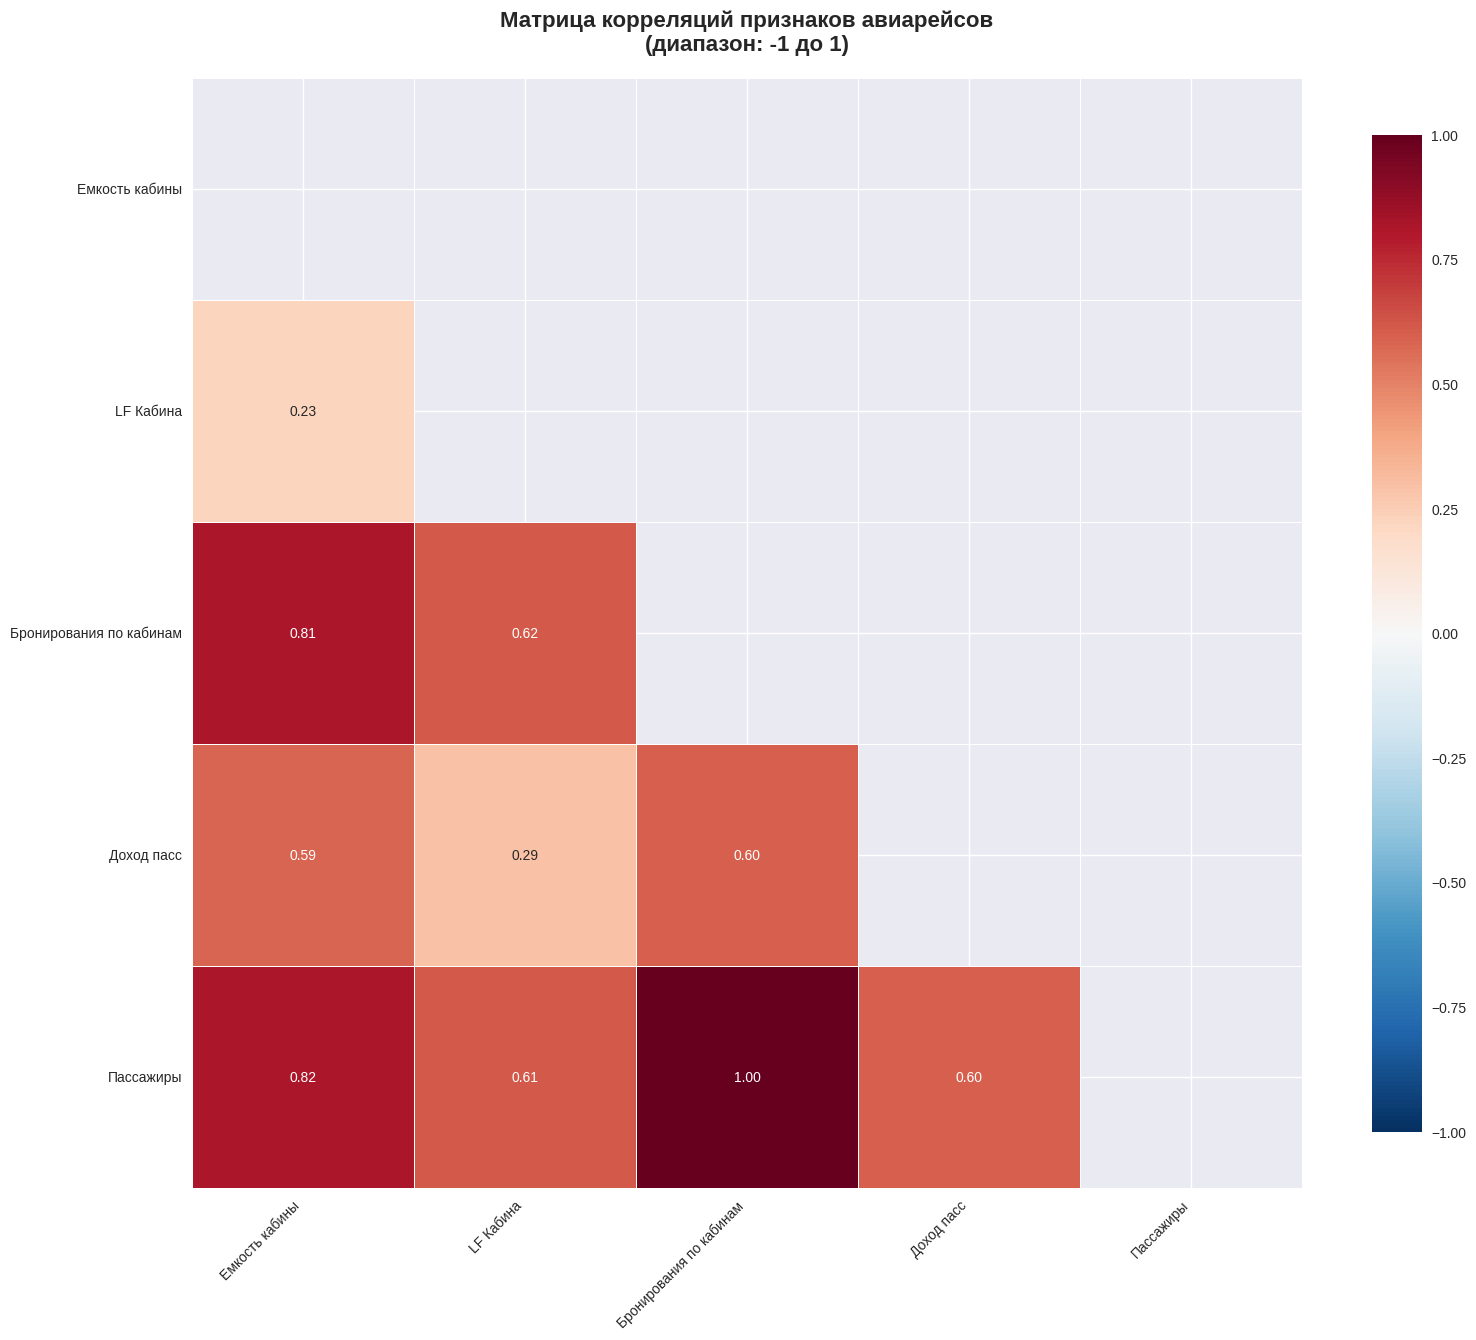


Топ-10 самых сильных положительных корреляций:
Пассажиры                Емкость кабины             0.816117
Емкость кабины           Пассажиры                  0.816117
Бронирования по кабинам  Емкость кабины             0.814605
Емкость кабины           Бронирования по кабинам    0.814605
LF Кабина                Бронирования по кабинам    0.616750
Бронирования по кабинам  LF Кабина                  0.616750
Пассажиры                LF Кабина                  0.614640
LF Кабина                Пассажиры                  0.614640
Пассажиры                Доход пасс                 0.599863
Доход пасс               Пассажиры                  0.599863
dtype: float64

Топ-10 самых сильных отрицательных корреляций:
Емкость кабины           LF Кабина                  0.225058
LF Кабина                Емкость кабины             0.225058
                         Доход пасс                 0.291851
Доход пасс               LF Кабина                  0.291851
                         Емкость ка

In [ ]:
df1 = pd.read_csv("hackathon_data_main.csv", delimiter=';', decimal=',')
temp = df
df = df1
# Просмотр информации о данных
print("Информация о датасете:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

# Исключаем столбцы с датами и текстовыми данными
# Оставляем только числовые признаки для корреляционного анализа
exclude_columns = ['Дата вылета', 'Номер рейса', 'Аэропорт вылета', 'Аэропорт прилета',
                  'Время вылета', 'Время прилета', 'Тип ВС', 'Код кабины',
                  'Месяц_год', 'Год_месяц_строка']

# Создаем новый DataFrame только с числовыми признаками
numeric_columns = [col for col in df.columns if col not in exclude_columns and df[col].dtype in ['int64', 'float64']]

# Если есть нечисловые столбцы, которые не попали в exclude_columns, исключаем их
numeric_df = df[numeric_columns].select_dtypes(include=[np.number])

print(f"\nЧисловые признаки для анализа ({len(numeric_df.columns)}):")
print(numeric_df.columns.tolist())

# Вычисляем матрицу корреляций
correlation_matrix = numeric_df.corr()

# Настраиваем визуализацию
plt.figure(figsize=(16, 14))
plt.rcParams['font.size'] = 10

# Создаем heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника

heatmap = sns.heatmap(correlation_matrix,
                      mask=mask,
                      annot=True,
                      fmt='.2f',
                      cmap='RdBu_r',
                      center=0,
                      vmin=-1,
                      vmax=1,
                      square=True,
                      linewidths=0.5,
                      cbar_kws={'shrink': 0.8})

plt.title('Матрица корреляций признаков авиарейсов\n(диапазон: -1 до 1)',
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Сохраняем и показываем график
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Дополнительная информация о самых сильных корреляциях
print("\nТоп-10 самых сильных положительных корреляций:")
strong_positive = correlation_matrix.unstack().sort_values(ascending=False)
strong_positive = strong_positive[strong_positive < 0.999]  # Исключаем корреляцию с самим собой
print(strong_positive.head(10))

print("\nТоп-10 самых сильных отрицательных корреляций:")
strong_negative = correlation_matrix.unstack().sort_values(ascending=True)
print(strong_negative.head(10))

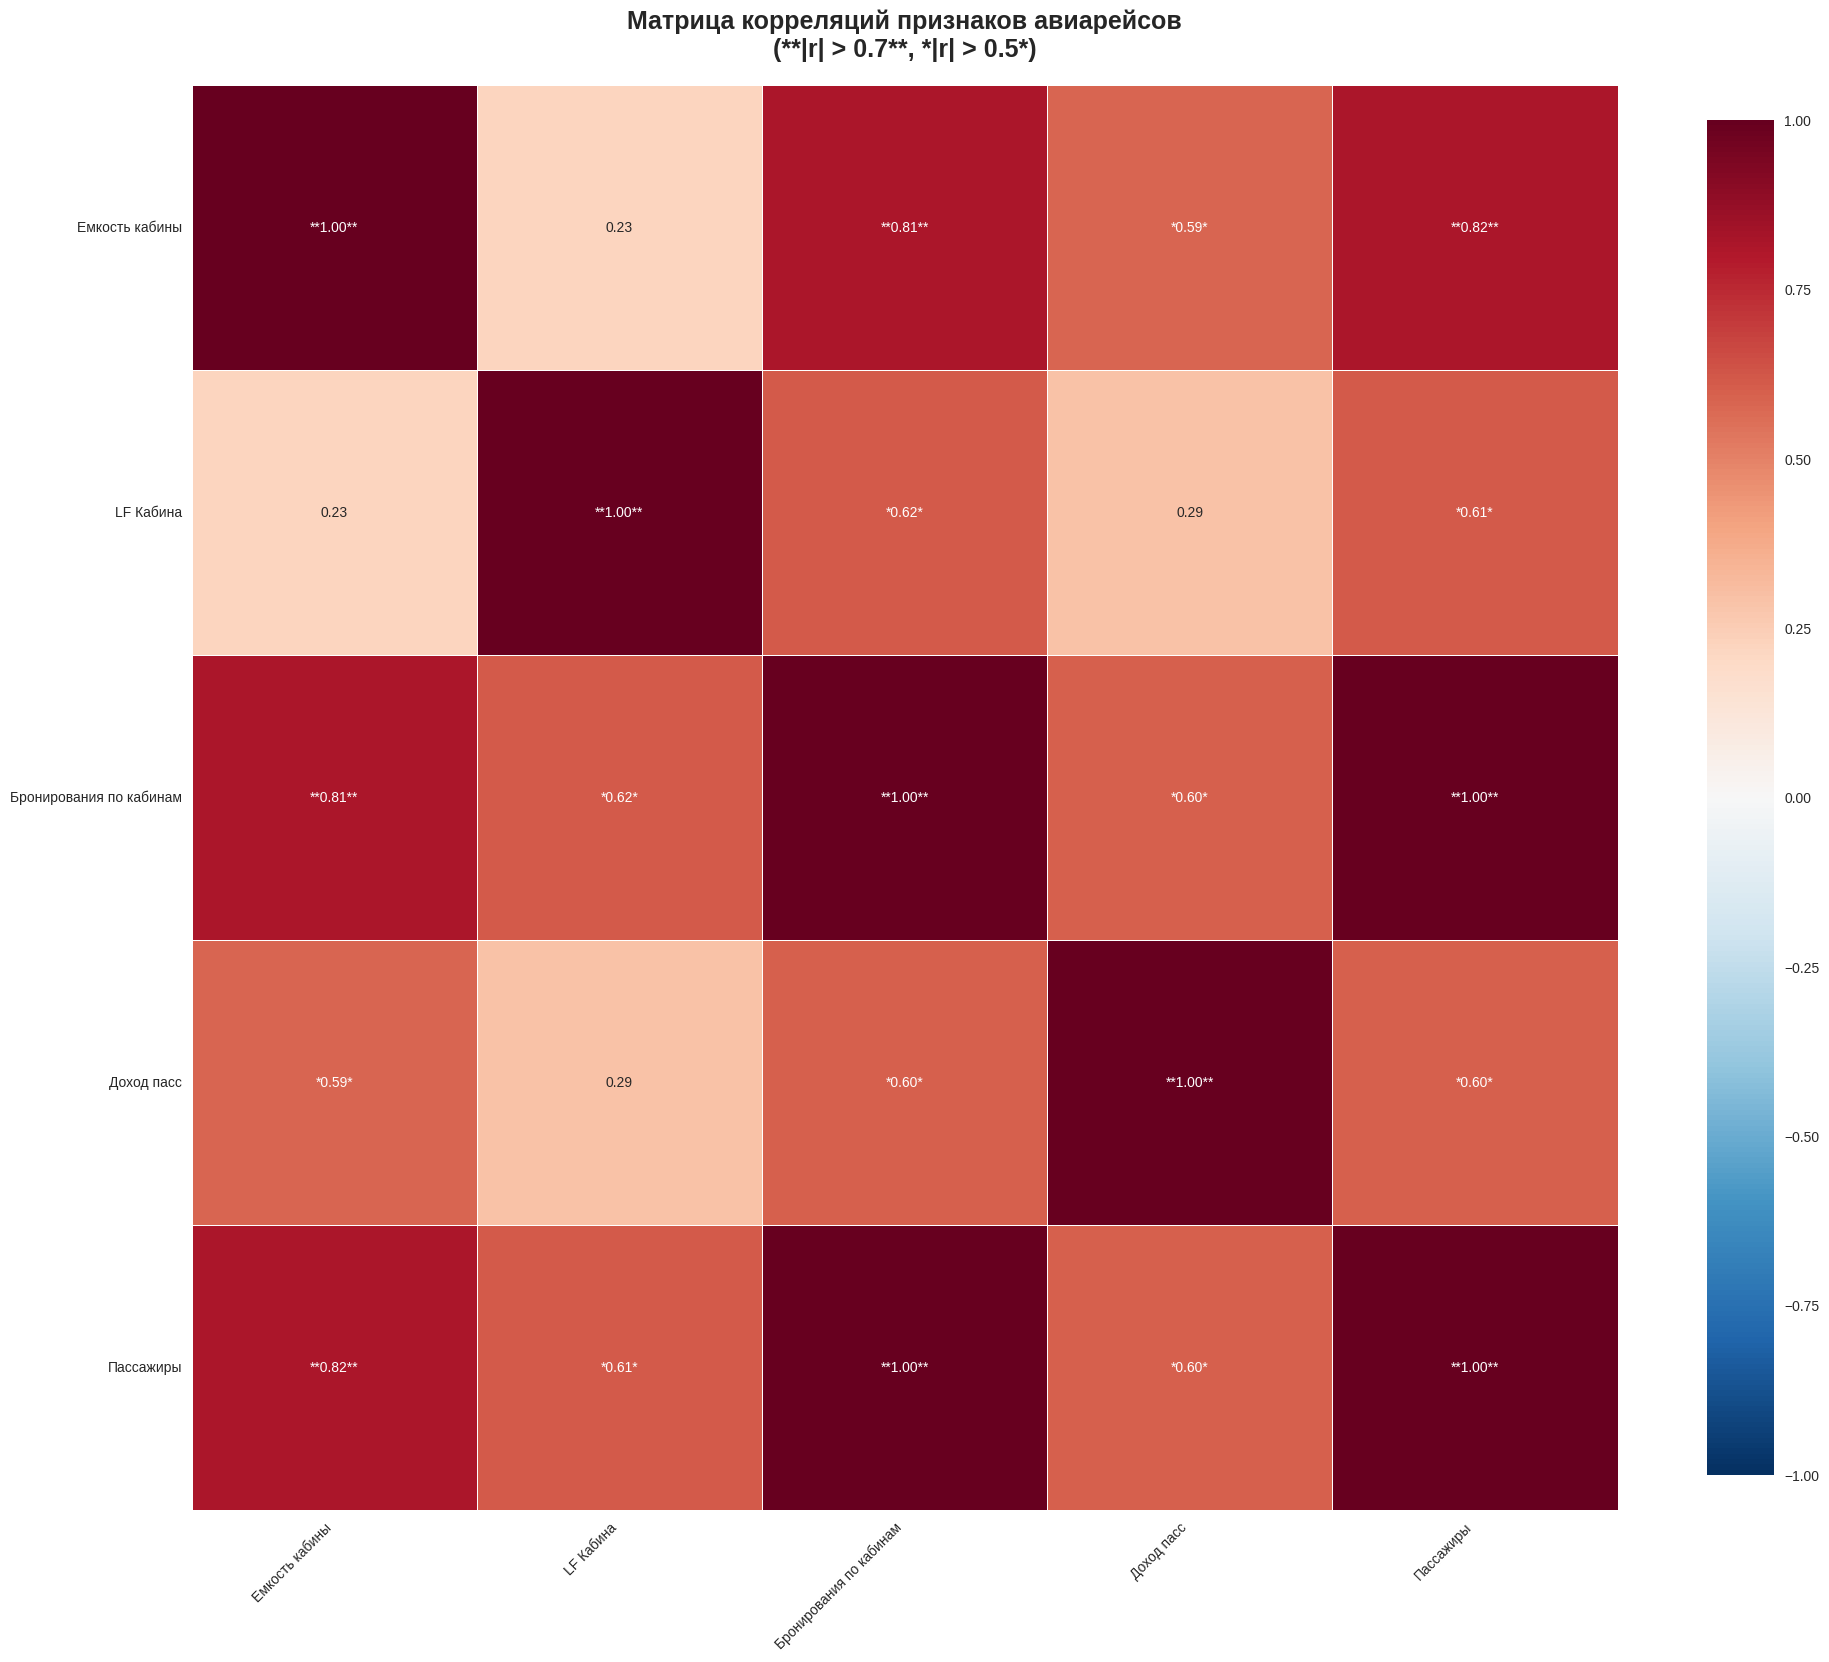

In [ ]:
# Альтернативная версия для лучшей читаемости при многих признаках
plt.figure(figsize=(20, 18))

# Увеличиваем шрифт для лучшей читаемости
plt.rcParams['font.size'] = 12

# Создаем heatmap с аннотациями только для значимых корреляций
def highlight_significant(val):
    """Подсвечиваем значимые корреляции"""
    if abs(val) > 0.7:
        return f"**{val:.2f}**"
    elif abs(val) > 0.5:
        return f"*{val:.2f}*"
    else:
        return f"{val:.2f}"

# Применяем форматирование
correlation_matrix_formatted = correlation_matrix.applymap(highlight_significant)

heatmap = sns.heatmap(correlation_matrix,
                      annot=correlation_matrix_formatted.values,
                      fmt='',
                      cmap='RdBu_r',
                      center=0,
                      vmin=-1,
                      vmax=1,
                      square=True,
                      linewidths=0.5,
                      cbar_kws={'shrink': 0.8},
                      annot_kws={'size': 10})

plt.title('Матрица корреляций признаков авиарейсов\n(**|r| > 0.7**, *|r| > 0.5*)',
          fontsize=18, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

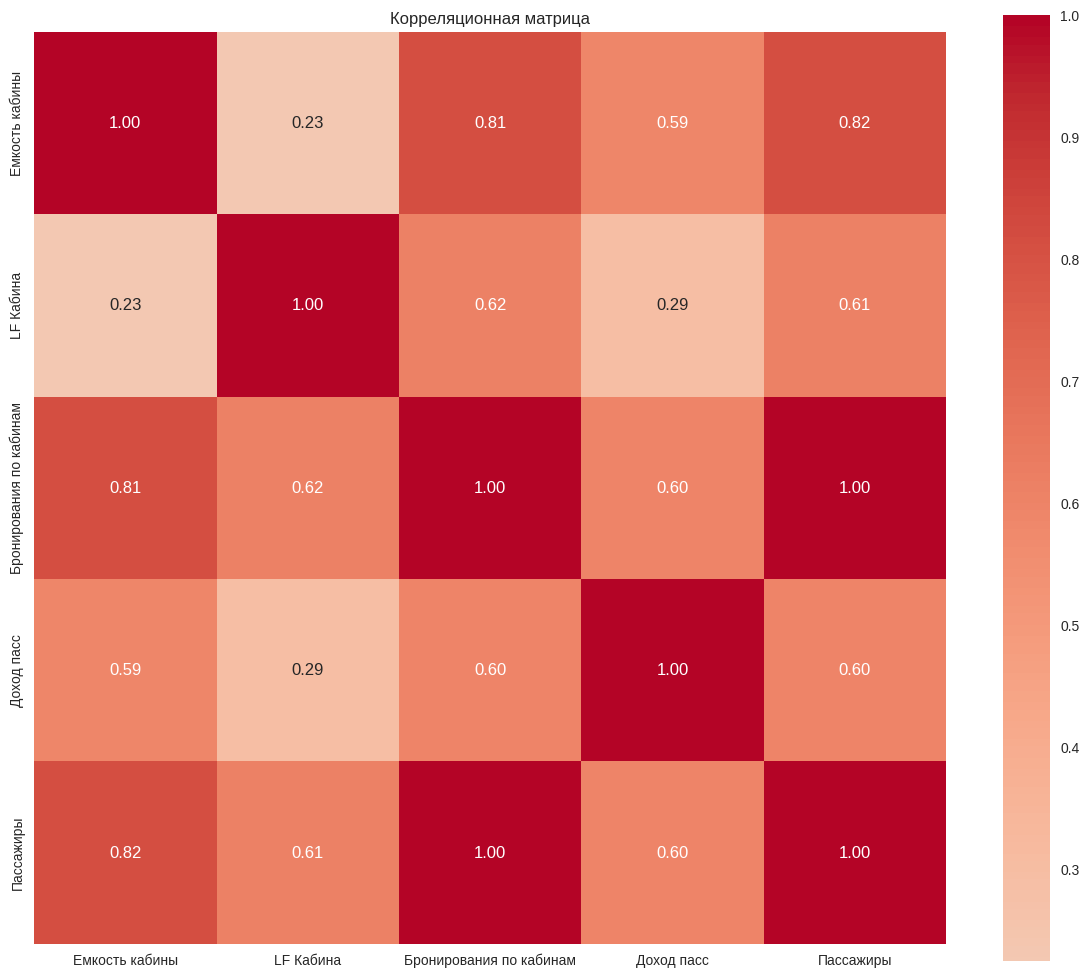

In [ ]:
# Быстрая версия для первоначального анализа
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19269 entries, 0 to 19268
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата вылета              19269 non-null  datetime64[ns]
 1   Номер рейса              19269 non-null  int64         
 2   Аэропорт вылета          19269 non-null  object        
 3   Аэропорт прилета         19269 non-null  object        
 4   Время вылета             19269 non-null  object        
 5   Время прилета            19269 non-null  object        
 6   Емкость кабины           19269 non-null  int64         
 7   LF Кабина                19269 non-null  float64       
 8   Бронирования по кабинам  19269 non-null  int64         
 9   Тип ВС                   19269 non-null  object        
 10  Код кабины               19269 non-null  object        
 11  Доход пасс               19269 non-null  float64       
 12  Пассажиры     

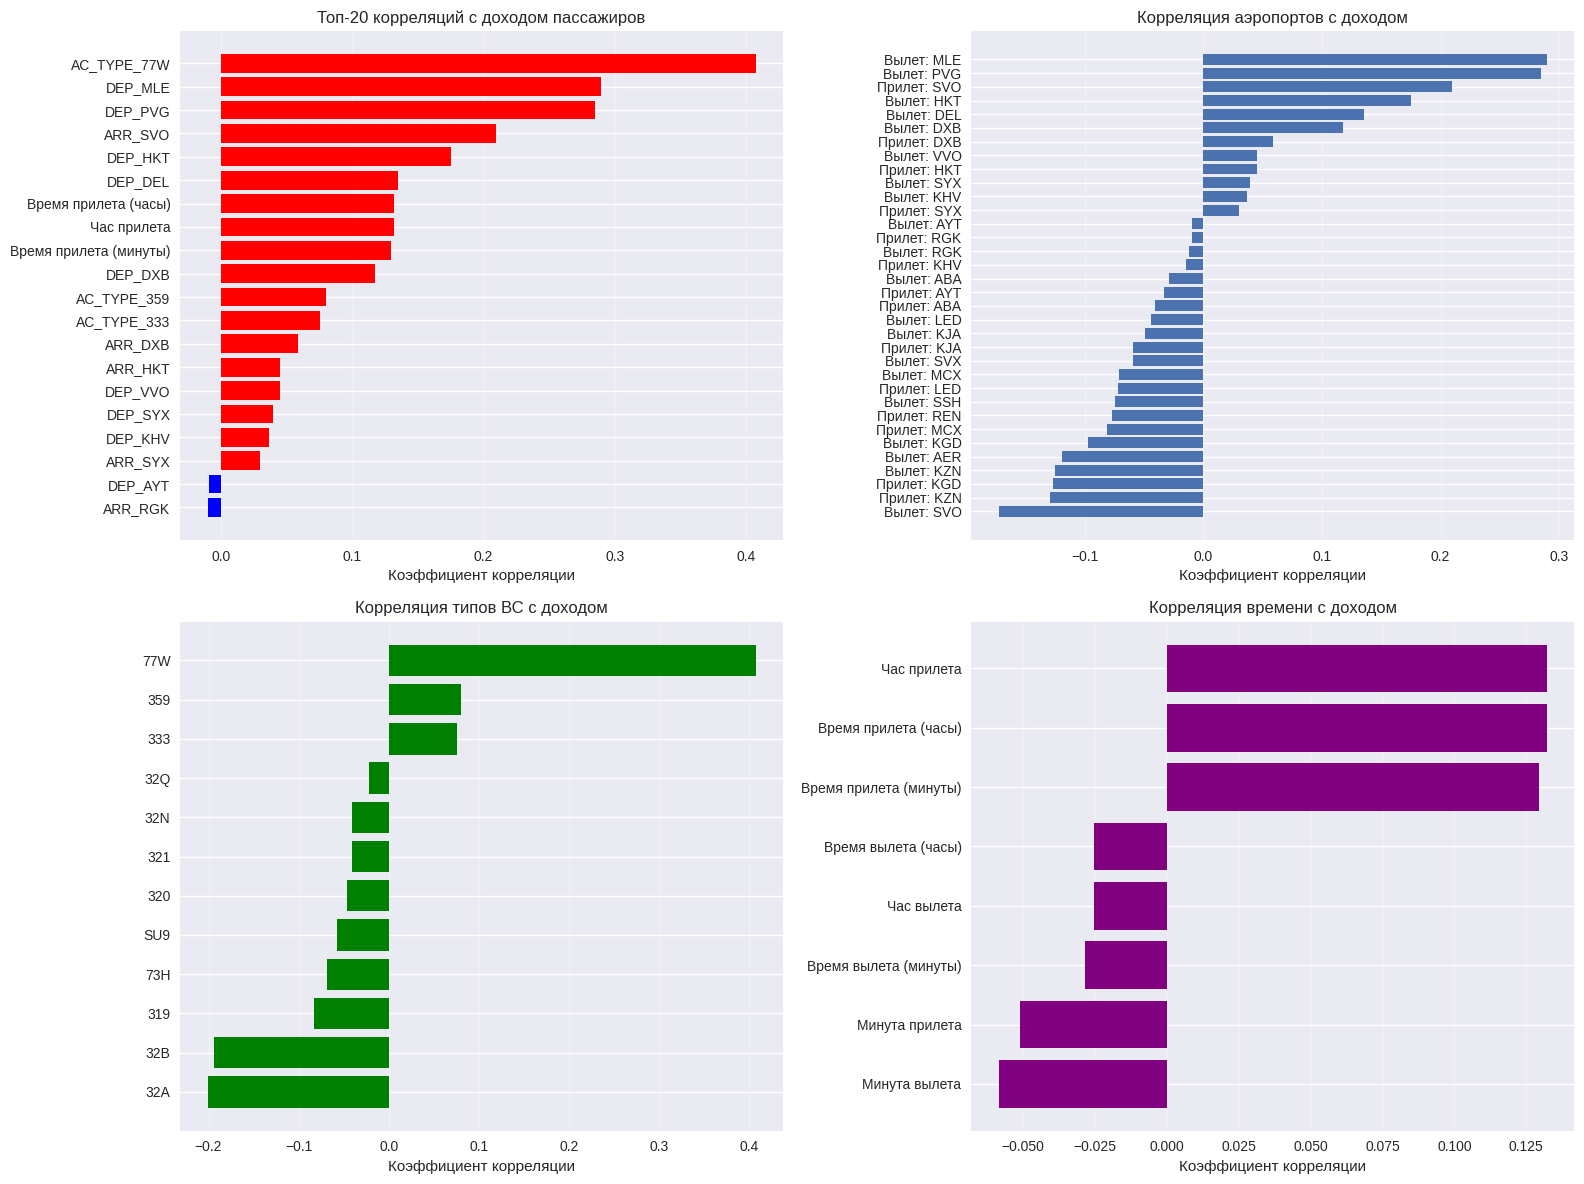

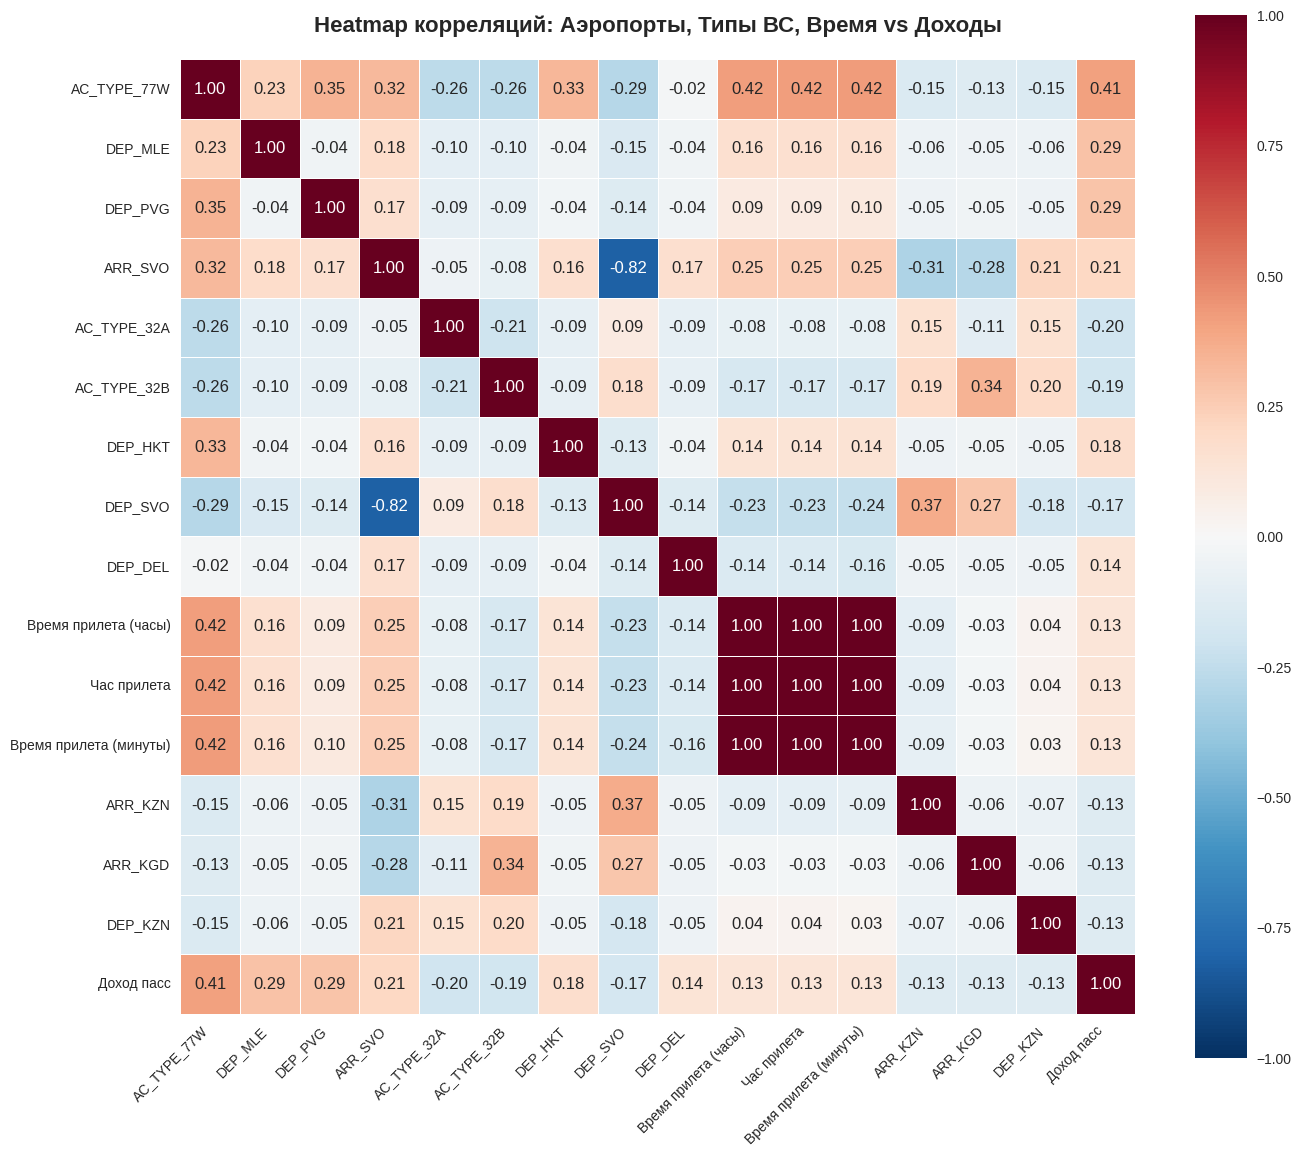

СТАТИСТИЧЕСКИЙ АНАЛИЗ КОРРЕЛЯЦИЙ С ДОХОДАМИ

АЭРОПОРТЫ С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:
Топ-5 положительных корреляций:
DEP_MLE    0.289325
DEP_PVG    0.285020
ARR_SVO    0.209898
DEP_HKT    0.175426
DEP_DEL    0.135045
Name: Доход пасс, dtype: float64

Топ-5 отрицательных корреляций:
DEP_SVO   -0.172534
ARR_KZN   -0.129217
ARR_KGD   -0.126617
DEP_KZN   -0.125225
DEP_AER   -0.119528
Name: Доход пасс, dtype: float64

ТИПЫ ВС С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:
Топ-5 положительных корреляций:
AC_TYPE_77W    0.407154
AC_TYPE_359    0.080100
AC_TYPE_333    0.075775
AC_TYPE_32Q   -0.022118
AC_TYPE_32N   -0.041118
Name: Доход пасс, dtype: float64

Топ-5 отрицательных корреляций:
AC_TYPE_32A   -0.201003
AC_TYPE_32B   -0.194445
AC_TYPE_319   -0.082769
AC_TYPE_73H   -0.068548
AC_TYPE_SU9   -0.057719
Name: Доход пасс, dtype: float64

ВРЕМЯ С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:
Корреляции по убыванию:
Время прилета (часы)      0.132092
Час прилета               0.132092
Время прилета

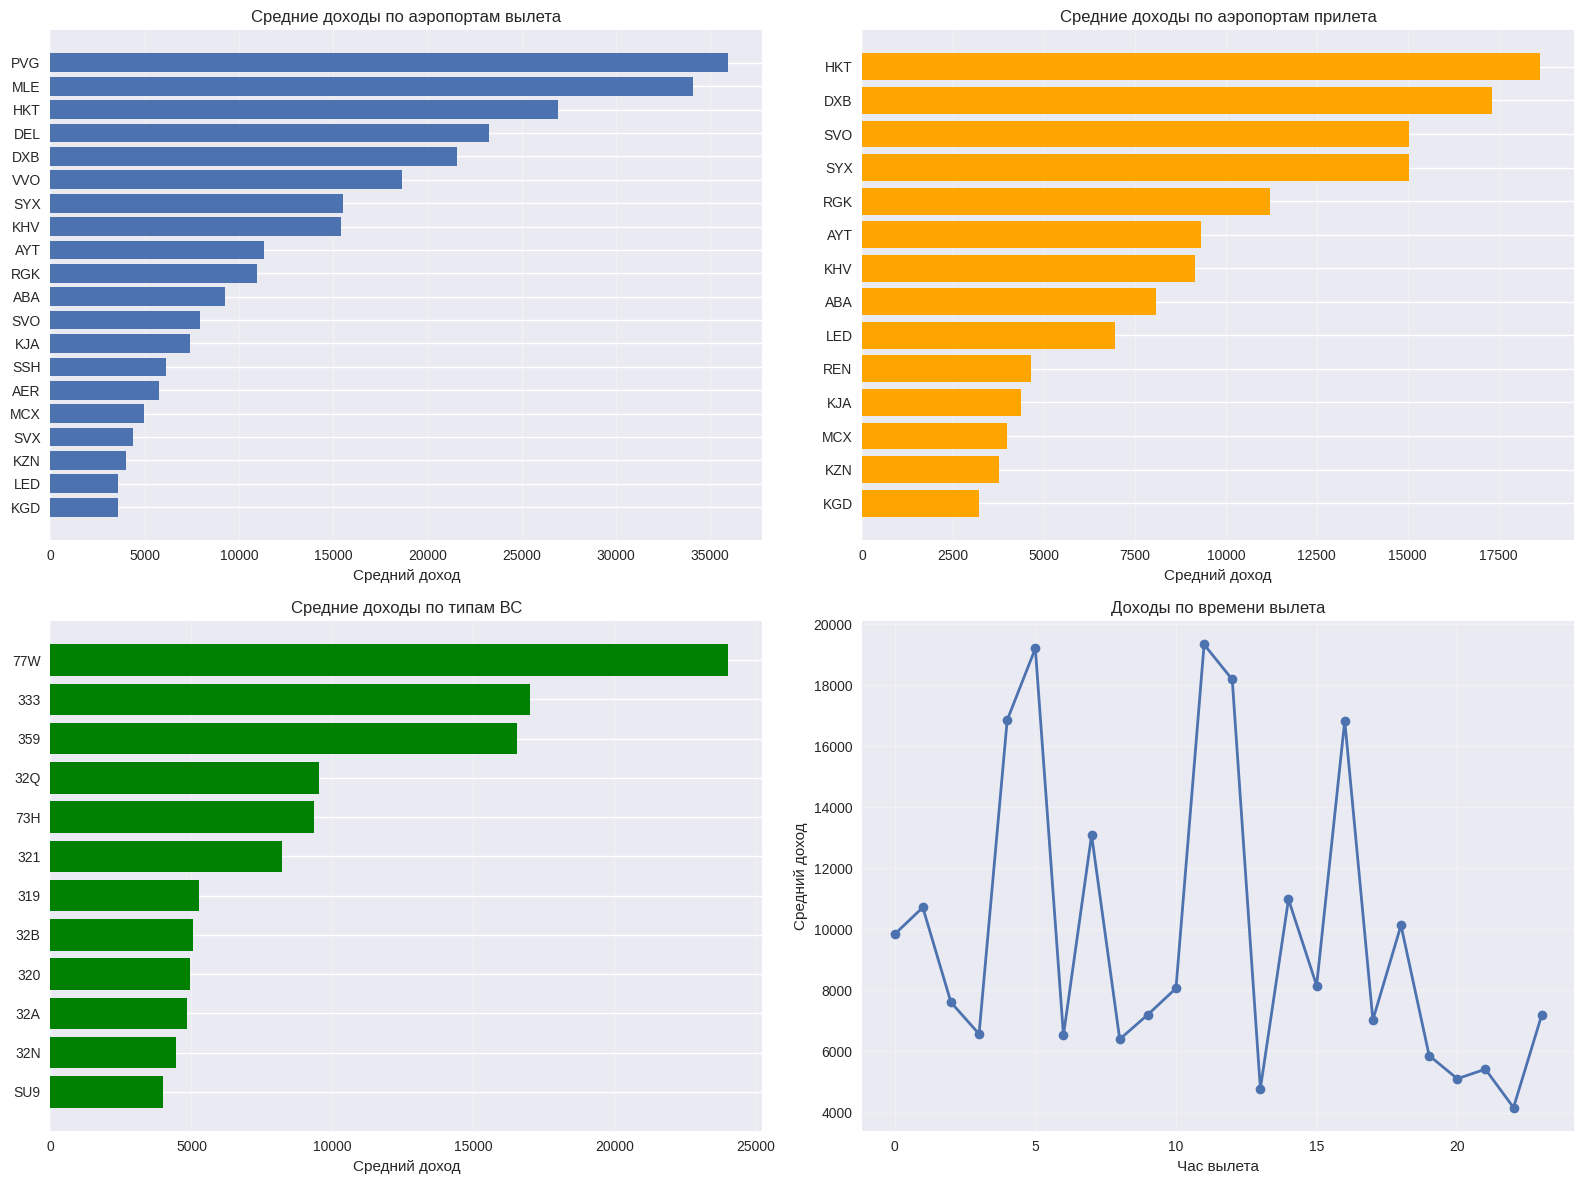


Анализ завершен! Проверьте созданные файлы:
- income_correlations_detailed.png
- income_correlations_heatmap.png
- average_income_analysis.png


In [ ]:
# Загрузка данных
df = temp

# Просмотр структуры данных
print("Структура данных:")
print(df.info())
print("\nУникальные значения категориальных признаков:")
print("Аэропорты вылета:", df['Аэропорт вылета'].unique())
print("Аэропорты прилета:", df['Аэропорт прилета'].unique())
print("Типы ВС:", df['Тип ВС'].unique())

# 1. ПОДГОТОВКА ДАННЫХ ДЛЯ КОРРЕЛЯЦИОННОГО АНАЛИЗА

# Создаем копию DataFrame для анализа
analysis_df = df.copy()

# Преобразуем категориальные переменные в числовые для корреляционного анализа
# Метод: one-hot encoding для категориальных переменных

# Аэропорты вылета
airport_departure_dummies = pd.get_dummies(df['Аэропорт вылета'], prefix='DEP')
# Аэропорты прилета
airport_arrival_dummies = pd.get_dummies(df['Аэропорт прилета'], prefix='ARR')
# Типы ВС
aircraft_type_dummies = pd.get_dummies(df['Тип ВС'], prefix='AC_TYPE')

# Объединяем с исходными данными
analysis_df = pd.concat([analysis_df, airport_departure_dummies, airport_arrival_dummies, aircraft_type_dummies], axis=1)

# Время вылета/прилета уже в числовом формате (часы, минуты)
# Используем существующие числовые колонки времени

# 2. ВИЗУАЛИЗАЦИЯ КОРРЕЛЯЦИЙ

# Создаем список признаков для анализа корреляции с доходами
correlation_features = []

# Добавляем аэропорты вылета
correlation_features.extend([col for col in analysis_df.columns if col.startswith('DEP_')])
# Добавляем аэропорты прилета
correlation_features.extend([col for col in analysis_df.columns if col.startswith('ARR_')])
# Добавляем типы ВС
correlation_features.extend([col for col in analysis_df.columns if col.startswith('AC_TYPE_')])
# Добавляем временные параметры
time_features = ['Время вылета (часы)', 'Время вылета (минуты)',
                 'Время прилета (часы)', 'Время прилета (минуты)',
                 'Час вылета', 'Минута вылета', 'Час прилета', 'Минута прилета']
correlation_features.extend(time_features)
# Целевая переменная - доход
correlation_features.append('Доход пасс')

# Создаем матрицу корреляций только для выбранных признаков
correlation_matrix = analysis_df[correlation_features].corr()

# Фильтруем только корреляции с доходом
income_correlations = correlation_matrix['Доход пасс'].sort_values(ascending=False)

# 3. ГРАФИКИ КОРРЕЛЯЦИЙ С ДОХОДАМИ

plt.figure(figsize=(16, 12))

# График 1: Топ-20 самых сильных корреляций с доходами
plt.subplot(2, 2, 1)
top_correlations = income_correlations[income_correlations.index != 'Доход пасс'].head(20)
colors = ['red' if x > 0 else 'blue' for x in top_correlations.values]
plt.barh(range(len(top_correlations)), top_correlations.values, color=colors)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Коэффициент корреляции')
plt.title('Топ-20 корреляций с доходом пассажиров')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# График 2: Корреляции аэропортов с доходами
plt.subplot(2, 2, 2)
airport_correlations = income_correlations[[col for col in income_correlations.index
                                          if col.startswith('DEP_') or col.startswith('ARR_')]].sort_values()
plt.barh(range(len(airport_correlations)), airport_correlations.values)
plt.yticks(range(len(airport_correlations)), [col.replace('DEP_', 'Вылет: ')
                                            .replace('ARR_', 'Прилет: ') for col in airport_correlations.index])
plt.xlabel('Коэффициент корреляции')
plt.title('Корреляция аэропортов с доходом')
plt.grid(axis='x', alpha=0.3)

# График 3: Корреляции типов ВС с доходами
plt.subplot(2, 2, 3)
aircraft_correlations = income_correlations[[col for col in income_correlations.index
                                           if col.startswith('AC_TYPE_')]].sort_values()
plt.barh(range(len(aircraft_correlations)), aircraft_correlations.values, color='green')
plt.yticks(range(len(aircraft_correlations)), [col.replace('AC_TYPE_', '') for col in aircraft_correlations.index])
plt.xlabel('Коэффициент корреляции')
plt.title('Корреляция типов ВС с доходом')
plt.grid(axis='x', alpha=0.3)

# График 4: Корреляции времени с доходами
plt.subplot(2, 2, 4)
time_correlations = income_correlations[[col for col in income_correlations.index
                                       if col in time_features]].sort_values()
plt.barh(range(len(time_correlations)), time_correlations.values, color='purple')
plt.yticks(range(len(time_correlations)), time_correlations.index)
plt.xlabel('Коэффициент корреляции')
plt.title('Корреляция времени с доходом')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('income_correlations_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. HEATMAP ДЛЯ ВЫБРАННЫХ ПРИЗНАКОВ

# Создаем уменьшенную матрицу для heatmap (топ-30 признаков по корреляции с доходом)
top_features = income_correlations.abs().sort_values(ascending=False).head(31).index.tolist()
top_features = [f for f in top_features if f != 'Доход пасс'][:15]  # Берем топ-15 + доход
top_features.append('Доход пасс')

heatmap_corr_matrix = analysis_df[top_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=0.5)
plt.title('Heatmap корреляций: Аэропорты, Типы ВС, Время vs Доходы',
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('income_correlations_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. СТАТИСТИЧЕСКИЙ АНАЛИЗ

print("=" * 80)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ КОРРЕЛЯЦИЙ С ДОХОДАМИ")
print("=" * 80)

# Аэропорты с самой сильной корреляцией
print("\nАЭРОПОРТЫ С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:")
airport_corr = income_correlations[[col for col in income_correlations.index
                                  if col.startswith('DEP_') or col.startswith('ARR_')]]
print("Топ-5 положительных корреляций:")
print(airport_corr.nlargest(5))
print("\nТоп-5 отрицательных корреляций:")
print(airport_corr.nsmallest(5))

# Типы ВС с самой сильной корреляцией
print("\nТИПЫ ВС С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:")
aircraft_corr = income_correlations[[col for col in income_correlations.index
                                   if col.startswith('AC_TYPE_')]]
print("Топ-5 положительных корреляций:")
print(aircraft_corr.nlargest(5))
print("\nТоп-5 отрицательных корреляций:")
print(aircraft_corr.nsmallest(5))

# Время с самой сильной корреляцией
print("\nВРЕМЯ С САМОЙ СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С ДОХОДАМИ:")
time_corr = income_correlations[[col for col in income_correlations.index
                               if col in time_features]]
print("Корреляции по убыванию:")
print(time_corr.sort_values(ascending=False))

# 6. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ: СРЕДНИЕ ДОХОДЫ ПО КАТЕГОРИЯМ

print("\n" + "=" * 80)
print("СРЕДНИЕ ДОХОДЫ ПО КАТЕГОРИЯМ")
print("=" * 80)

# Средние доходы по аэропортам вылета
print("\nСРЕДНИЕ ДОХОДЫ ПО АЭРОПОРТАМ ВЫЛЕТА:")
departure_income = df.groupby('Аэропорт вылета')['Доход пасс'].mean().sort_values(ascending=False)
print(departure_income)

print("\nСРЕДНИЕ ДОХОДЫ ПО АЭРОПОРТАМ ПРИЛЕТА:")
arrival_income = df.groupby('Аэропорт прилета')['Доход пасс'].mean().sort_values(ascending=False)
print(arrival_income)

print("\nСРЕДНИЕ ДОХОДЫ ПО ТИПАМ ВС:")
aircraft_income = df.groupby('Тип ВС')['Доход пасс'].mean().sort_values(ascending=False)
print(aircraft_income)

# 7. ВИЗУАЛИЗАЦИЯ СРЕДНИХ ДОХОДОВ ПО КАТЕГОРИЯМ

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Аэропорты вылета
axes[0, 0].barh(range(len(departure_income)), departure_income.values)
axes[0, 0].set_yticks(range(len(departure_income)))
axes[0, 0].set_yticklabels(departure_income.index)
axes[0, 0].set_xlabel('Средний доход')
axes[0, 0].set_title('Средние доходы по аэропортам вылета')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# Аэропорты прилета
axes[0, 1].barh(range(len(arrival_income)), arrival_income.values, color='orange')
axes[0, 1].set_yticks(range(len(arrival_income)))
axes[0, 1].set_yticklabels(arrival_income.index)
axes[0, 1].set_xlabel('Средний доход')
axes[0, 1].set_title('Средние доходы по аэропортам прилета')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# Типы ВС
axes[1, 0].barh(range(len(aircraft_income)), aircraft_income.values, color='green')
axes[1, 0].set_yticks(range(len(aircraft_income)))
axes[1, 0].set_yticklabels(aircraft_income.index)
axes[1, 0].set_xlabel('Средний доход')
axes[1, 0].set_title('Средние доходы по типам ВС')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Время суток и доходы (средний доход по часам вылета)
hour_income = df.groupby('Час вылета')['Доход пасс'].mean()
axes[1, 1].plot(hour_income.index, hour_income.values, marker='o', linewidth=2)
axes[1, 1].set_xlabel('Час вылета')
axes[1, 1].set_ylabel('Средний доход')
axes[1, 1].set_title('Доходы по времени вылета')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('average_income_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nАнализ завершен! Проверьте созданные файлы:")
print("- income_correlations_detailed.png")
print("- income_correlations_heatmap.png")
print("- average_income_analysis.png")